# Cause Of Death Case Study Project :- Flip Robo Technologies
Internship Batch No-34

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"cause_of_deaths dataset.csv")

In [3]:
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [4]:
#Information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [5]:
#Statistical Information of Dataframe
df.describe()

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,...,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000
mean,2004.500000,1719.701307,4864.189379,1173.169118,2253.600000,4140.960131,1683.333170,2083.797222,1262.589216,5941.898529,...,5138.704575,4724.132680,425.013399,1965.994281,5930.795588,1.709237e+04,6124.072059,10725.267157,588.711438,618.429902
std,8.656149,6672.006930,18220.659072,4616.156238,10483.633601,18427.753137,8877.018366,6917.006075,6057.973183,21011.962487,...,16773.081040,16470.429969,2022.640521,8255.999063,24097.784291,1.051572e+05,20688.118580,37228.051096,2128.595120,4186.023497
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,15.000000,90.000000,27.000000,9.000000,0.000000,34.000000,40.000000,5.000000,11.000000,...,236.000000,145.750000,6.000000,5.000000,174.750000,2.890000e+02,154.000000,284.000000,17.000000,2.000000
50%,2004.500000,109.000000,666.500000,164.000000,119.000000,0.000000,177.000000,265.000000,54.000000,136.000000,...,1087.000000,822.000000,52.500000,92.000000,966.500000,1.689000e+03,1210.000000,2185.000000,126.000000,15.000000
75%,2012.000000,847.250000,2456.250000,609.250000,1167.250000,393.000000,698.000000,877.000000,734.000000,1879.000000,...,2954.000000,2922.500000,254.000000,1042.500000,3435.250000,5.249750e+03,3547.250000,6080.000000,450.000000,160.000000
max,2019.000000,98358.000000,320715.000000,76990.000000,268223.000000,280604.000000,153773.000000,69640.000000,107929.000000,305491.000000,...,273089.000000,222922.000000,30883.000000,202241.000000,329237.000000,1.366039e+06,270037.000000,464914.000000,25876.000000,64305.000000


In [6]:
# Total no. of records in the Dataframe
len(df)

6120

In [7]:
#Shape of the Dataframe
df.shape

(6120, 34)

In [8]:
# Checking for null values in the Dataframe
df.isna().sum()

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal Diseases                      

No null entries for any column in the Dataframe

In [9]:
# The no. of year data in the dataframe
df['Year'].nunique()

30

In [10]:
# The unique year data in the Dataframe
df['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

The data starts 1990 to 2019 from country in the Dataframe

In [11]:
# Correlation of various causes of death against year
df.corr()['Year']

Year                                          1.000000
Meningitis                                   -0.043288
Alzheimer's Disease and Other Dementias       0.083710
Parkinson's Disease                           0.068756
Nutritional Deficiencies                     -0.078266
Malaria                                      -0.015964
Drowning                                     -0.040910
Interpersonal Violence                       -0.001122
Maternal Disorders                           -0.027460
HIV/AIDS                                      0.022964
Drug Use Disorders                            0.023917
Tuberculosis                                 -0.025297
Cardiovascular Diseases                       0.029813
Lower Respiratory Infections                 -0.027531
Neonatal Disorders                           -0.026949
Alcohol Use Disorders                         0.011315
Self-harm                                    -0.004192
Exposure to Forces of Nature                 -0.005178
Diarrheal 

In [12]:
# Columns in the Dataframe
df.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis'],
      dtype='object')

In [13]:
# Total no. of Countries in the Dataframe
df['Country/Territory'].nunique()

204

In [14]:
# Total no. of year data provided for each country in the Dataframe
df['Country/Territory'].value_counts()

Afghanistan         30
Papua New Guinea    30
Niue                30
North Korea         30
North Macedonia     30
                    ..
Greenland           30
Grenada             30
Guam                30
Guatemala           30
Zimbabwe            30
Name: Country/Territory, Length: 204, dtype: int64

30 year data is provided for each country in the Dataframe

## Feature Engineering

In [15]:
cause_of_deaths=['Meningitis','Alzheimer\'s Disease and Other Dementias','Parkinson\'s Disease','Nutritional Deficiencies',
                'Malaria','Drowning','Interpersonal Violence','Maternal Disorders','HIV/AIDS','Drug Use Disorders',
                'Tuberculosis','Cardiovascular Diseases','Lower Respiratory Infections','Neonatal Disorders',
                'Alcohol Use Disorders','Self-harm','Exposure to Forces of Nature','Diarrheal Diseases',
                'Environmental Heat and Cold Exposure','Neoplasms','Conflict and Terrorism','Diabetes Mellitus',
                'Chronic Kidney Disease','Poisonings','Protein-Energy Malnutrition','Road Injuries','Chronic Respiratory Diseases',
                'Cirrhosis and Other Chronic Liver Diseases','Digestive Diseases','Fire, Heat, and Hot Substances','Acute Hepatitis',
                ]

In [16]:
#Creating a new column for 'Total_no_of_Deaths' for individual Country and Year
df['Total_no_of_Deaths']=df[cause_of_deaths].sum(axis=1)

In [17]:
# Top 10 Total_no_of_Deaths
top10_Total_no_of_Deaths=df.sort_values(by='Total_no_of_Deaths',ascending=False)[:10][['Total_no_of_Deaths','Country/Territory']]
top10_Total_no_of_Deaths

,Total_no_of_Deaths,Country/Territory
1139,10442561,China
1138,10163943,China
1137,9978653,China
1119,9814213,China
1118,9591222,China
1117,9503904,China
1116,9411928,China
1114,9366974,China
1115,9364587,China
1113,9284664,China


From the Above table, the "top 10 - Total_no_of_Deaths" belongs to 'China' and the "top60 - Total_no_of_Deaths" belongs to 'China' and 'India' combined, followed by 'USA' and 'RUSSIA'. This because of the fact "China" and "India" are the countries that stand in top 2 interms of population.

## Data Visualization

In [63]:
# china - "Total_no_of_Deaths" against "Year"
China_Total_no_of_Deaths_df=df[df['Country/Territory']=='China'].sort_values(by='Total_no_of_Deaths',ascending=False)

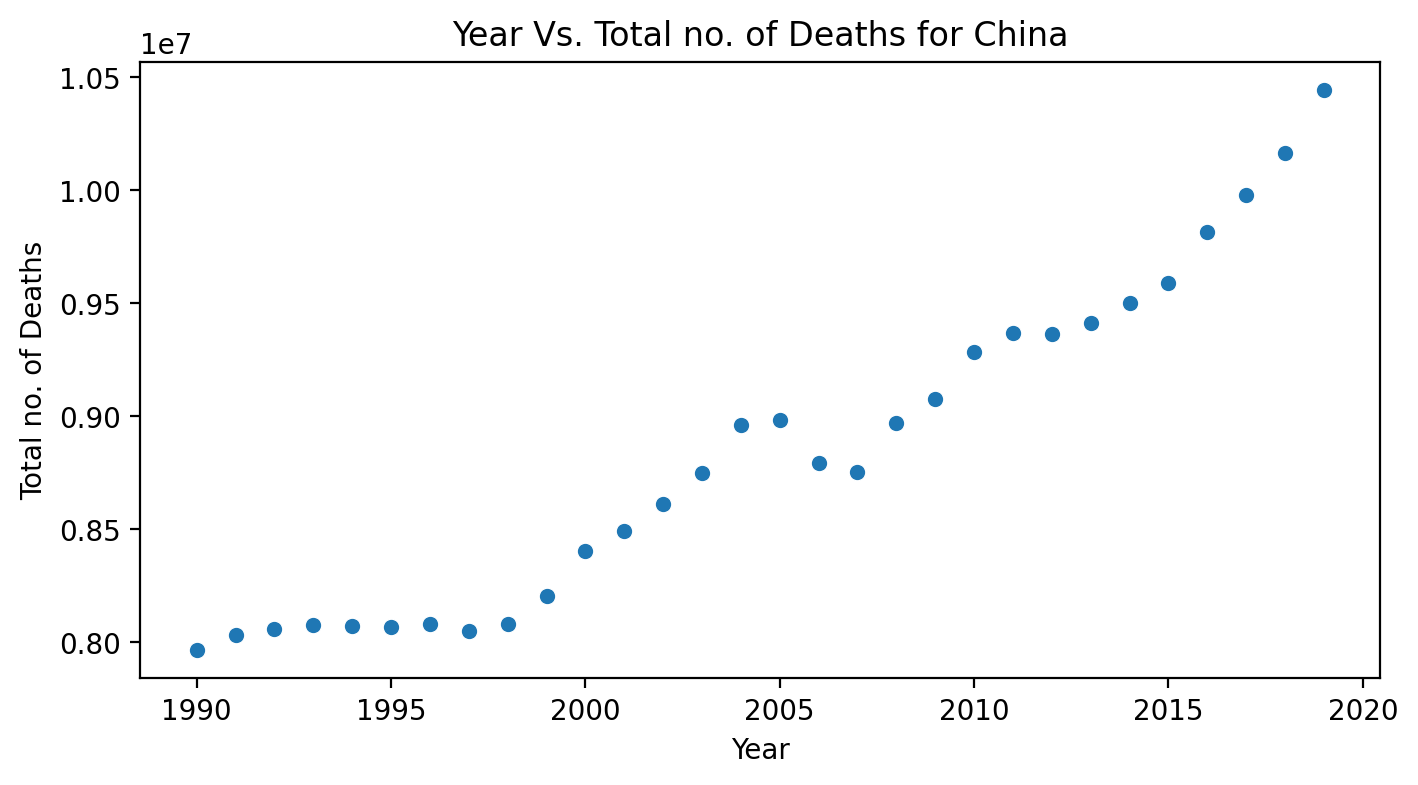

In [64]:
# China - "Total_no_of_Deaths" against "year"
plt.figure(figsize=(8,4),dpi=200)
sns.scatterplot(data=China_Total_no_of_Deaths_df, x='Year', y='Total_no_of_Deaths')
plt.xlabel("Year")
plt.ylabel("Total no. of Deaths")
plt.title("Year Vs. Total no. of Deaths for China")
plt.show()

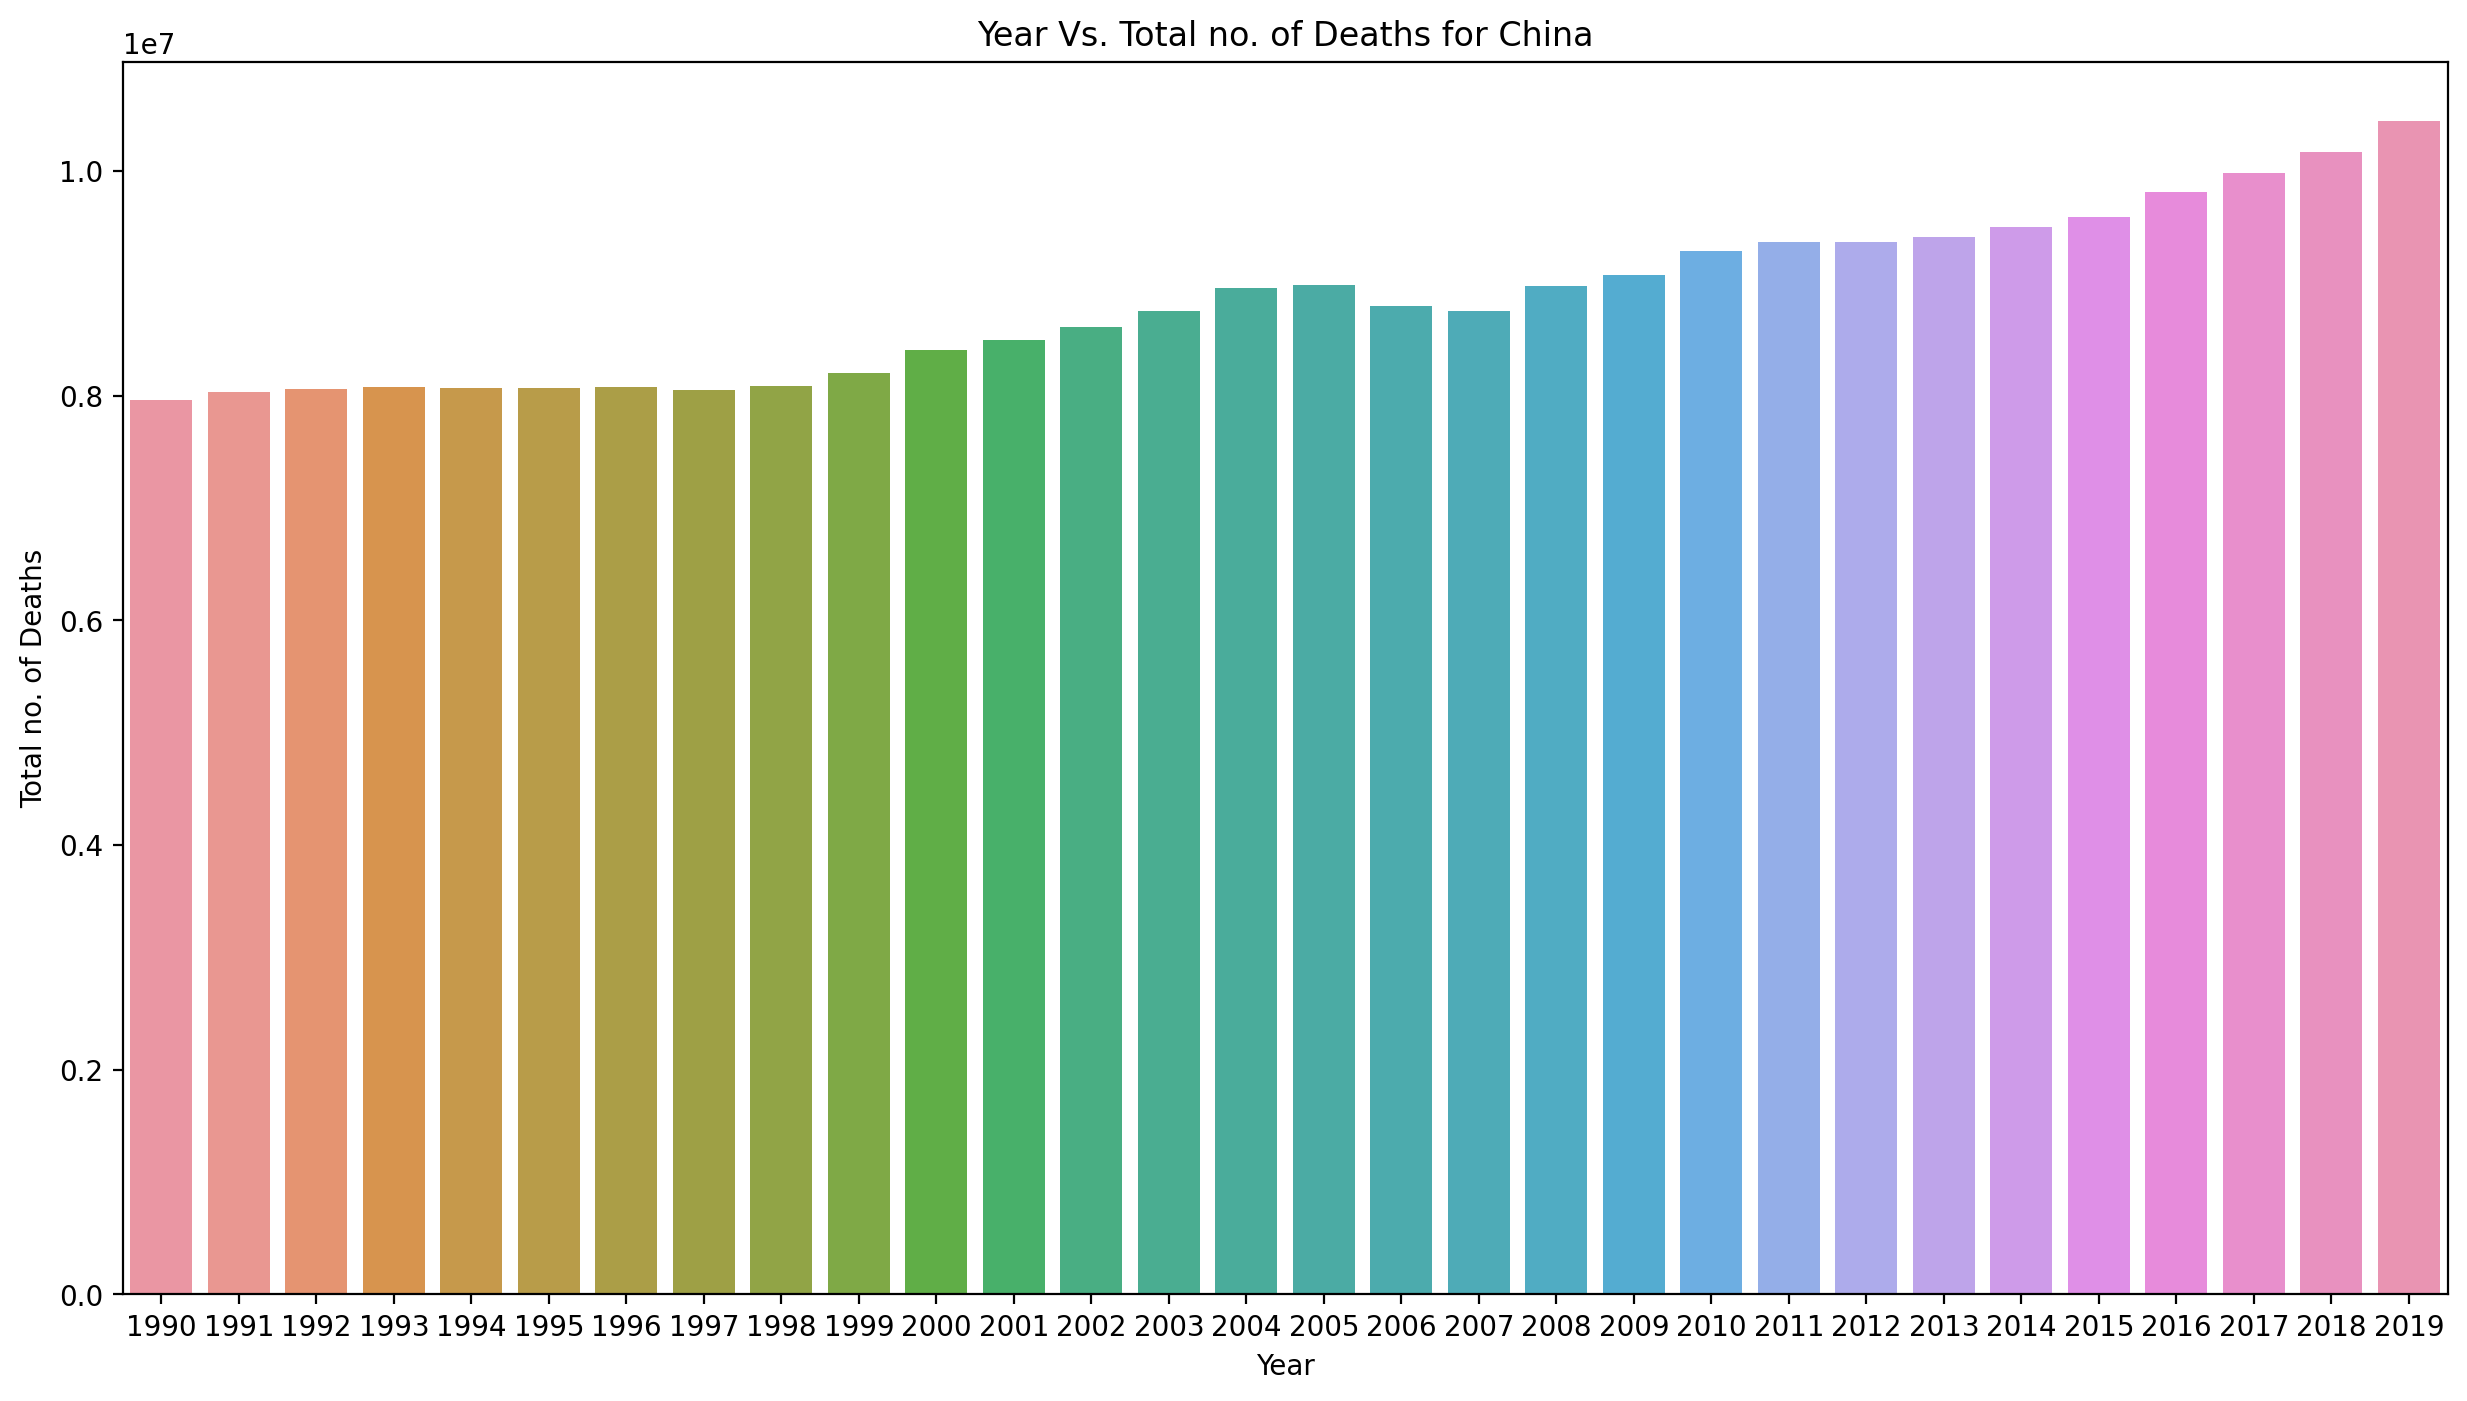

In [20]:
plt.figure(figsize=(15,8), dpi=200)
sns.barplot(data=China_Total_no_of_Deaths_df, x='Year', y='Total_no_of_Deaths')
plt.xlabel("Year")
plt.ylabel("Total no. of Deaths")
plt.title("Year Vs. Total no. of Deaths for China")
plt.show()

There is a clear raise in Total No. of Deaths recorded with each year for China.

## Common Causes of Death

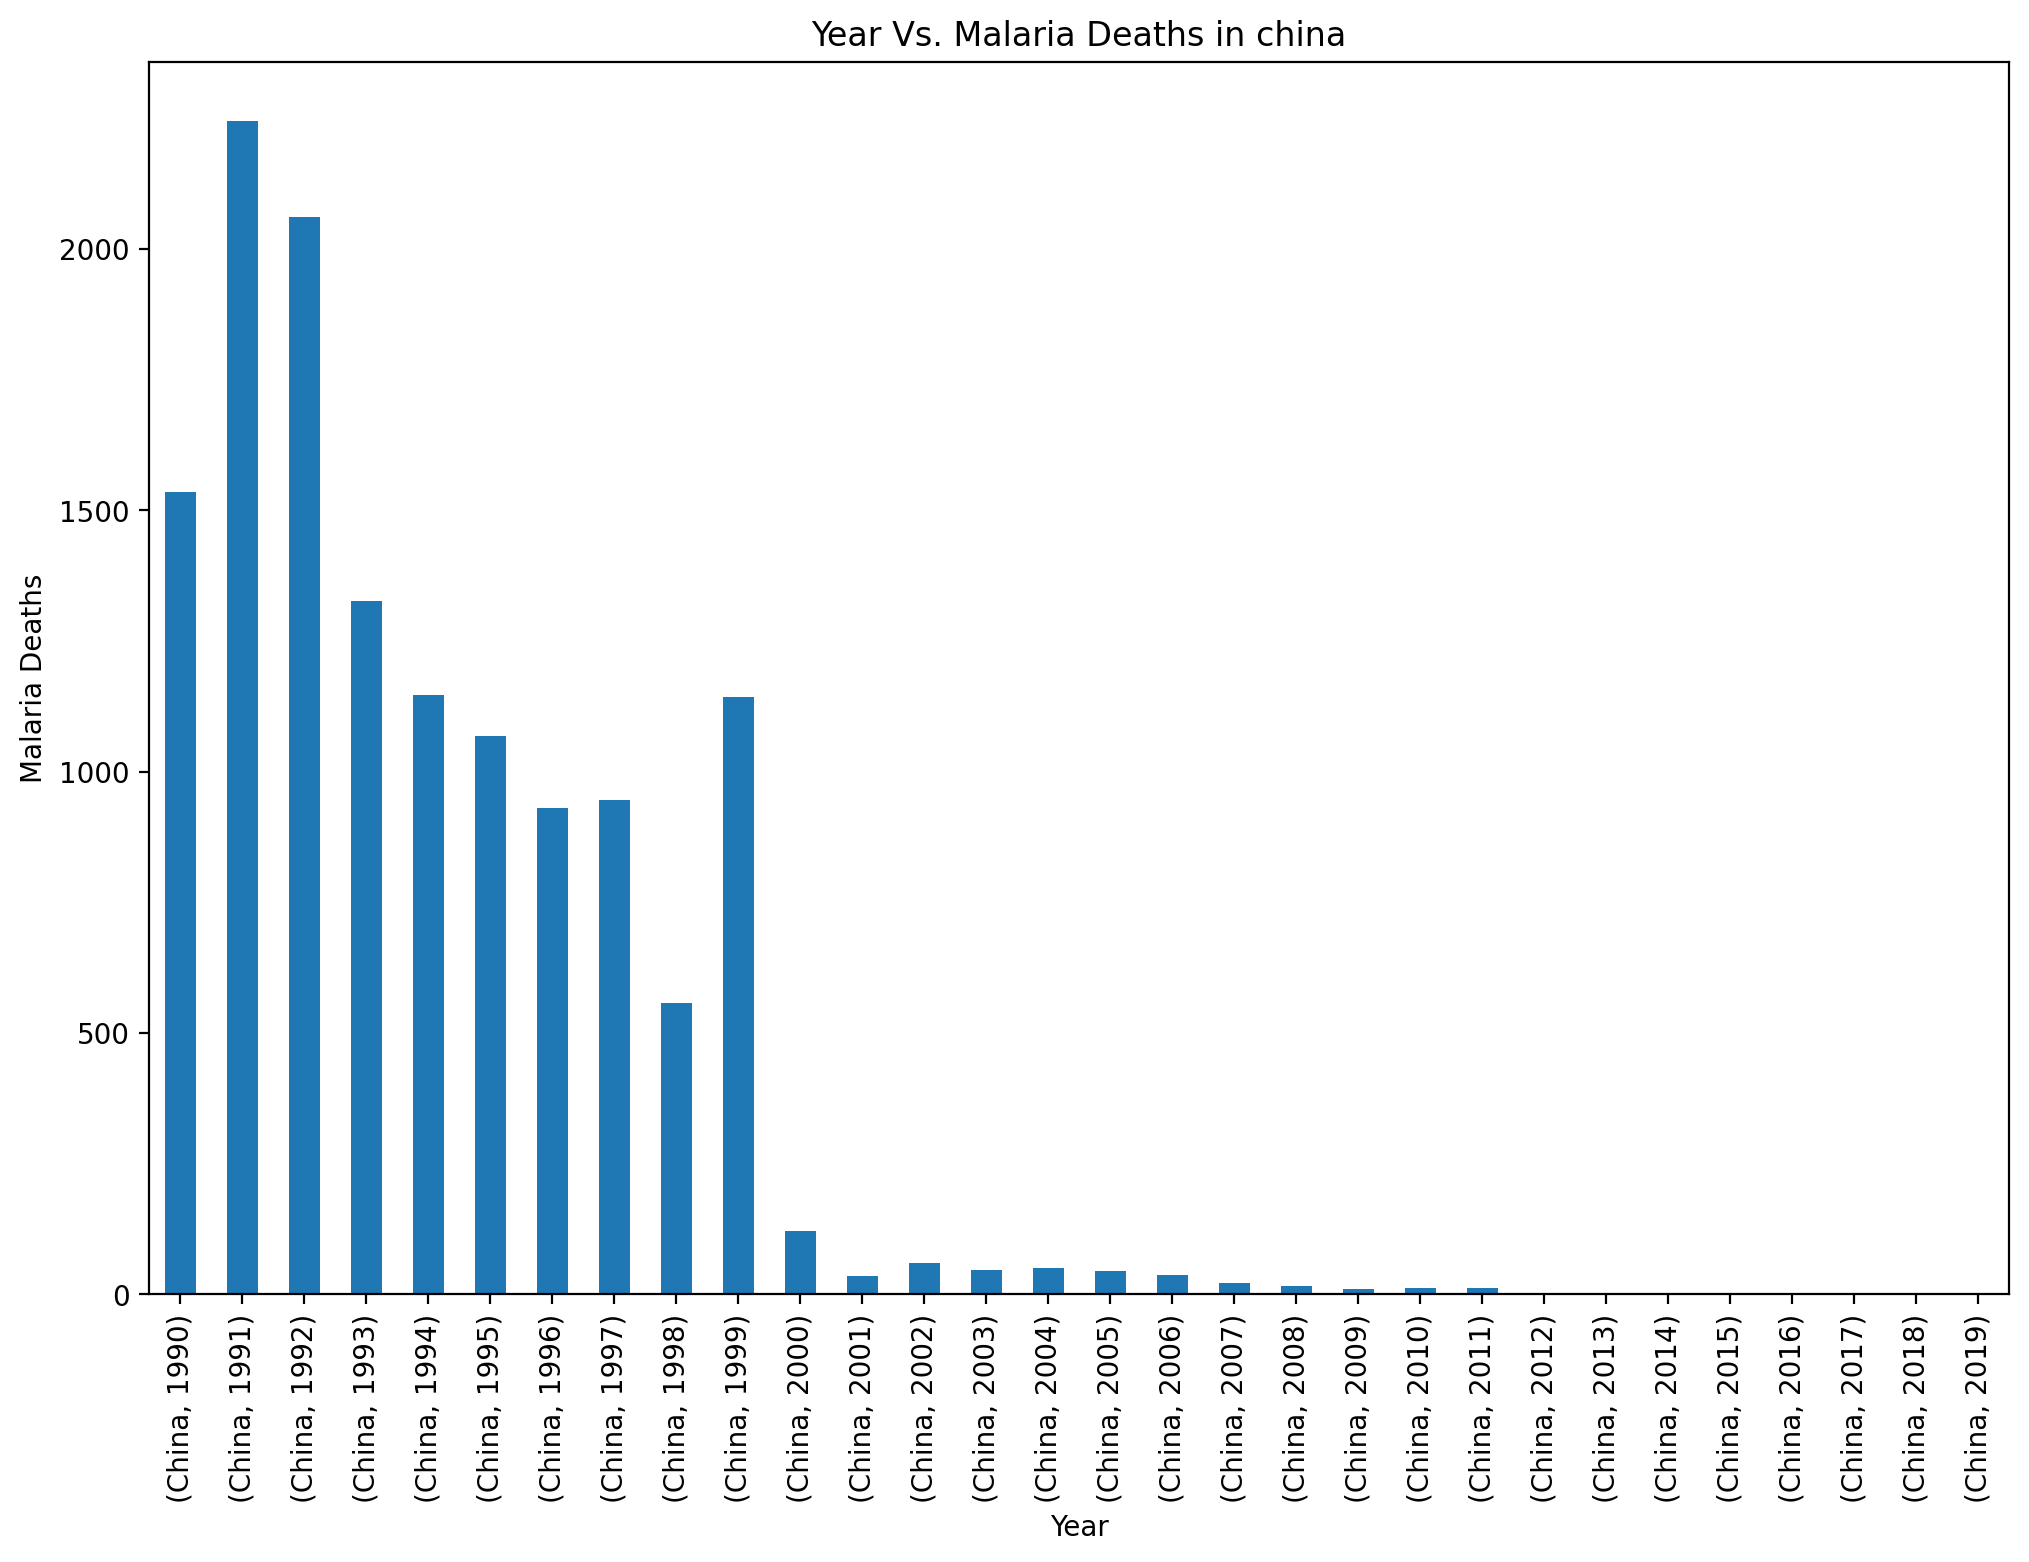

In [21]:
plt.figure(figsize=(12,8), dpi=200)
china_df=China_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Malaria'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Malaria Deaths")
plt.title("Year Vs. Malaria Deaths in china")
plt.show()

There is a rapid drop in Malaria Deaths recorded in China after 1999

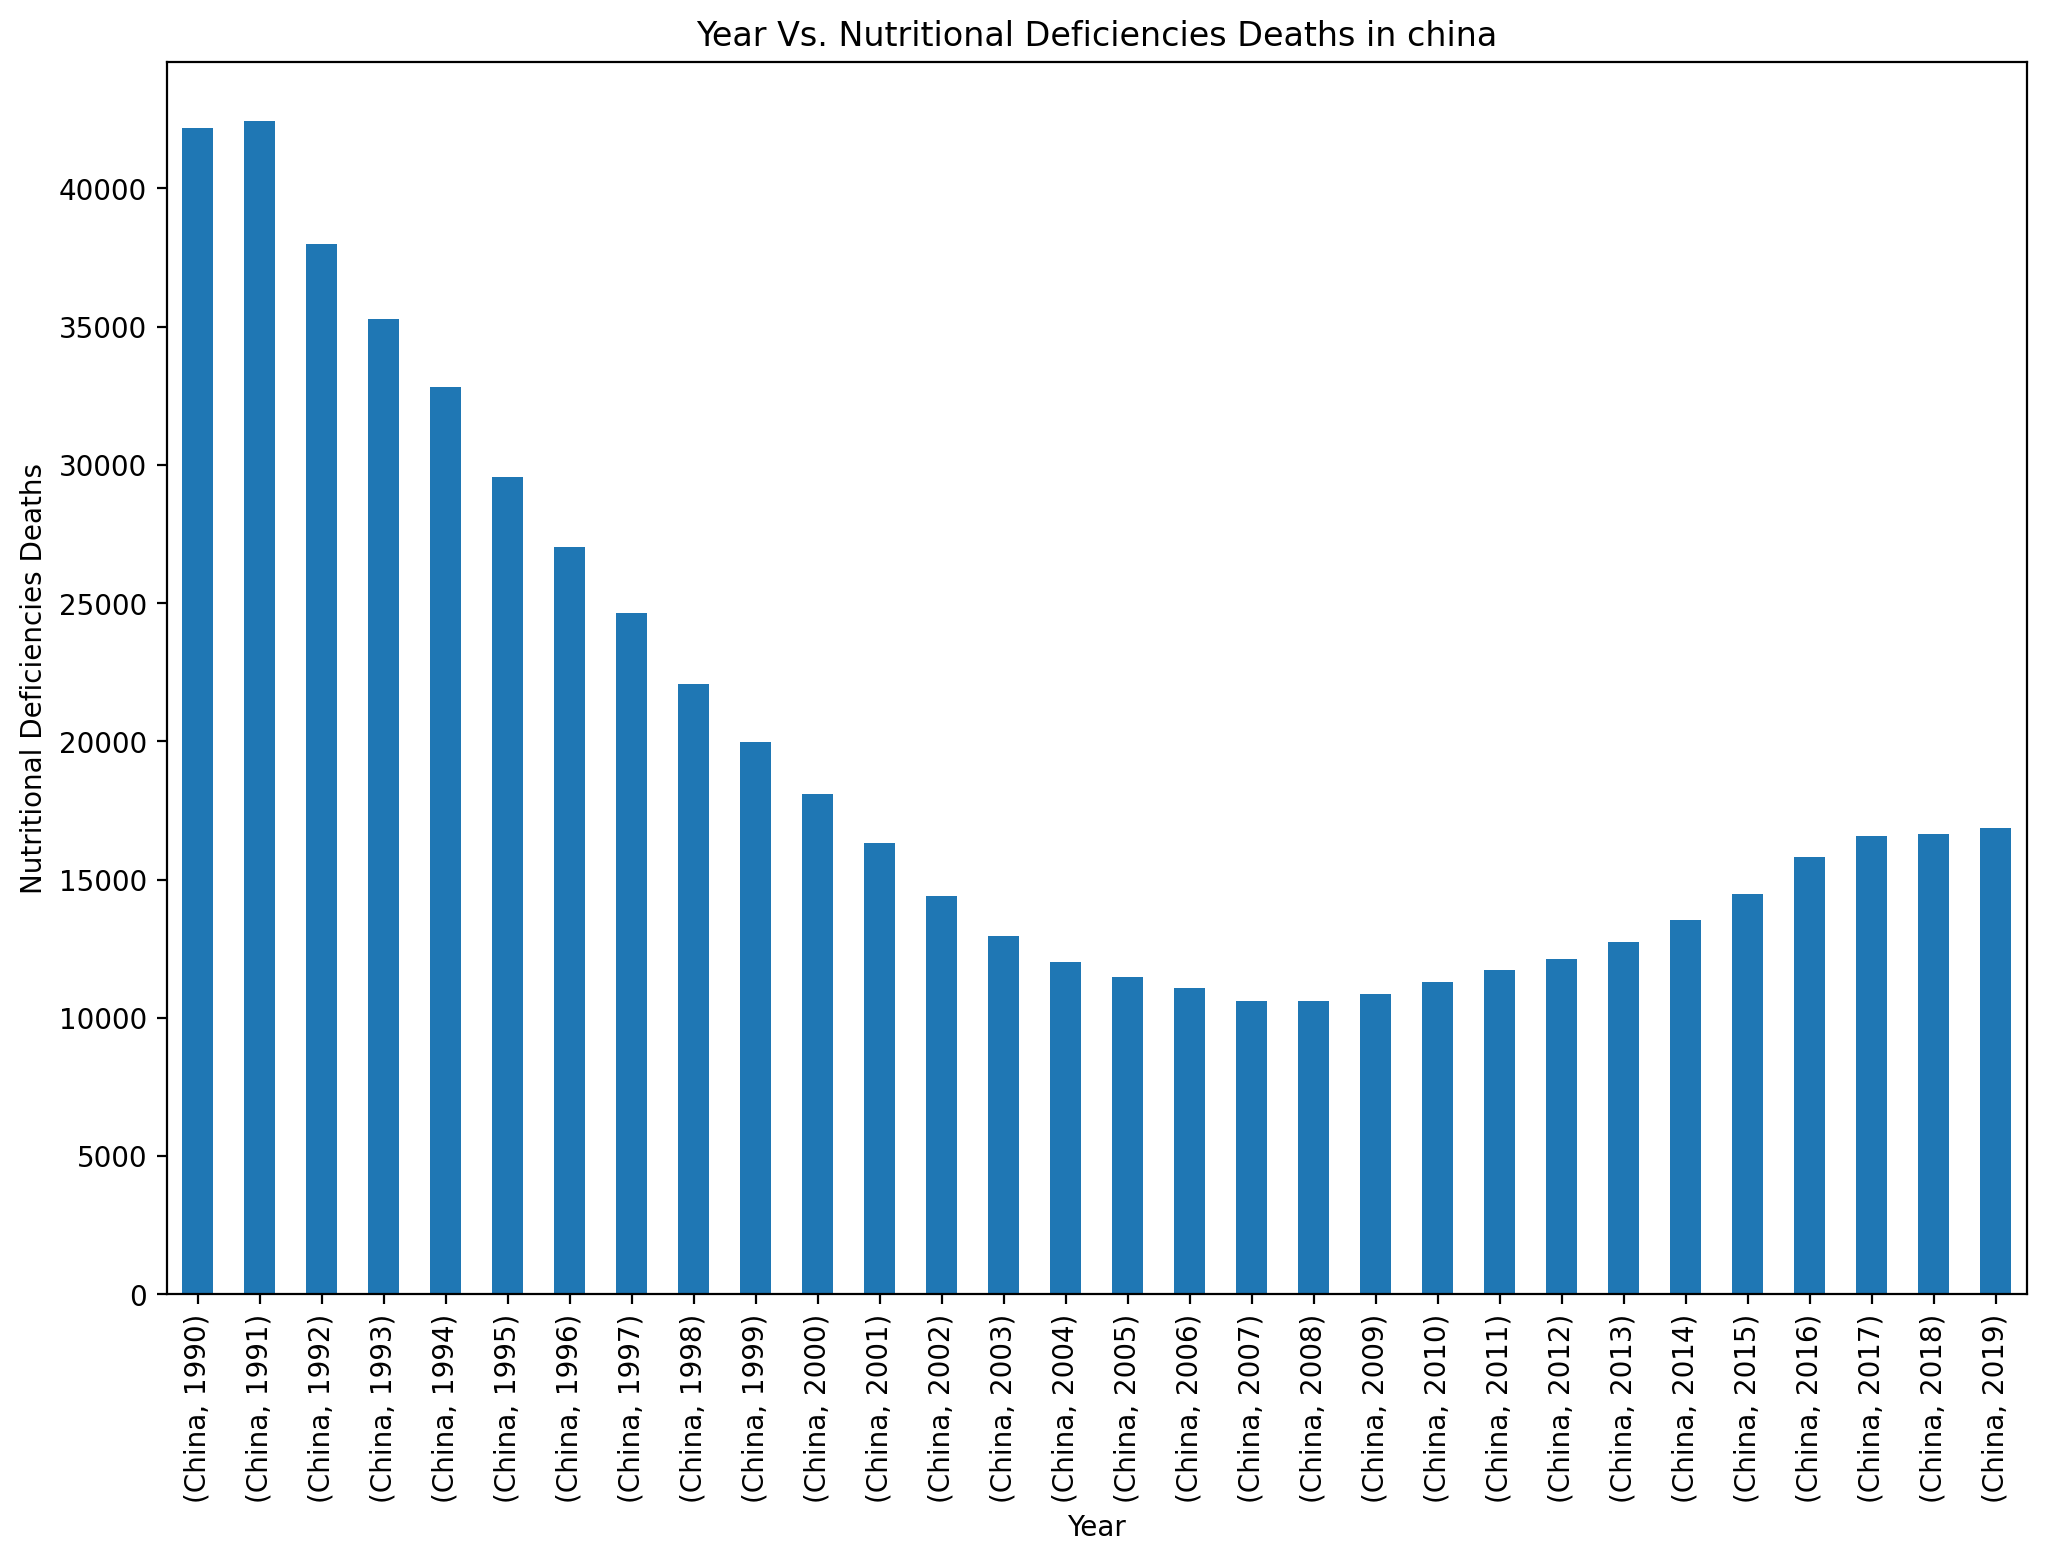

In [22]:
plt.figure(figsize=(12,8), dpi=200)
china_df=China_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Nutritional Deficiencies'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Nutritional Deficiencies Deaths")
plt.title("Year Vs. Nutritional Deficiencies Deaths in china")
plt.show()


There is a drop in Nutritional Deficiencies Deaths recorded in China in 2007 and from 2008 the count of deaths again started to raise.

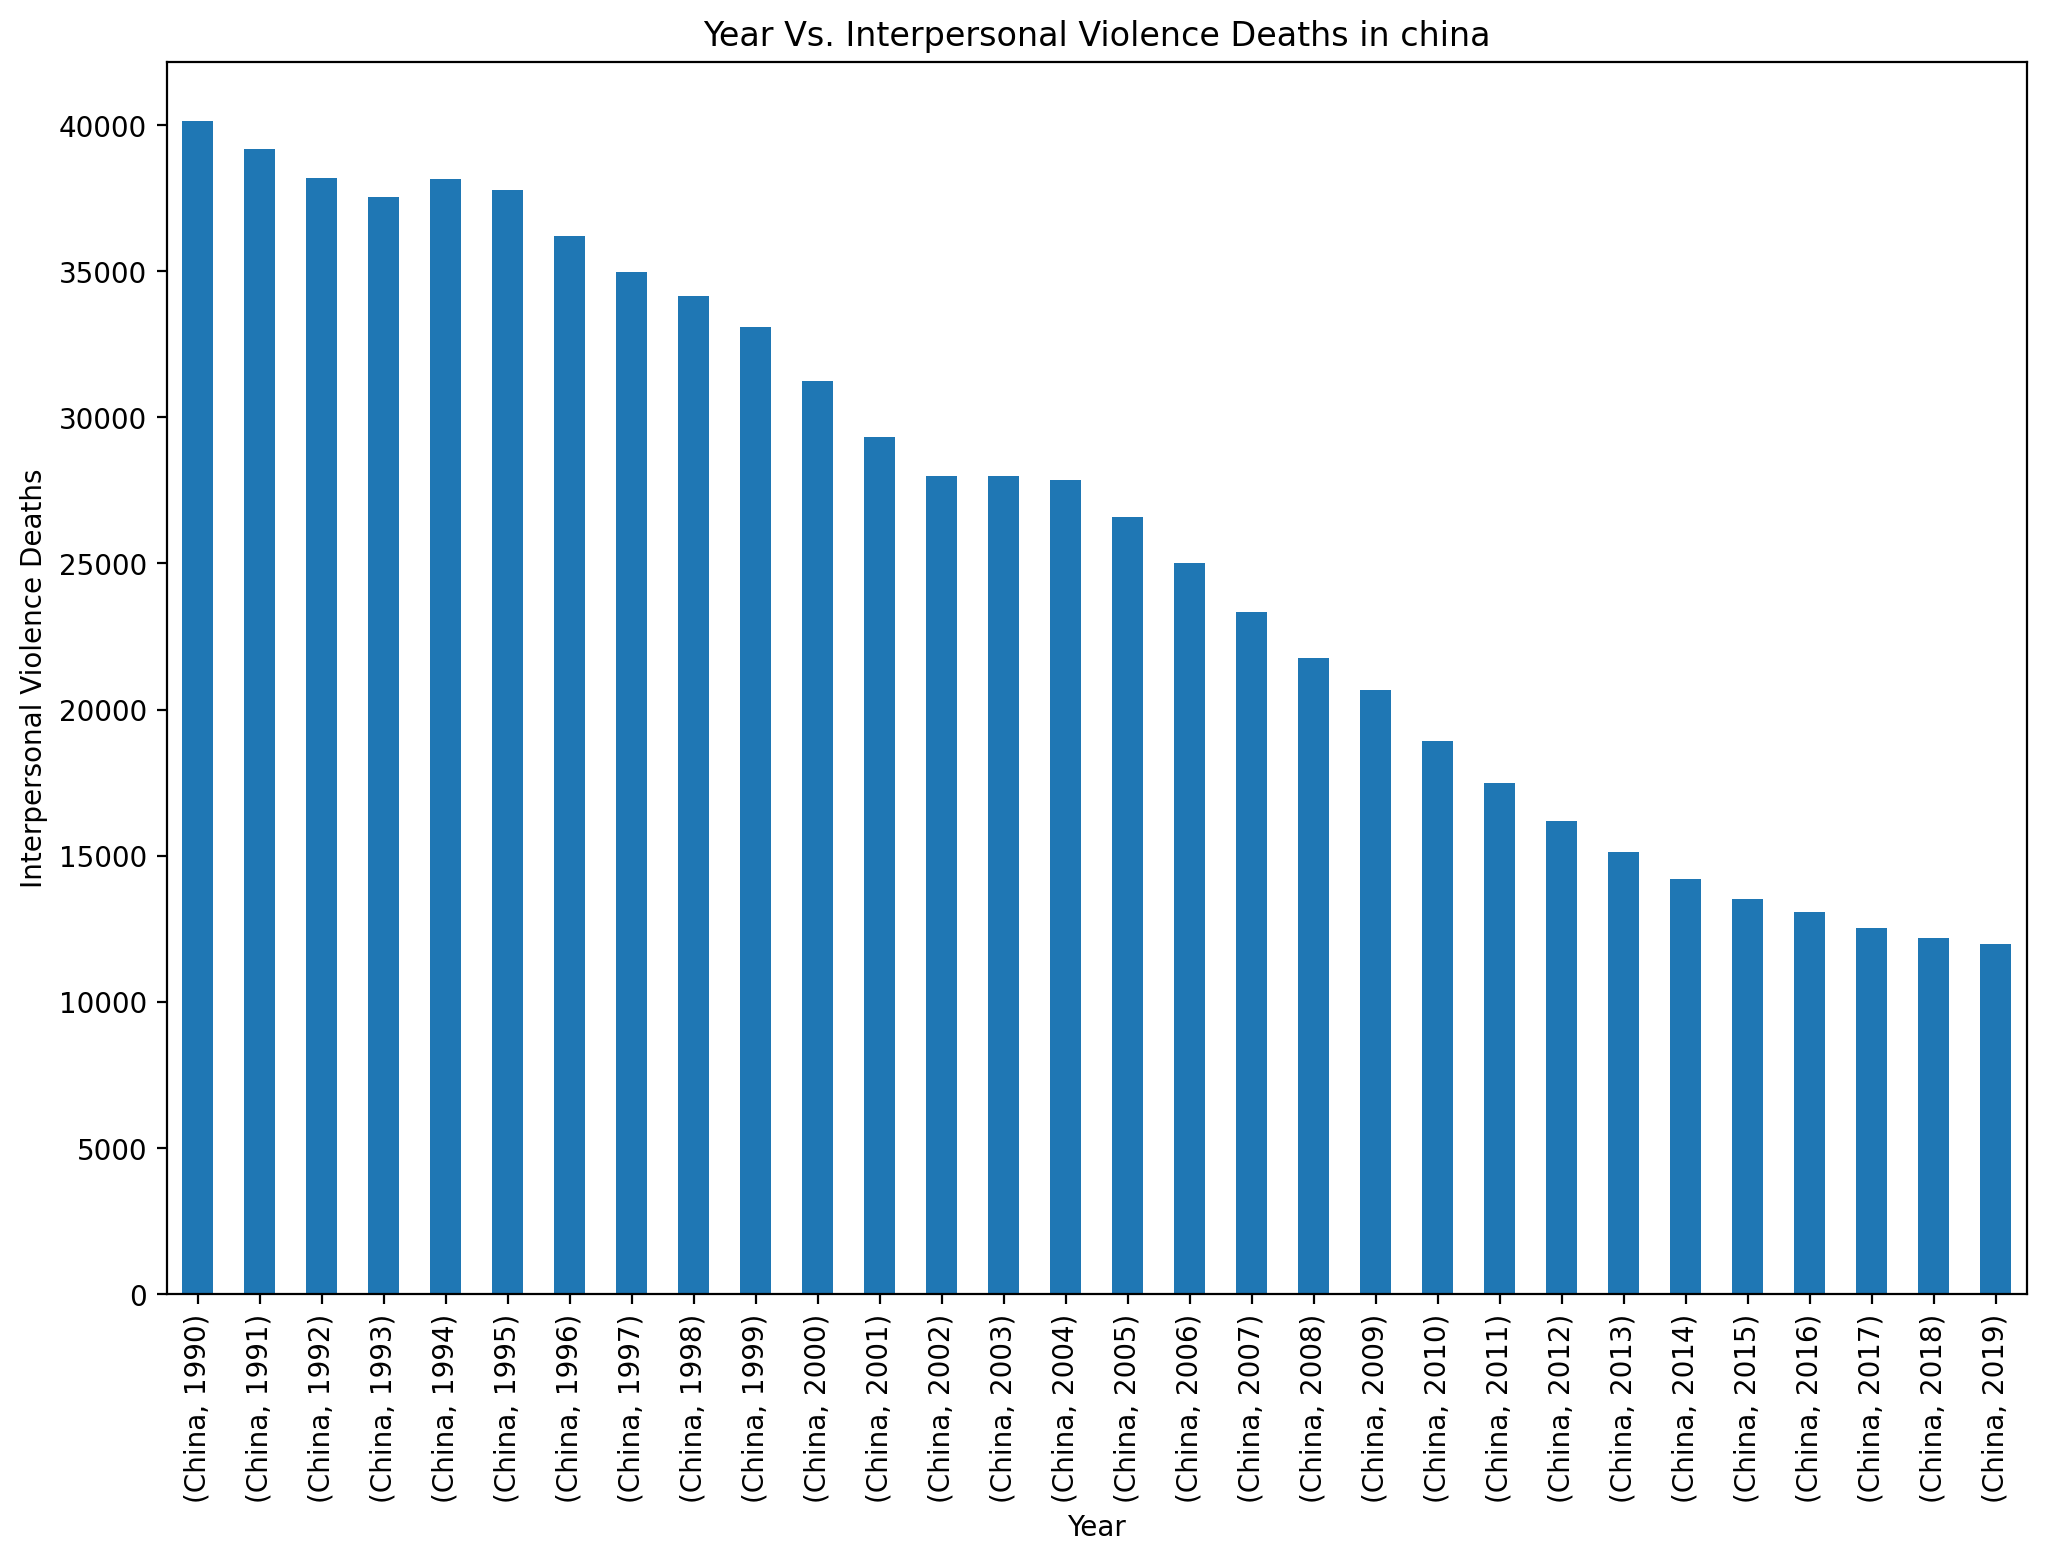

In [23]:
plt.figure(figsize=(12,8), dpi=200)
china_df=China_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Interpersonal Violence'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Interpersonal Violence Deaths")
plt.title("Year Vs. Interpersonal Violence Deaths in china")
plt.show()

There is a continual drop in Interpersonal Violence Deaths recorded in China.

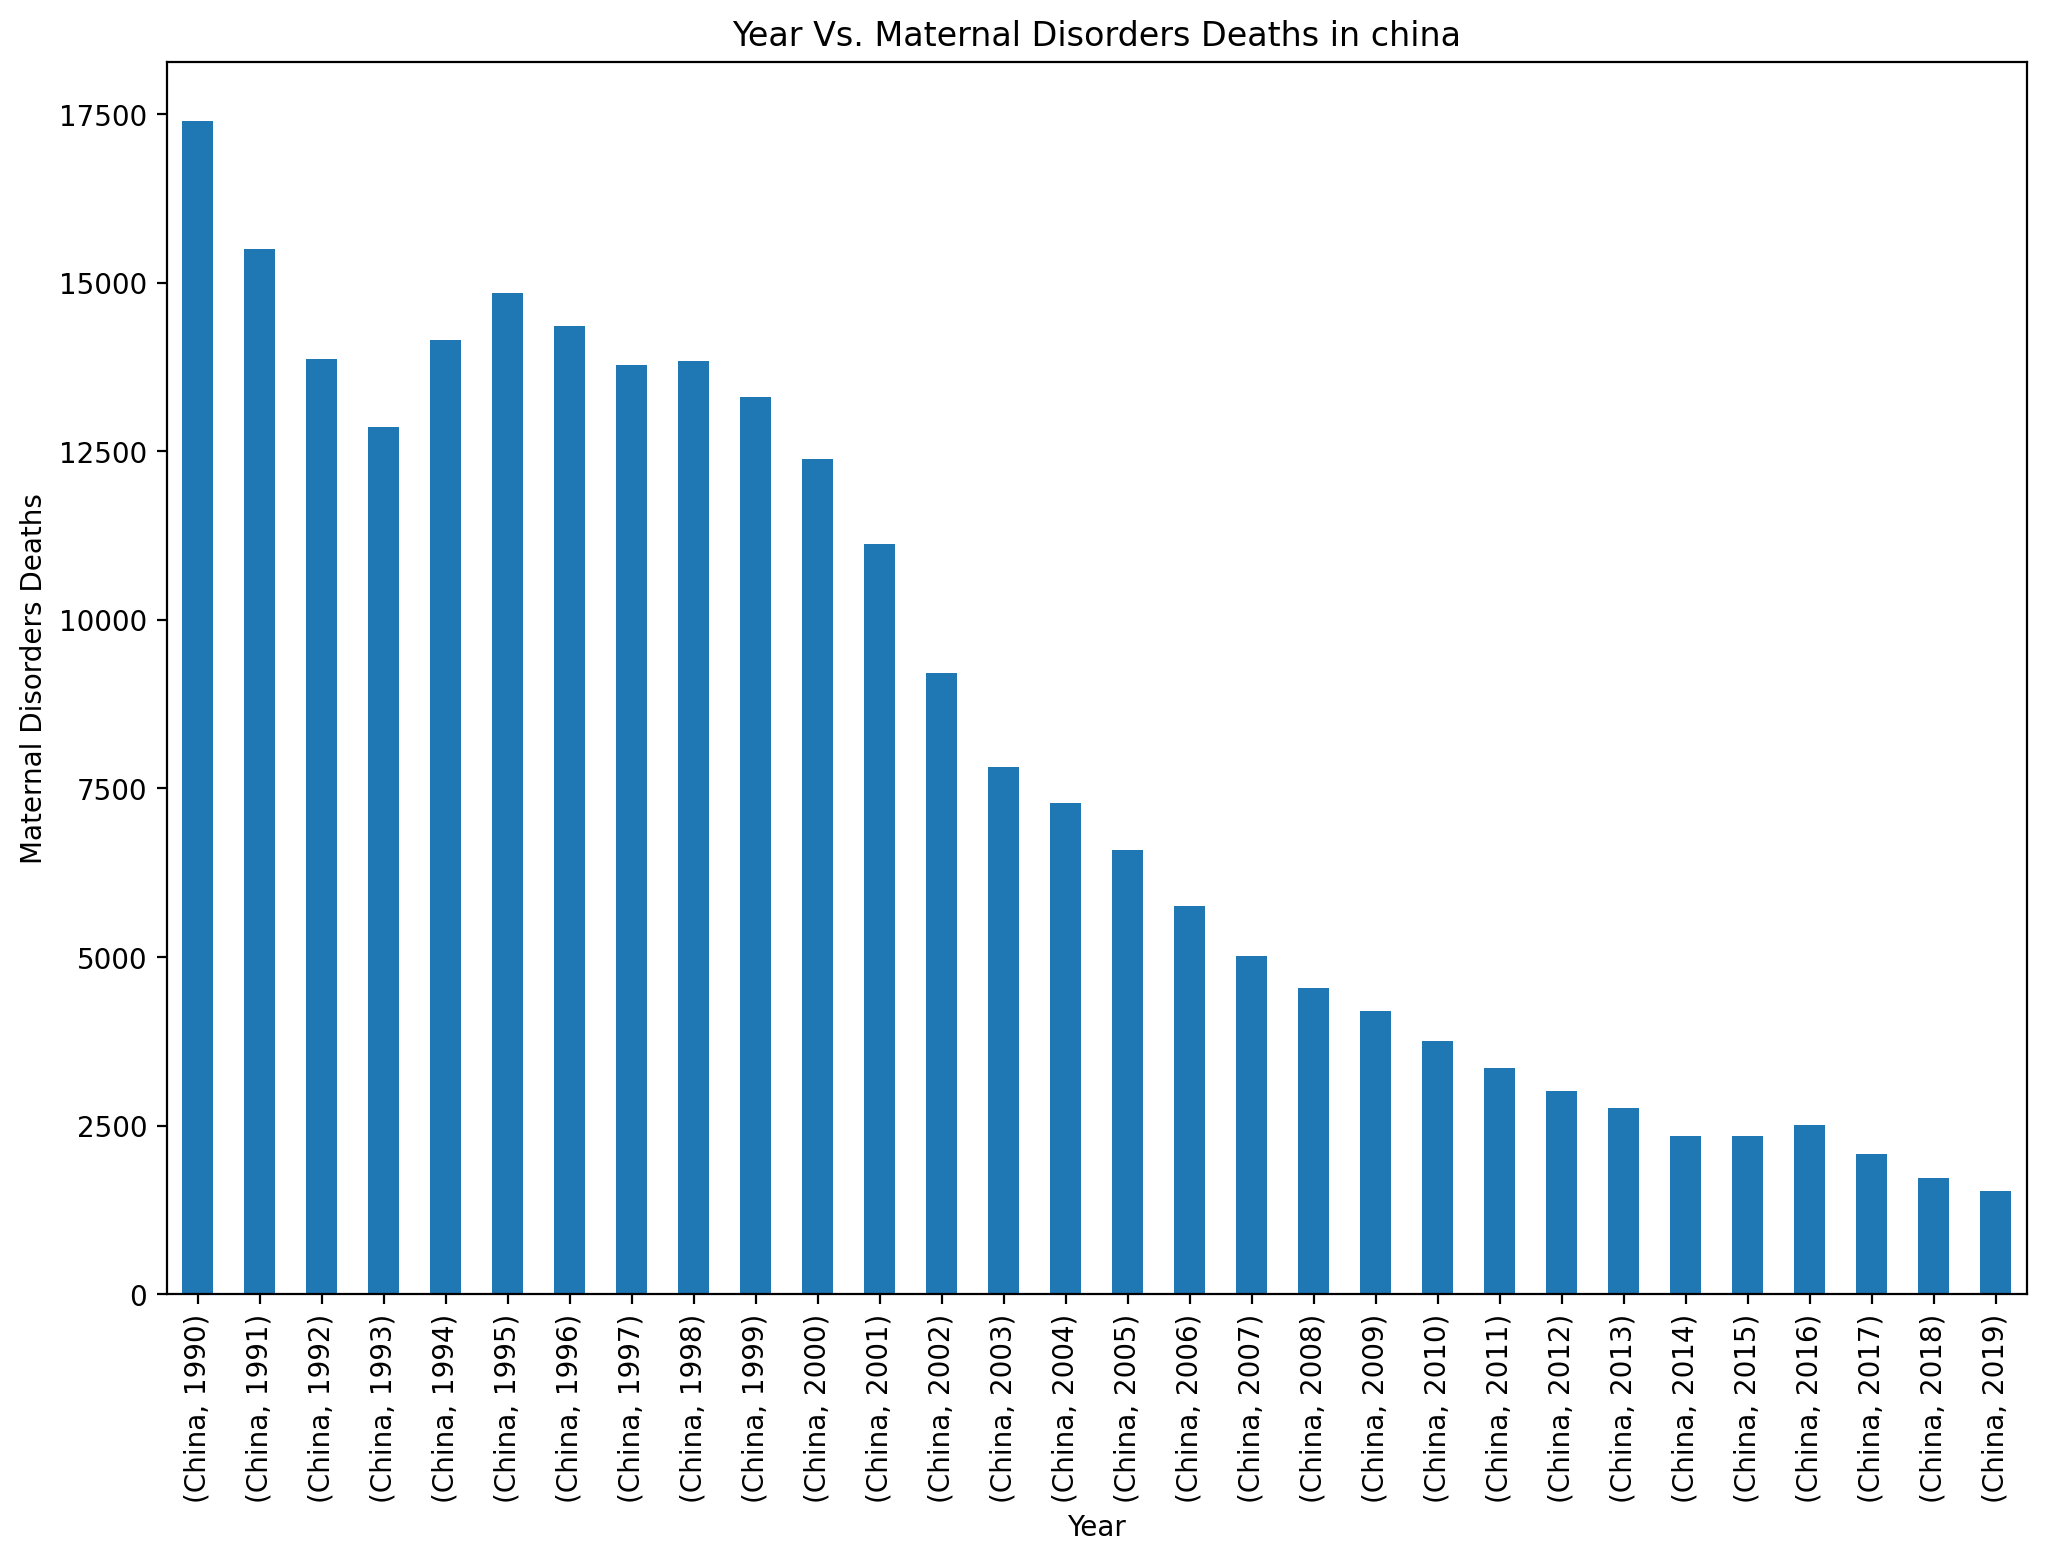

In [24]:
plt.figure(figsize=(12,8), dpi=200)
china_df=China_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Maternal Disorders'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Maternal Disorders Deaths")
plt.title("Year Vs. Maternal Disorders Deaths in china")
plt.show()

There is a continual drop in Maternal Disorder Deaths recorded in China after year 1998

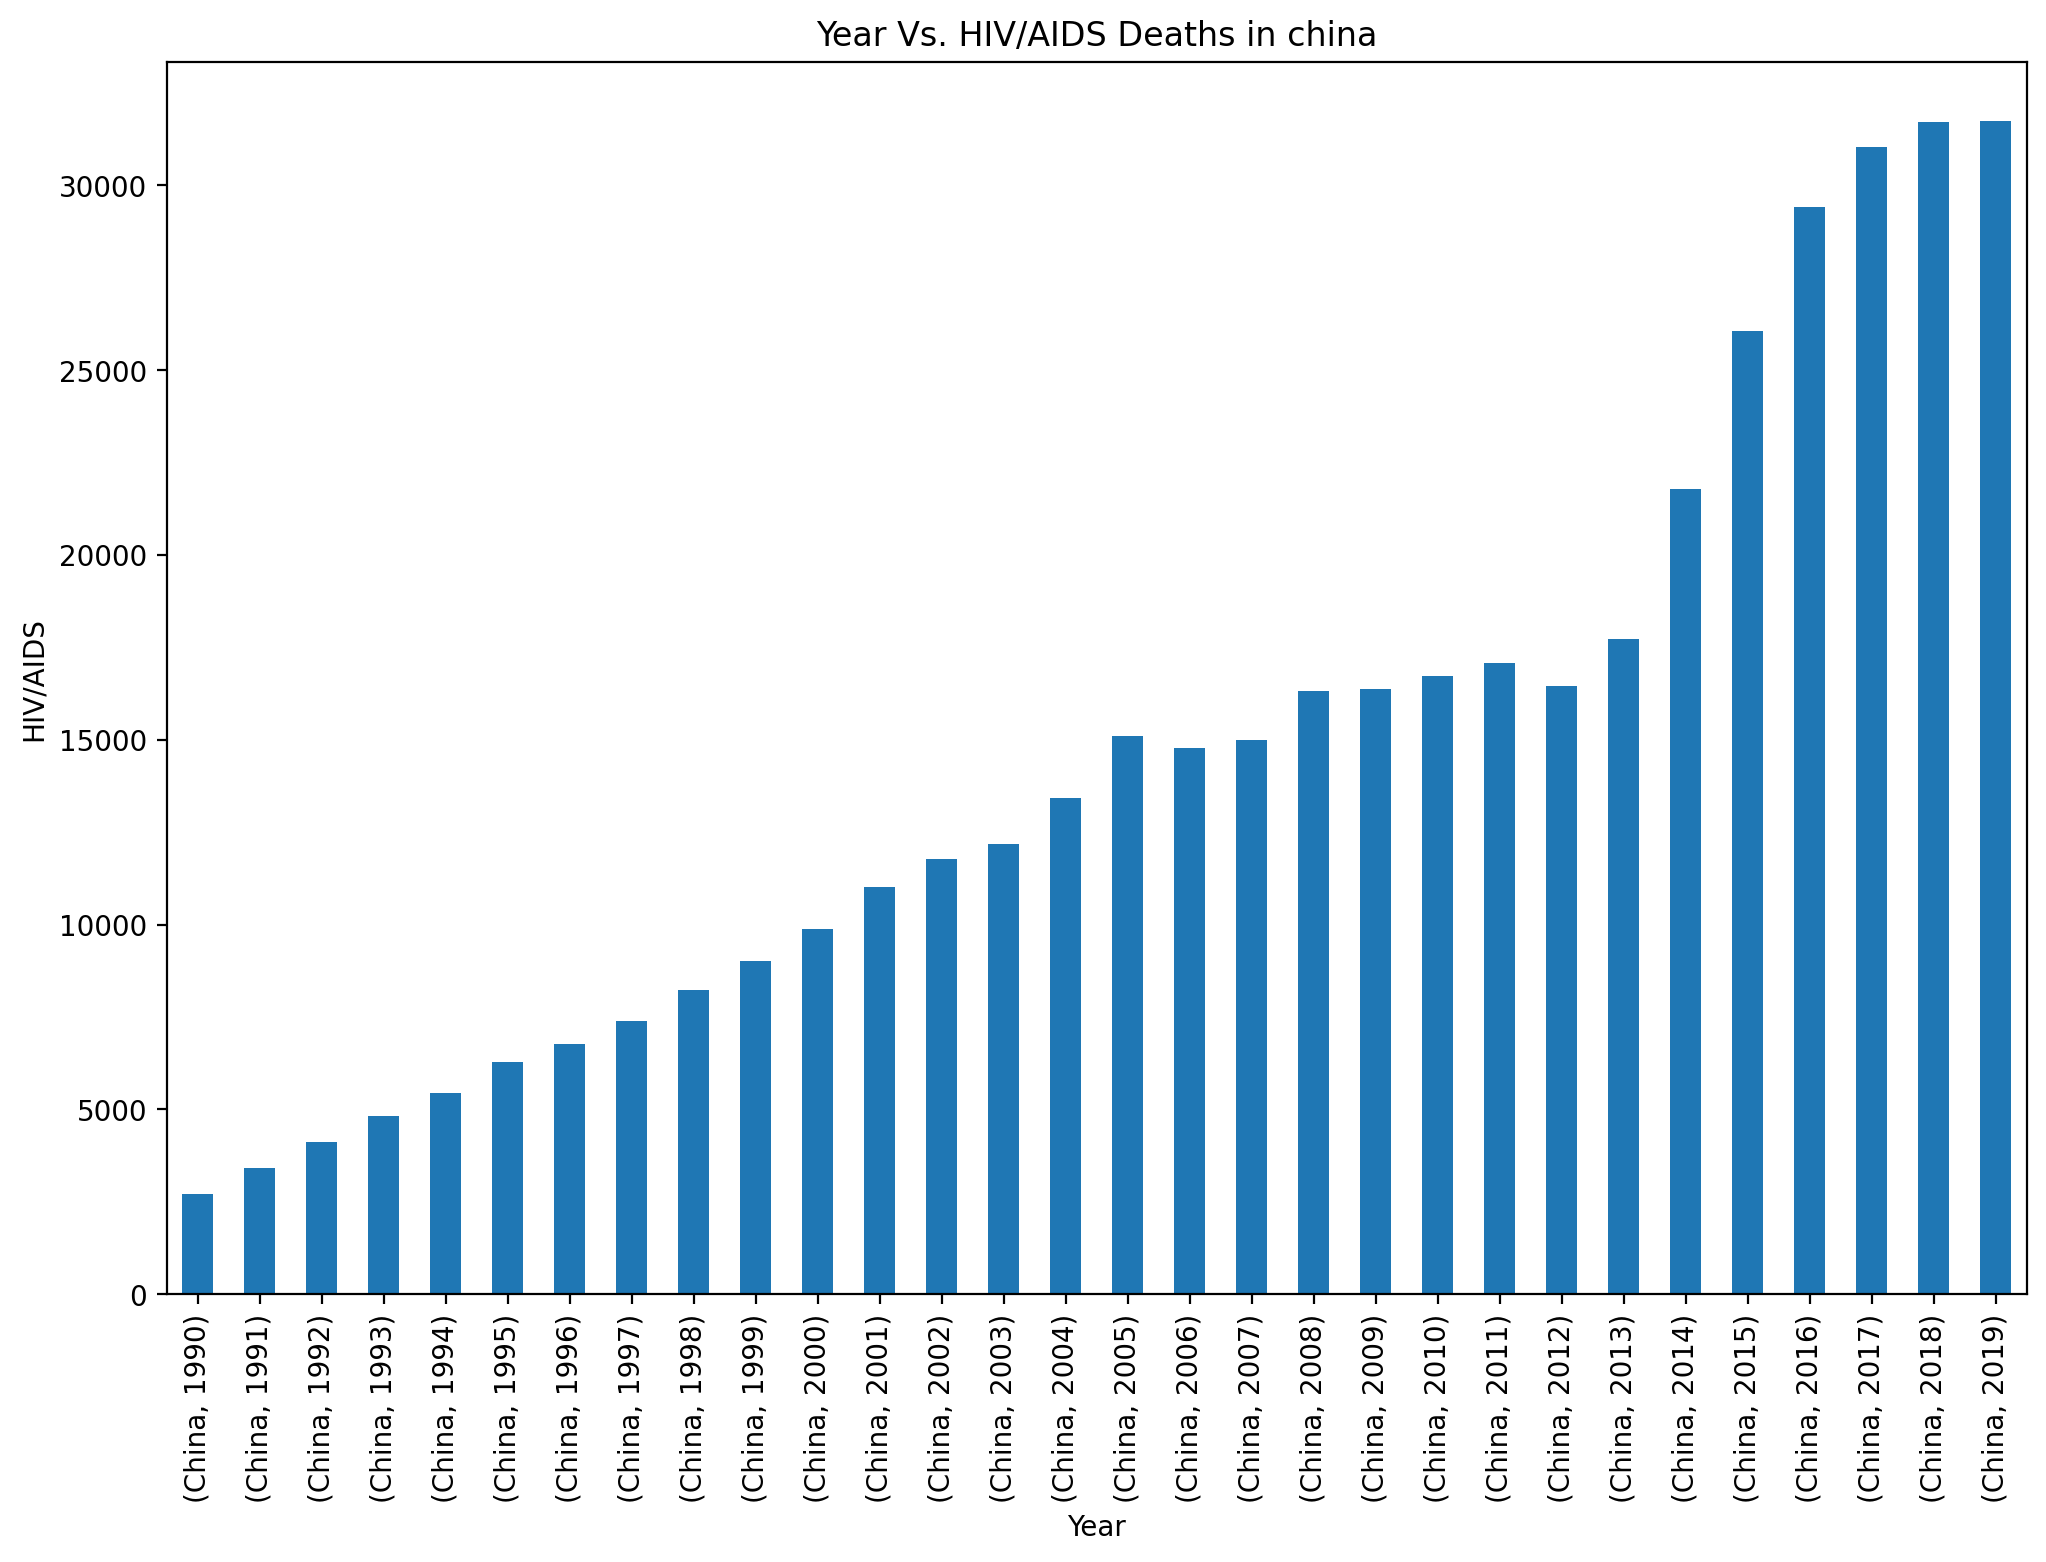

In [25]:
plt.figure(figsize=(12,8), dpi=200)
china_df=China_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['HIV/AIDS'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("HIV/AIDS")
plt.title("Year Vs. HIV/AIDS Deaths in china")
plt.show()

There is a continual increase in HIV/AIDS Deaths recorded in China.

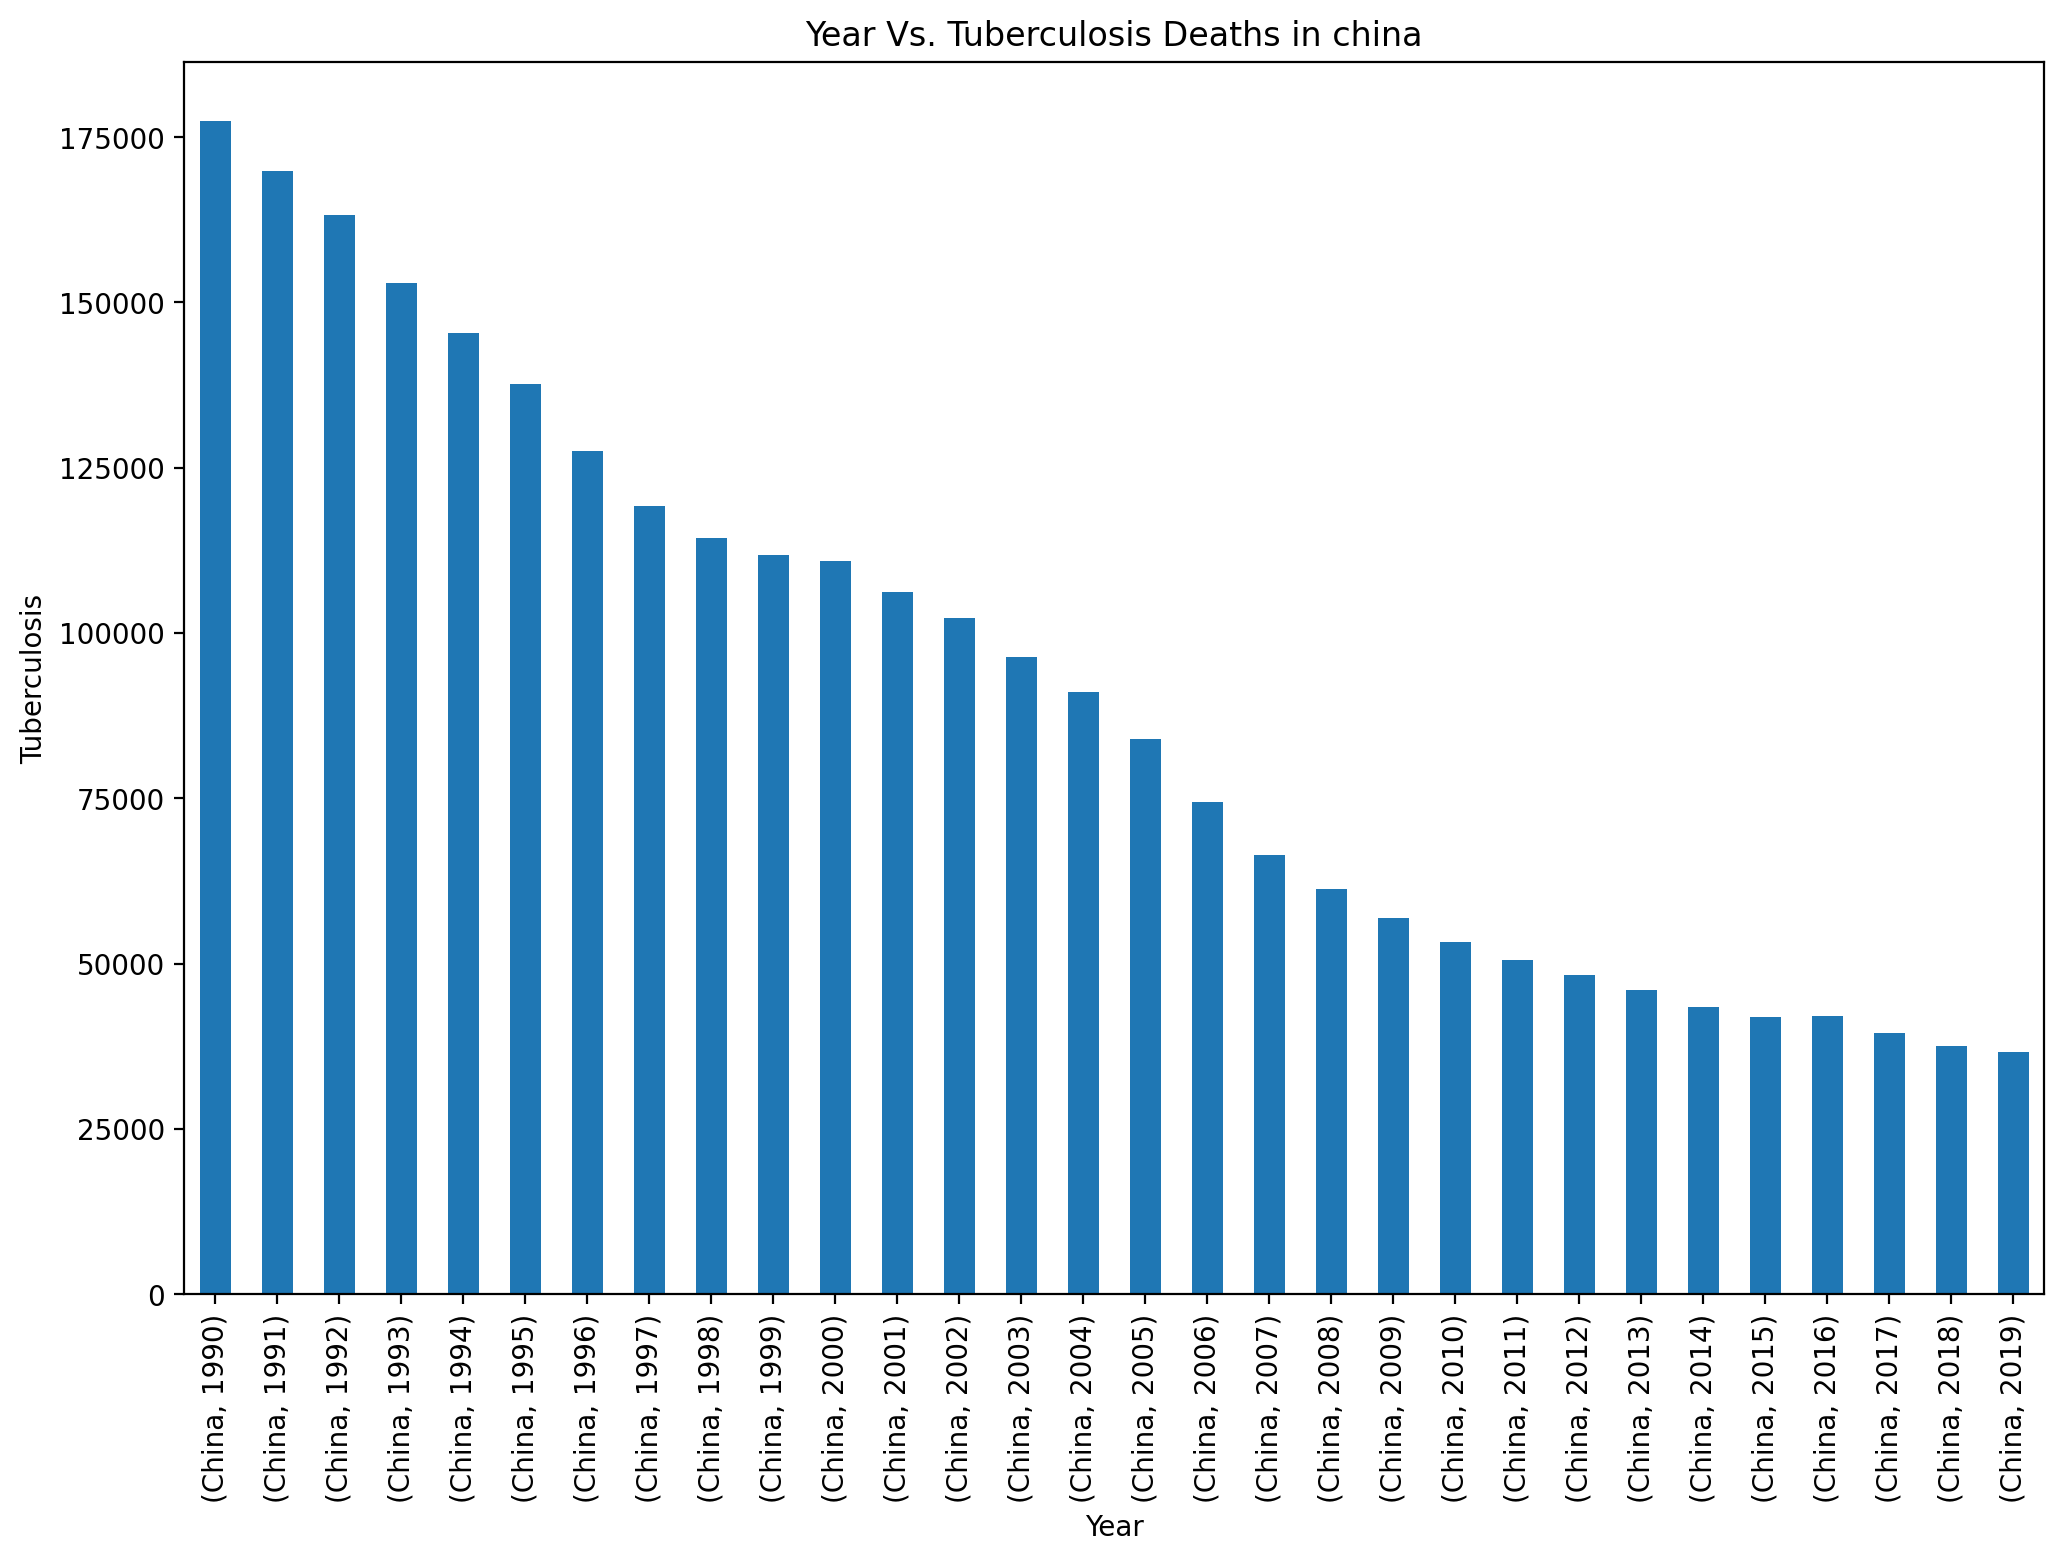

In [26]:
plt.figure(figsize=(12,8), dpi=200)
china_df=China_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Tuberculosis'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Tuberculosis")
plt.title("Year Vs. Tuberculosis Deaths in china")
plt.show()

There is a continual decrease in Tuberculosis Deaths recorded in China.

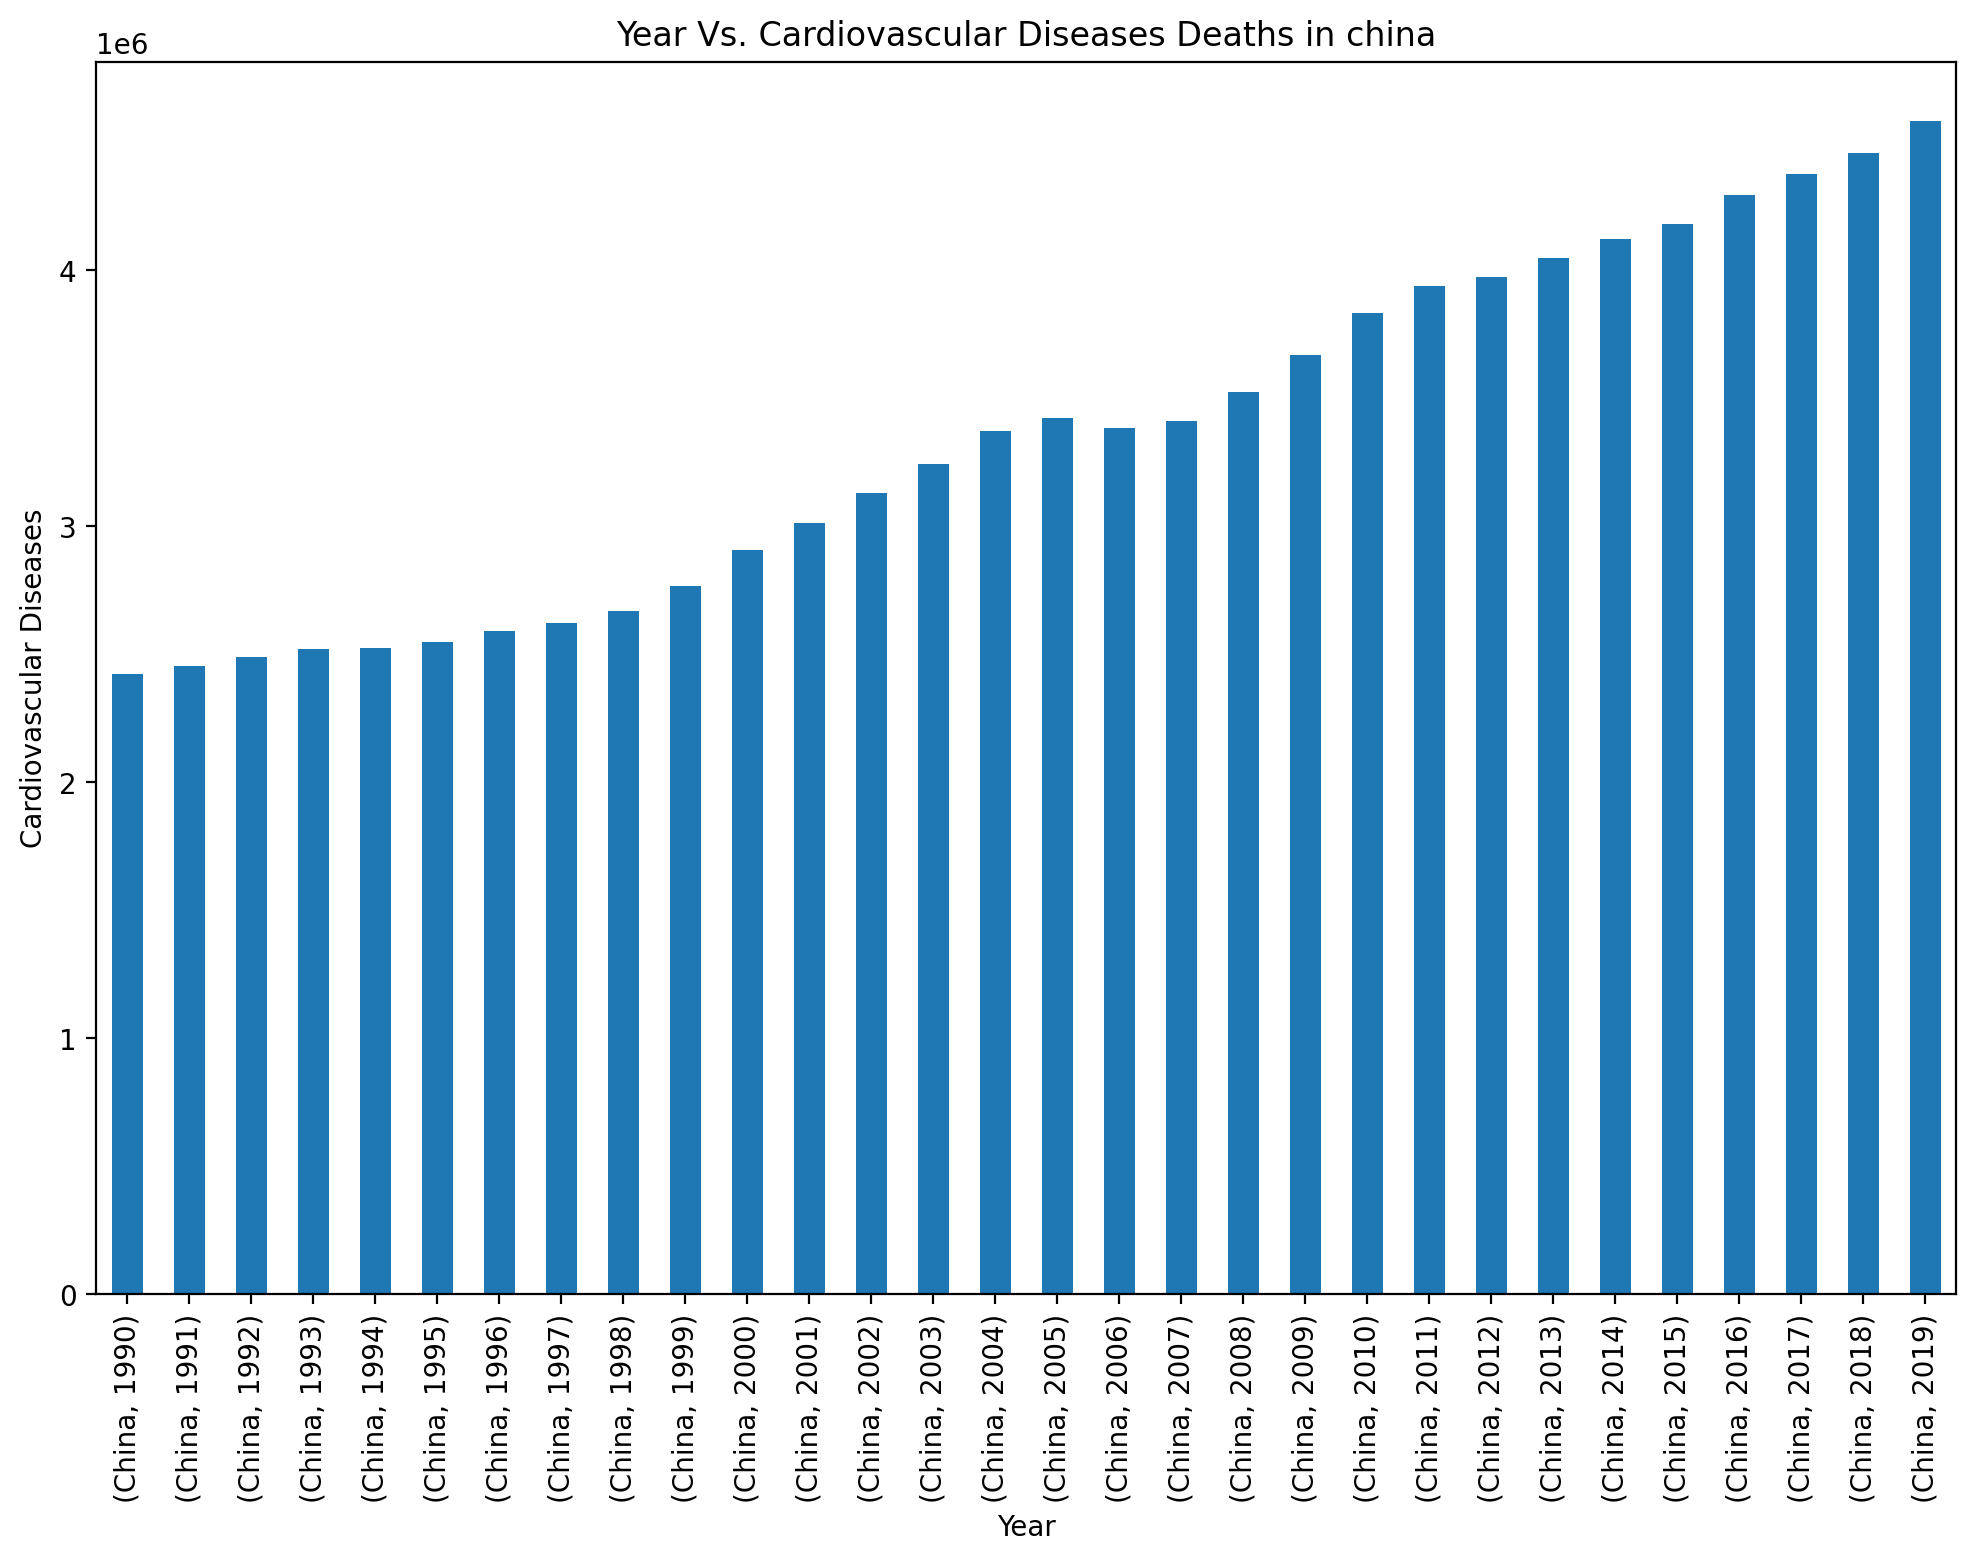

In [27]:
plt.figure(figsize=(12,8), dpi=200)
china_df=China_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Cardiovascular Diseases'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Cardiovascular Diseases")
plt.title("Year Vs. Cardiovascular Diseases Deaths in china")
plt.show()

There is a continual increase in Cardiovascular Diseases Deaths recorded in China.

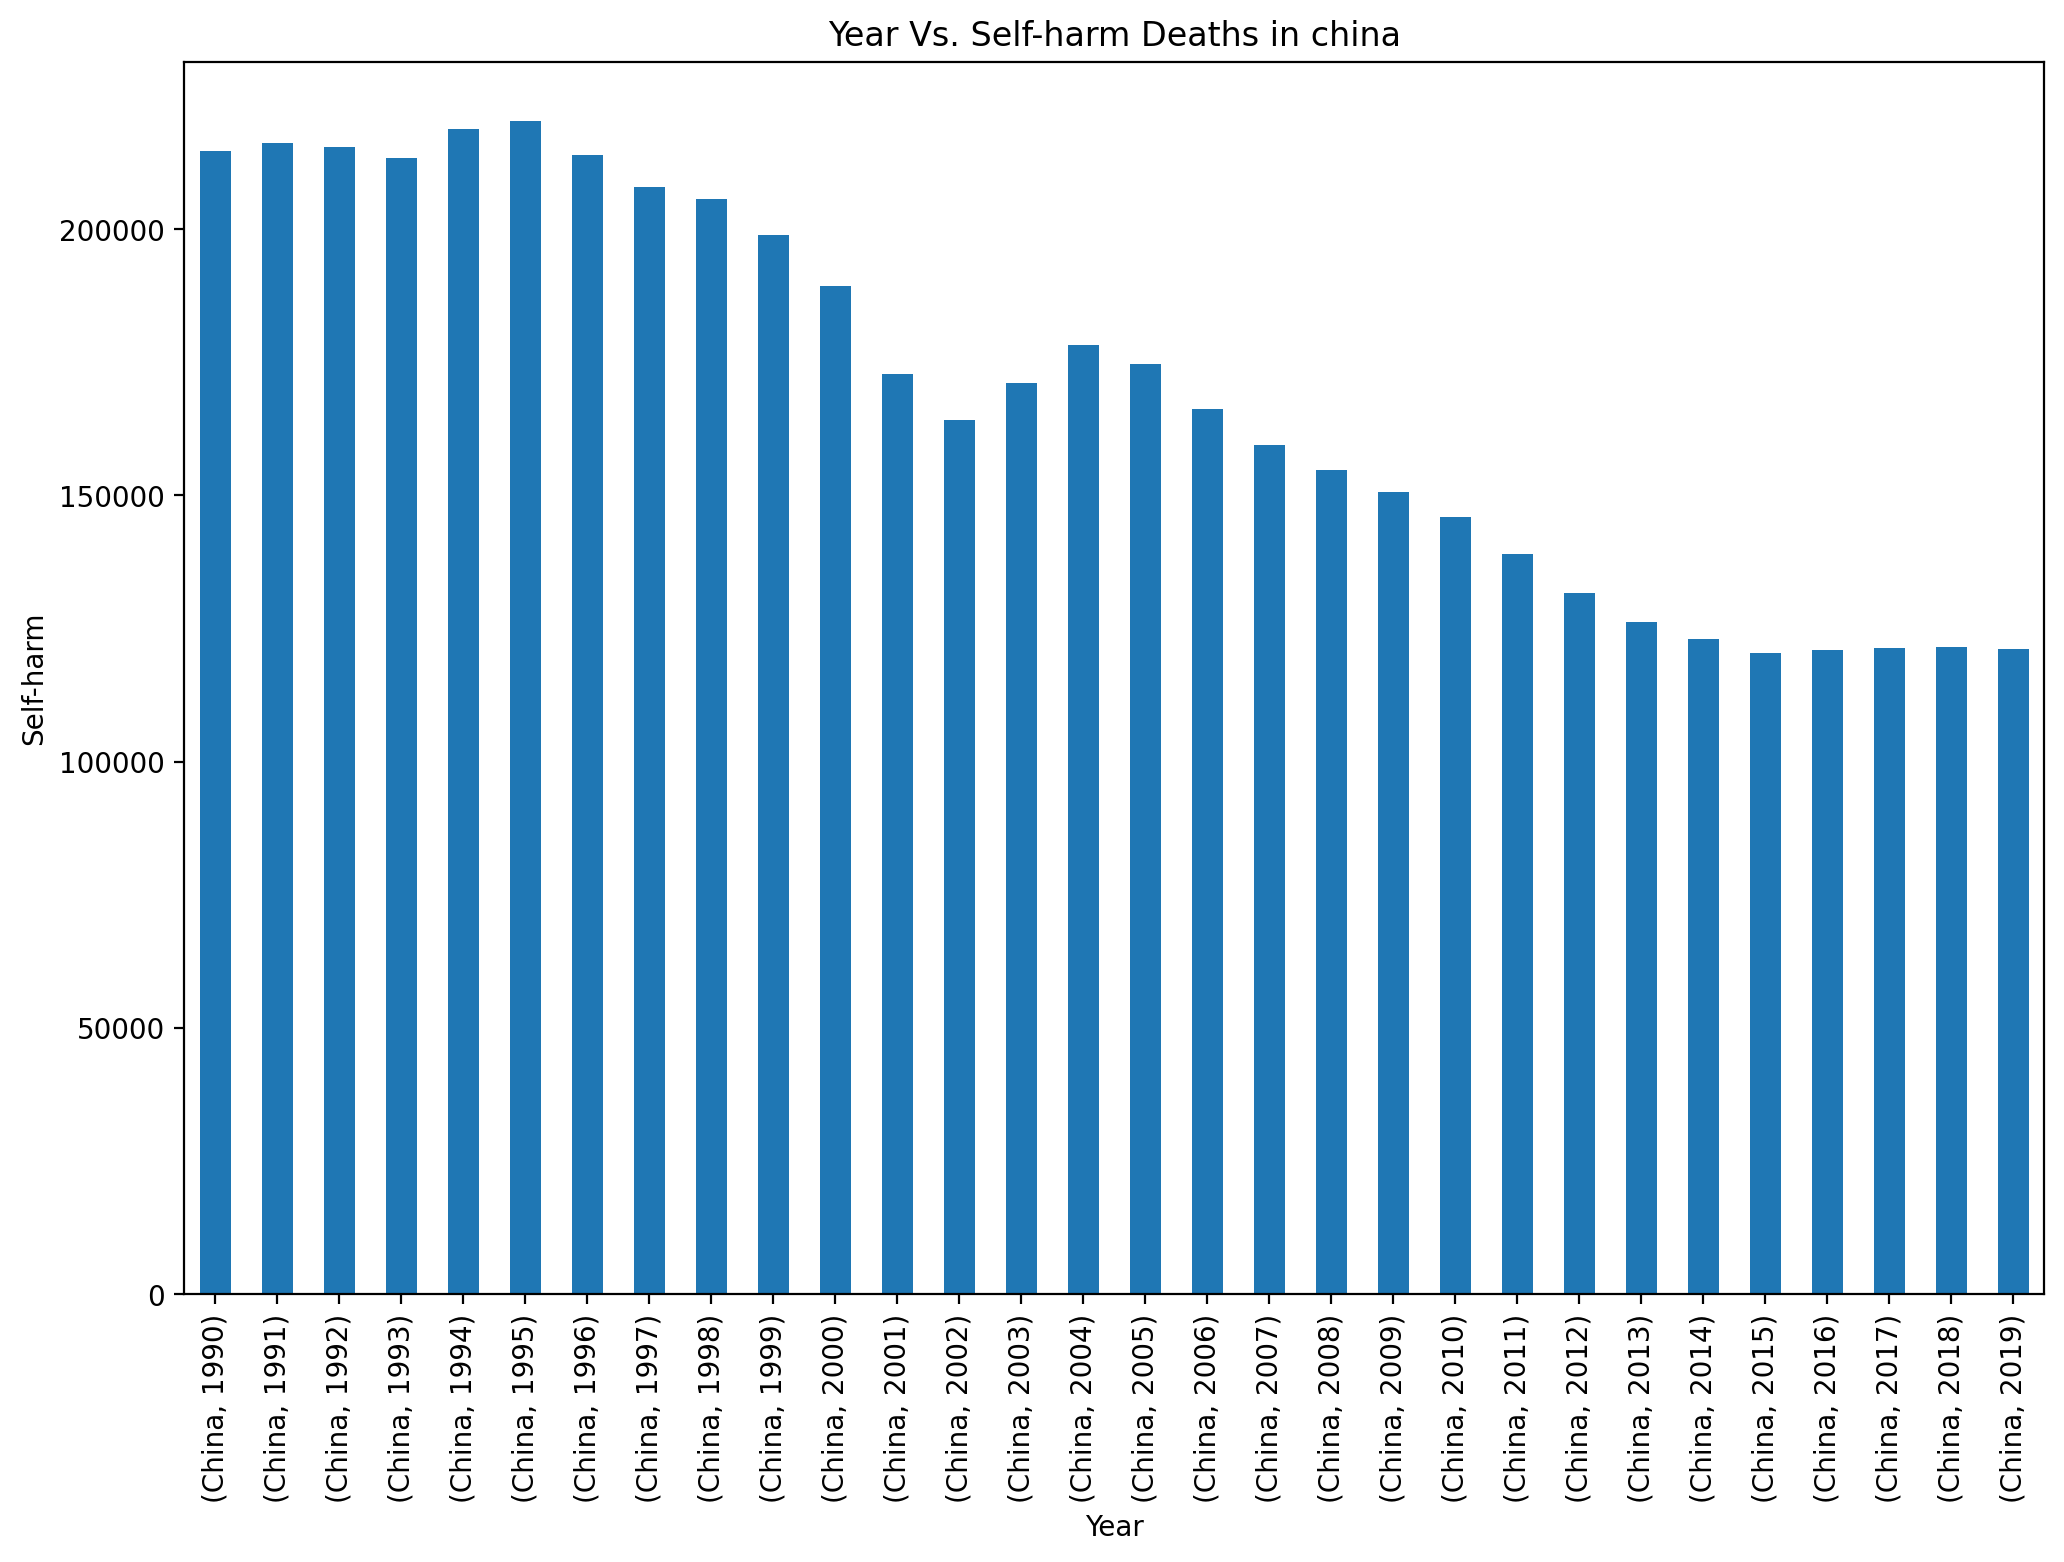

In [28]:
plt.figure(figsize=(12,8), dpi=200)
china_df=China_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Self-harm'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Self-harm")
plt.title("Year Vs. Self-harm Deaths in china")
plt.show()

There is a continual drop in Self-harm Deaths recorded in China after year 2004

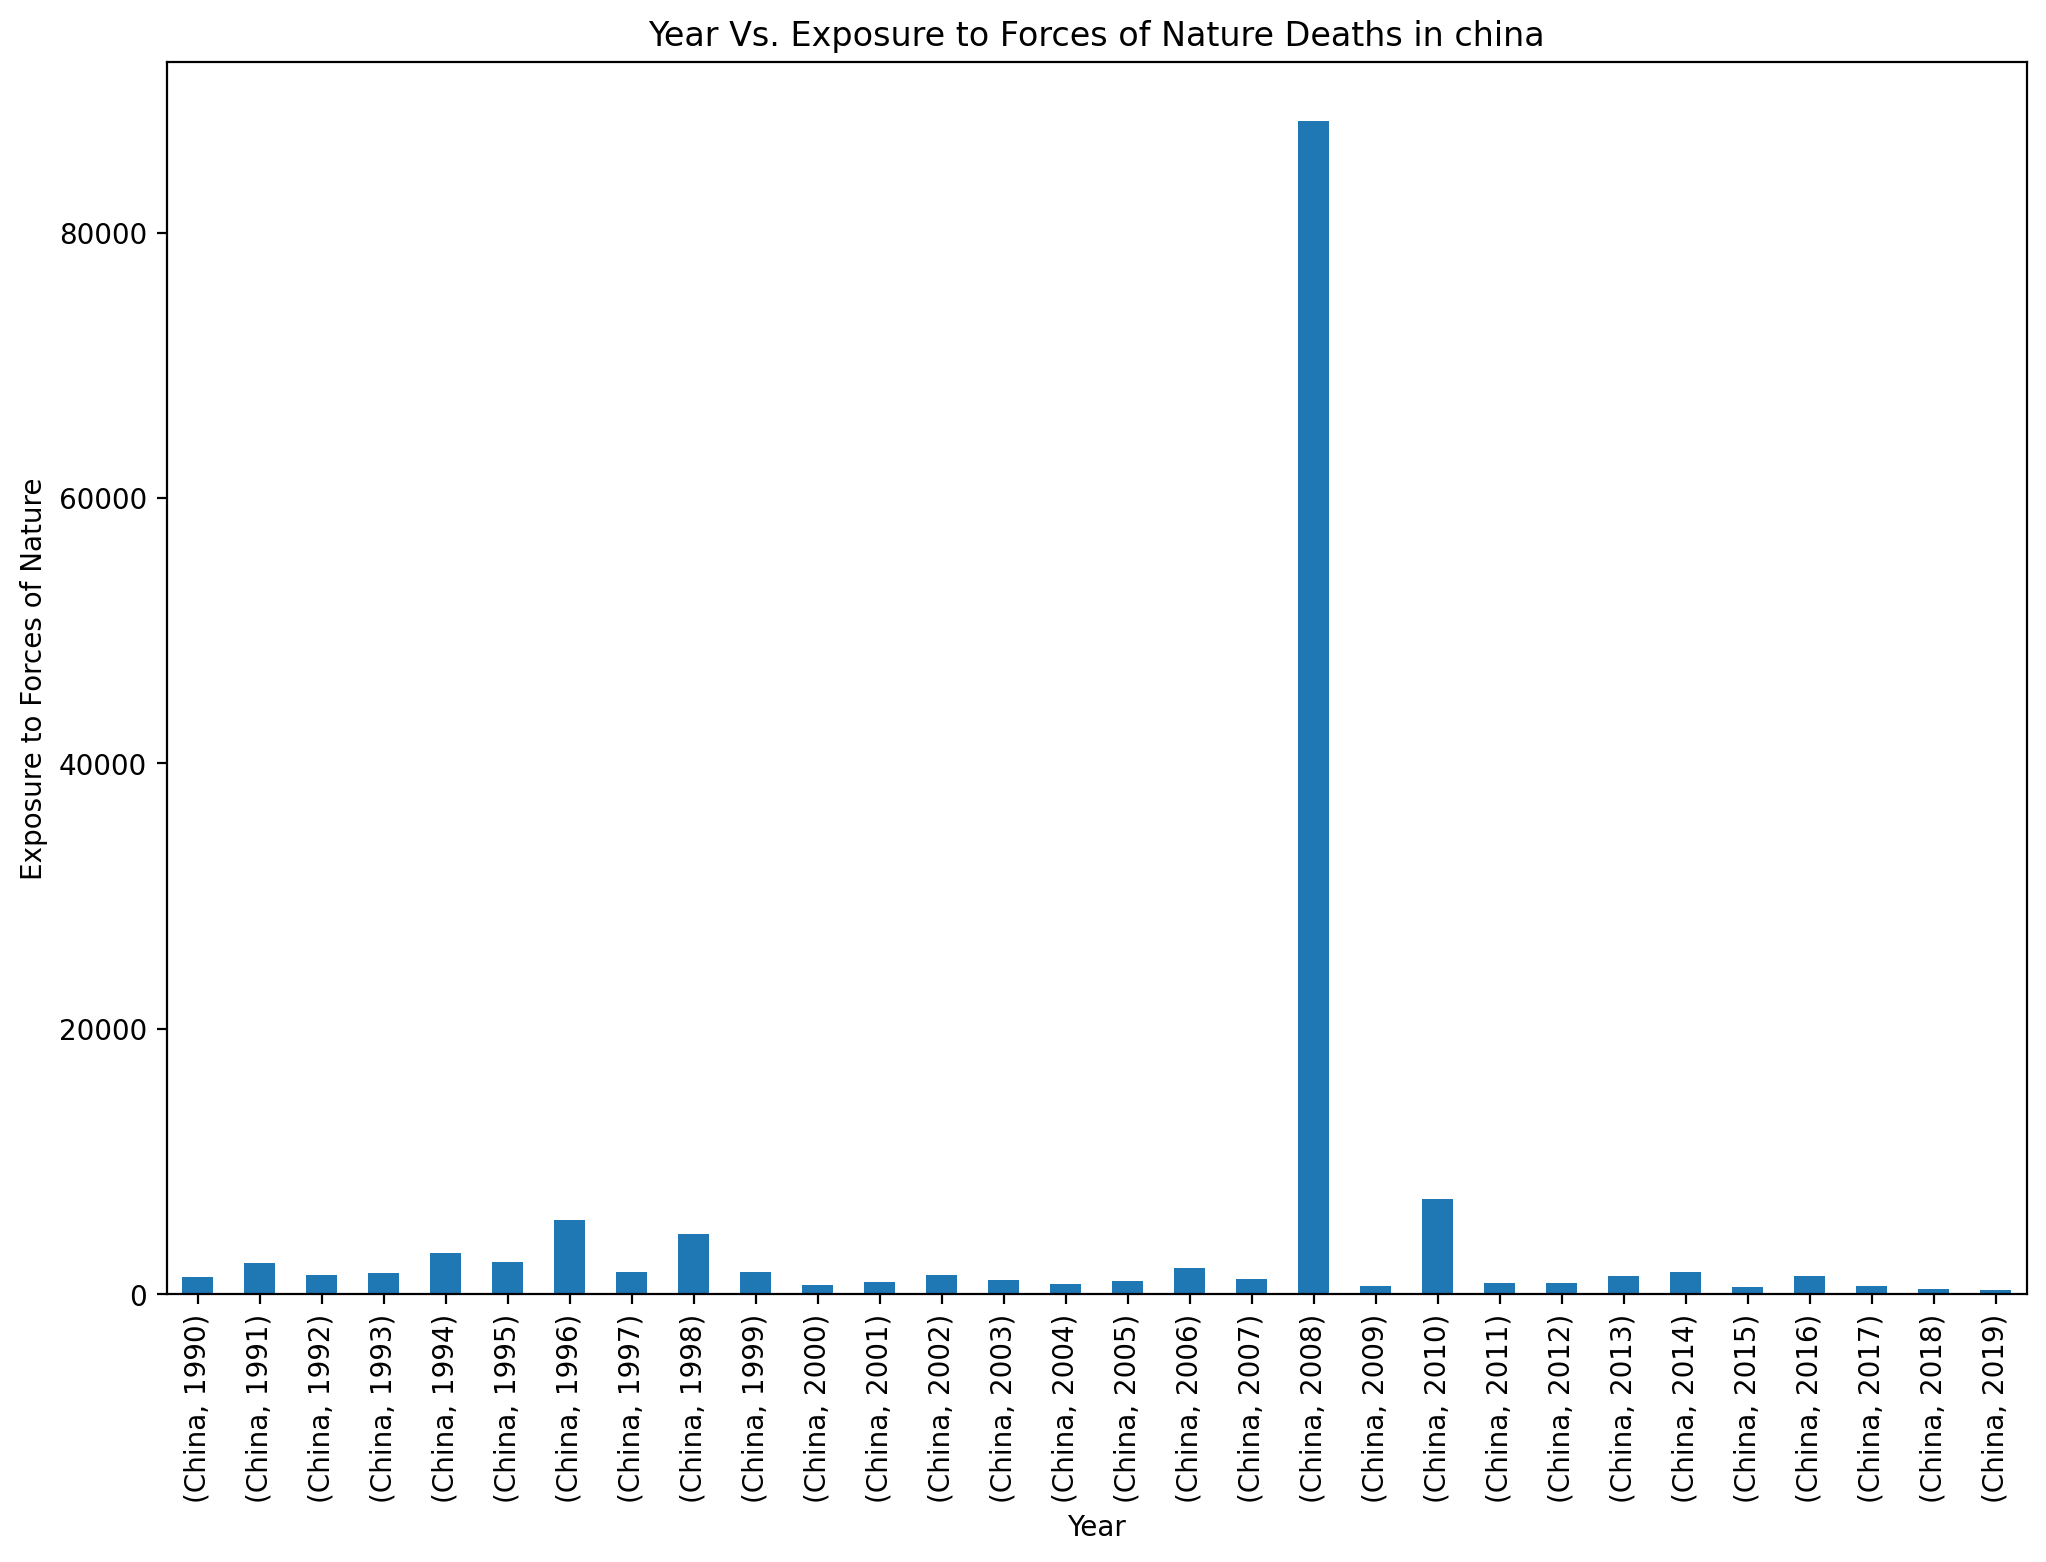

In [29]:
plt.figure(figsize=(12,8), dpi=200)
china_df=China_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Exposure to Forces of Nature'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Exposure to Forces of Nature")
plt.title("Year Vs. Exposure to Forces of Nature Deaths in china")
plt.show()

There is a rapid raise in Exposure to Forces of Nature Deaths recorded in China in the year 2004 this is because of Sichuan earthquake of 2008.

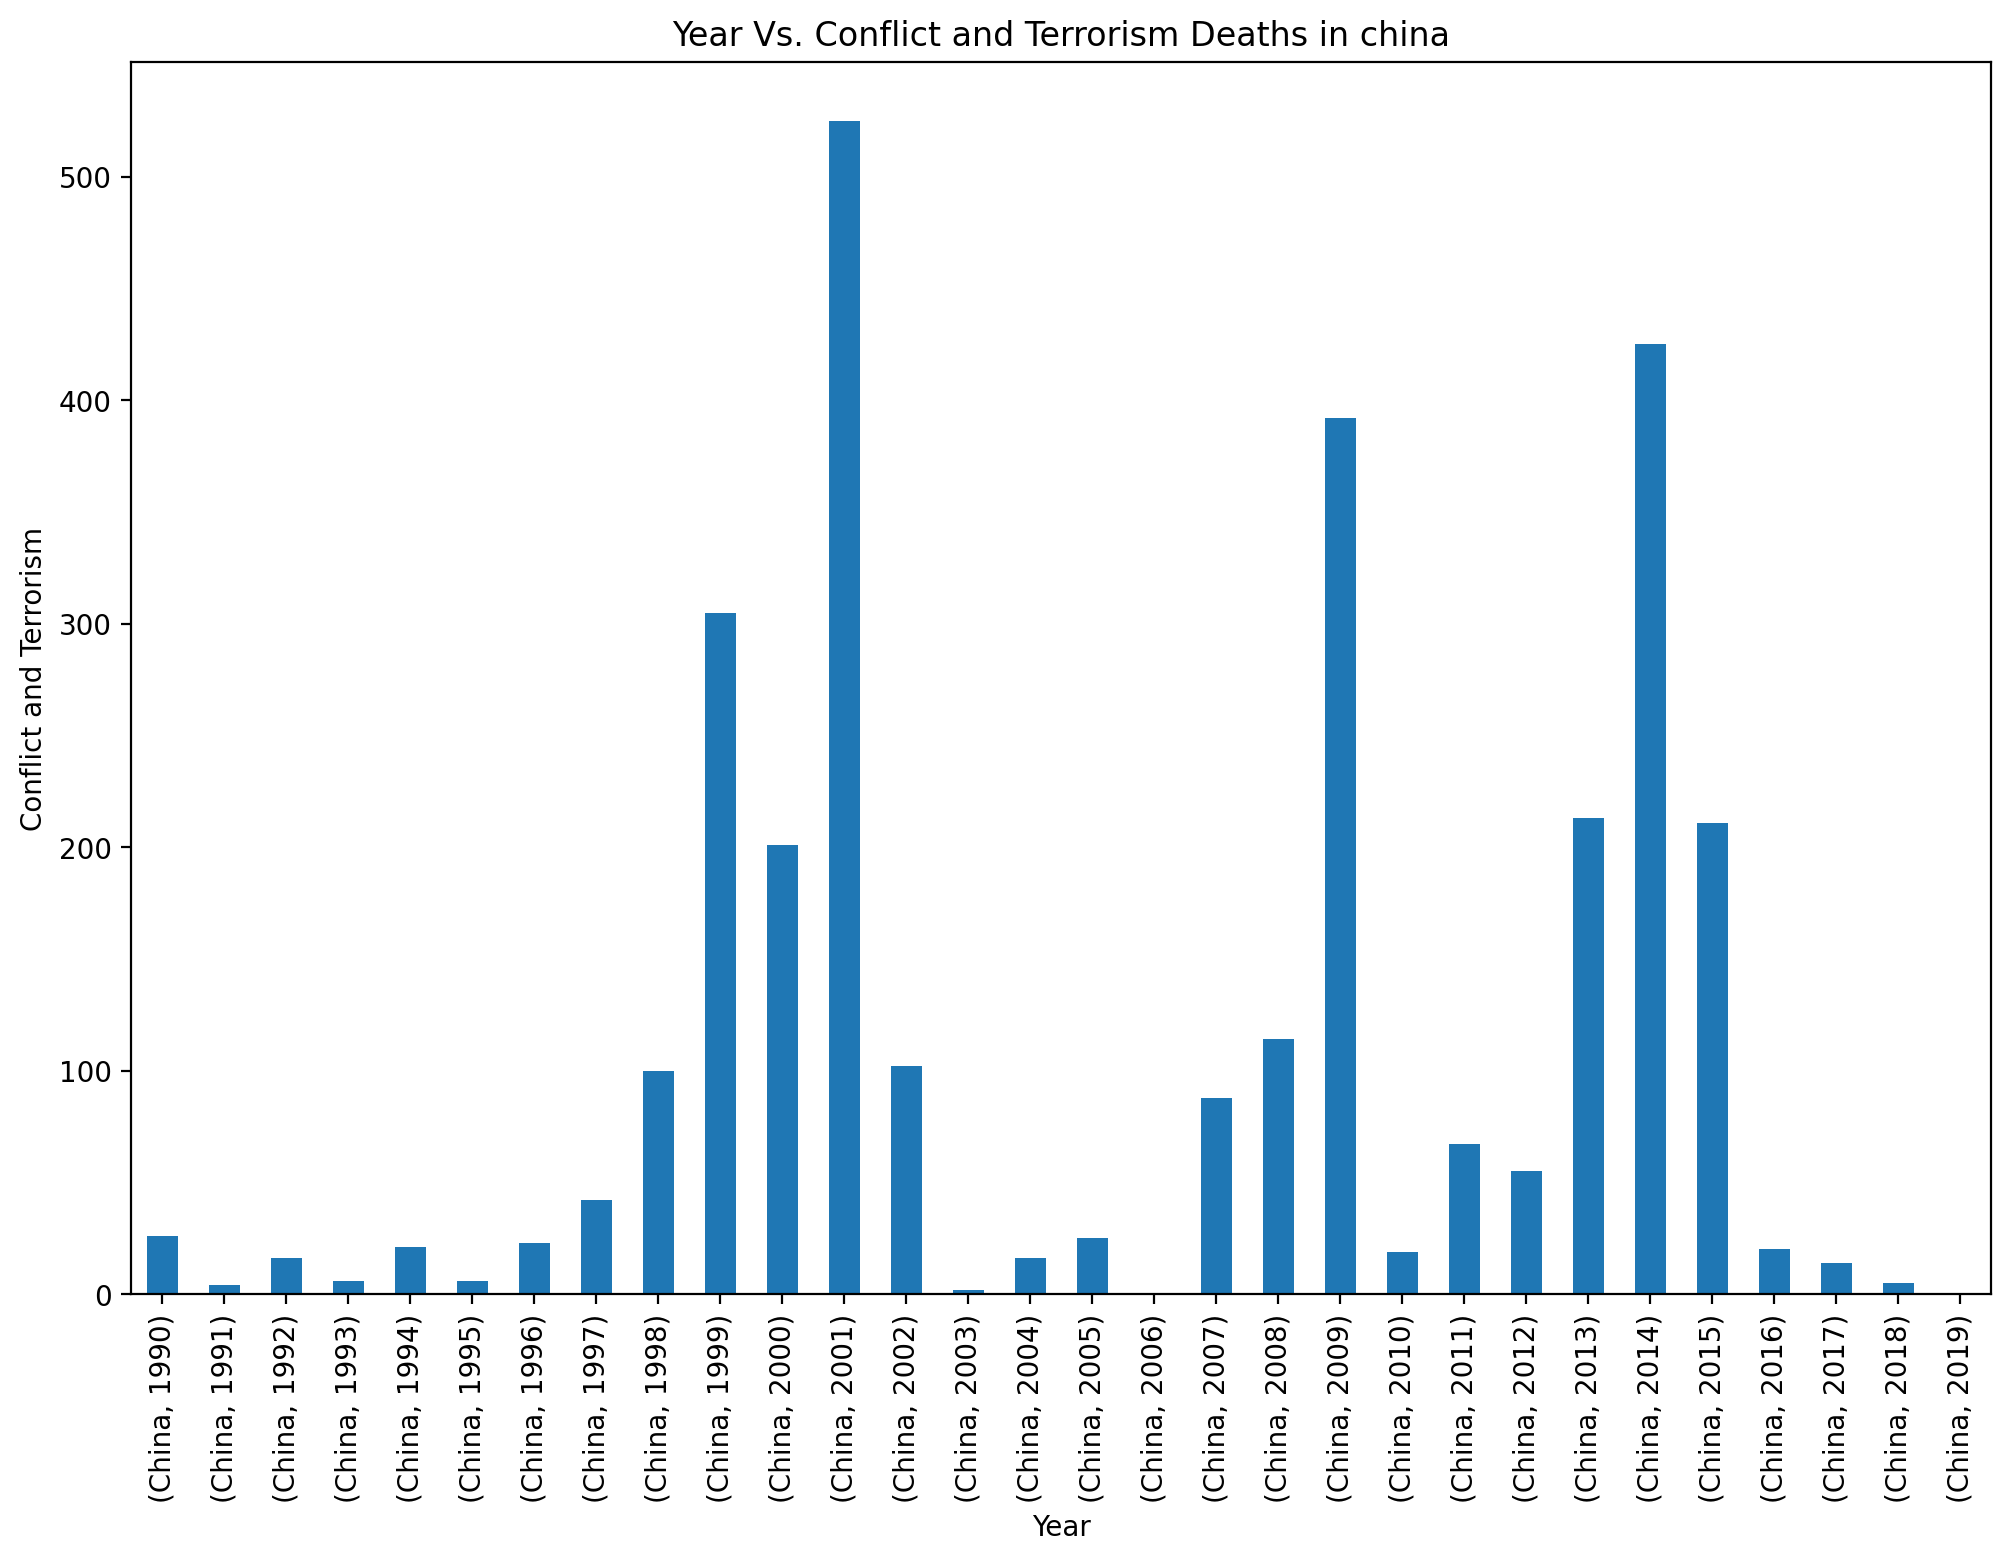

In [30]:
plt.figure(figsize=(12,8), dpi=200)
china_df=China_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Conflict and Terrorism'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Conflict and Terrorism")
plt.title("Year Vs. Conflict and Terrorism Deaths in china")
plt.show()

The terrorist attack of 2014 is at Kunming Railway Station in Kunming, Yunnan, China on March 1st.

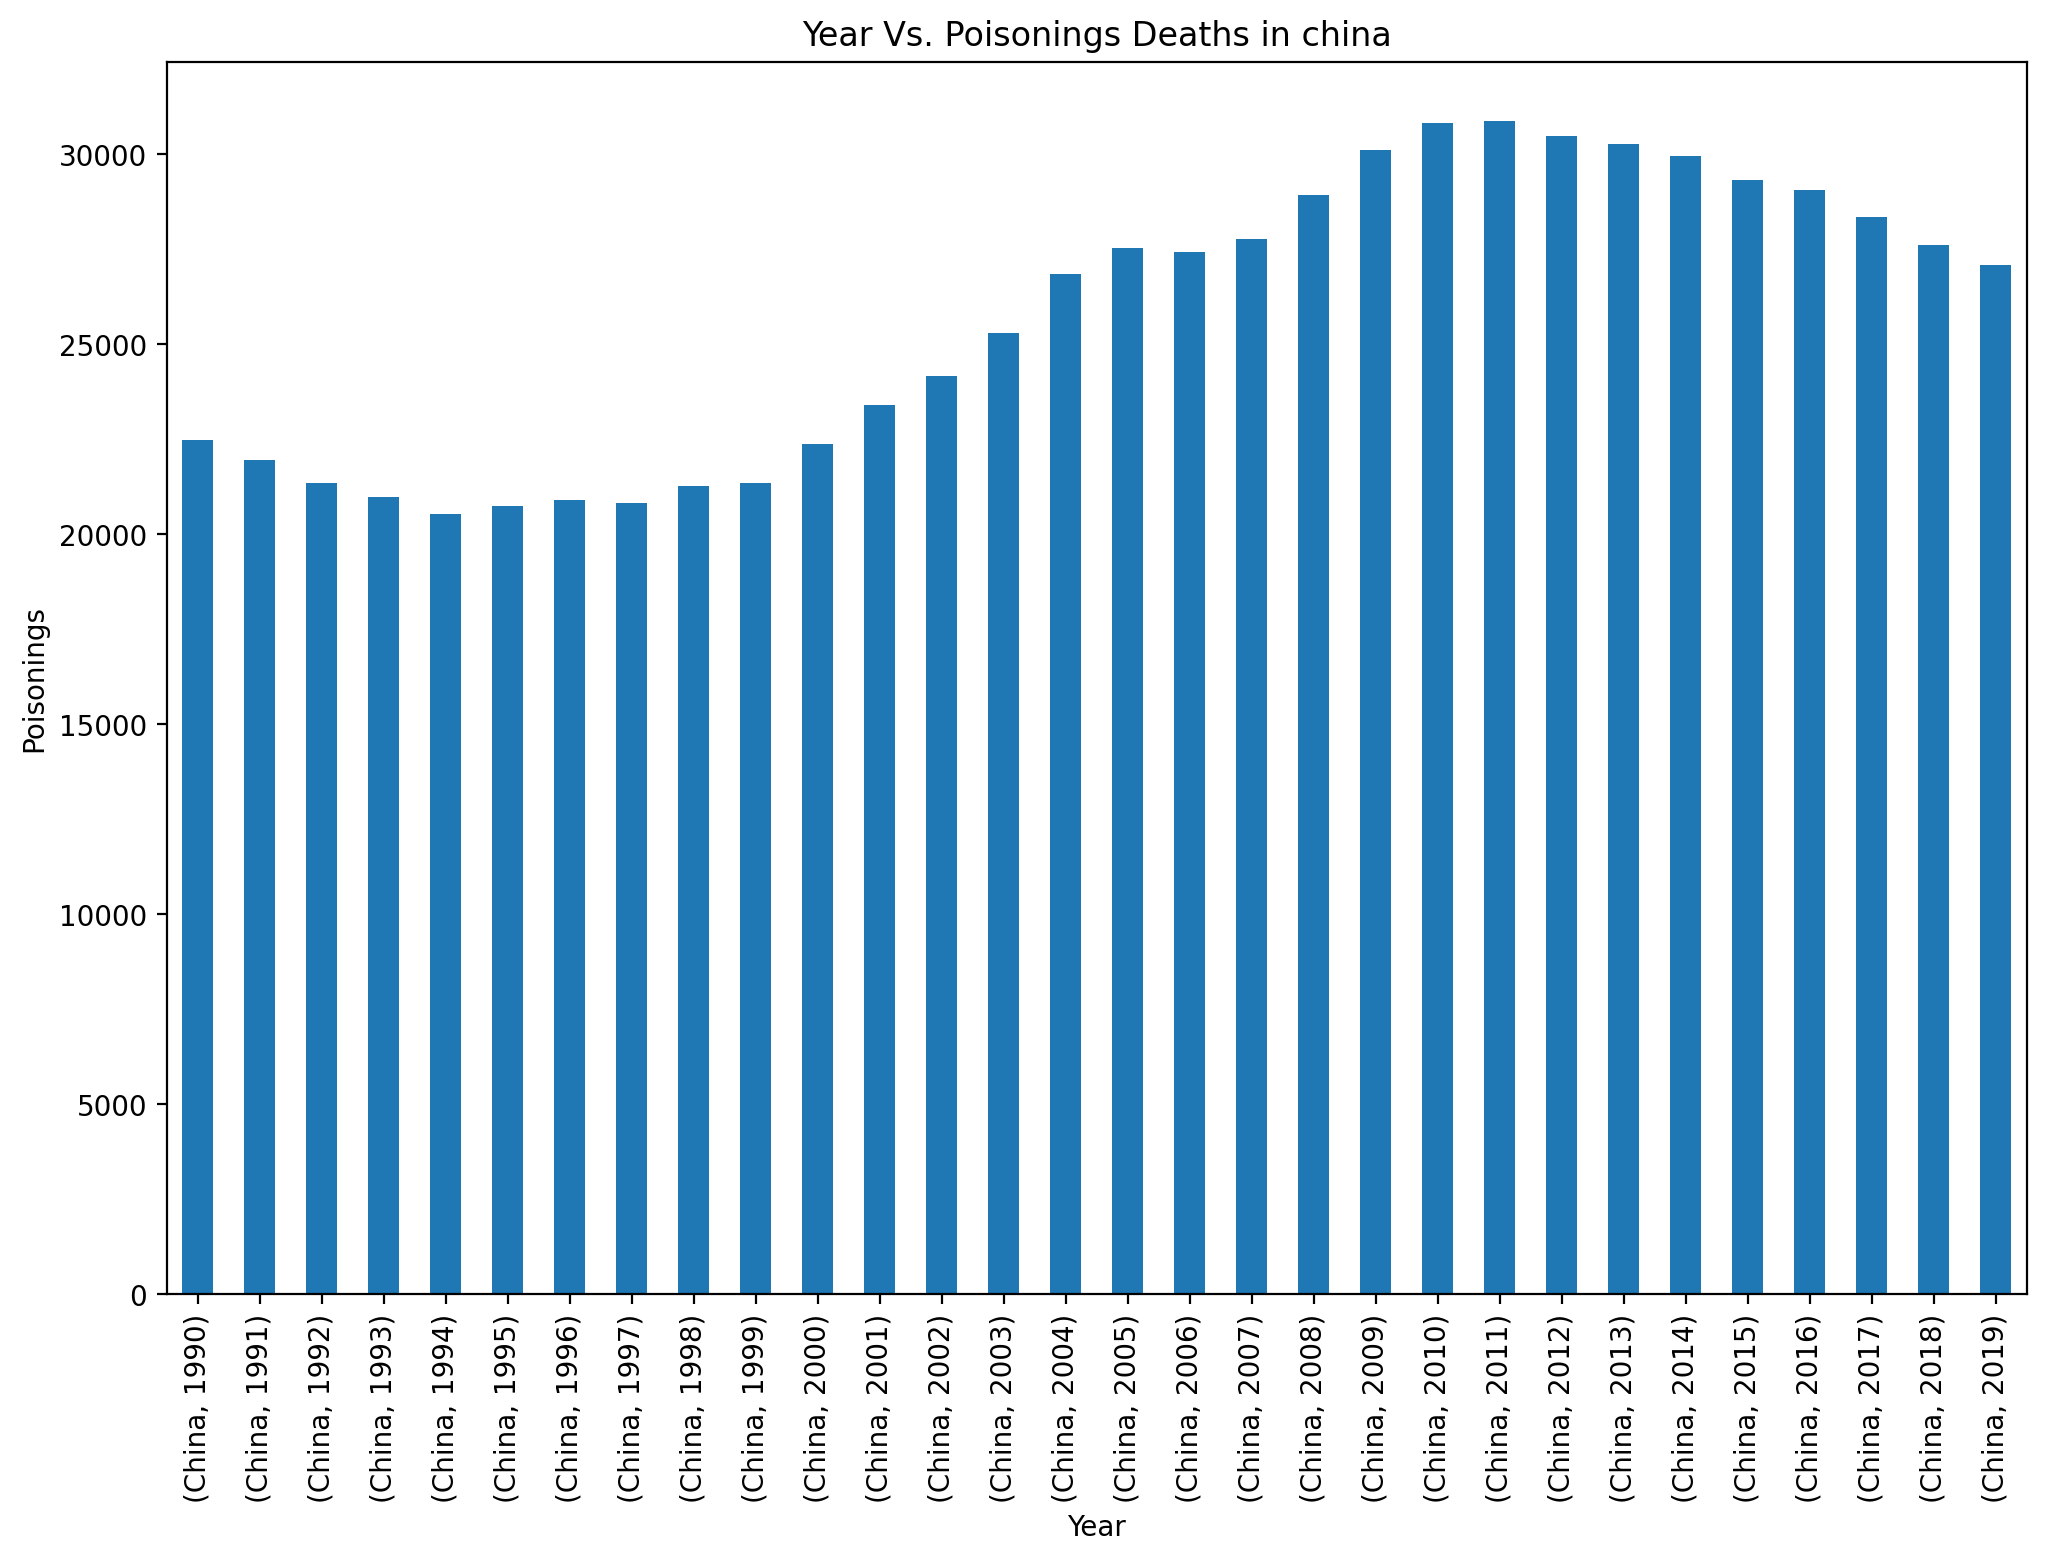

In [31]:
plt.figure(figsize=(12,8), dpi=200)
china_df=China_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Poisonings'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Poisonings")
plt.title("Year Vs. Poisonings Deaths in china")
plt.show()

There is a continual raise in Poisonings Deaths recorded in China after year 1994.

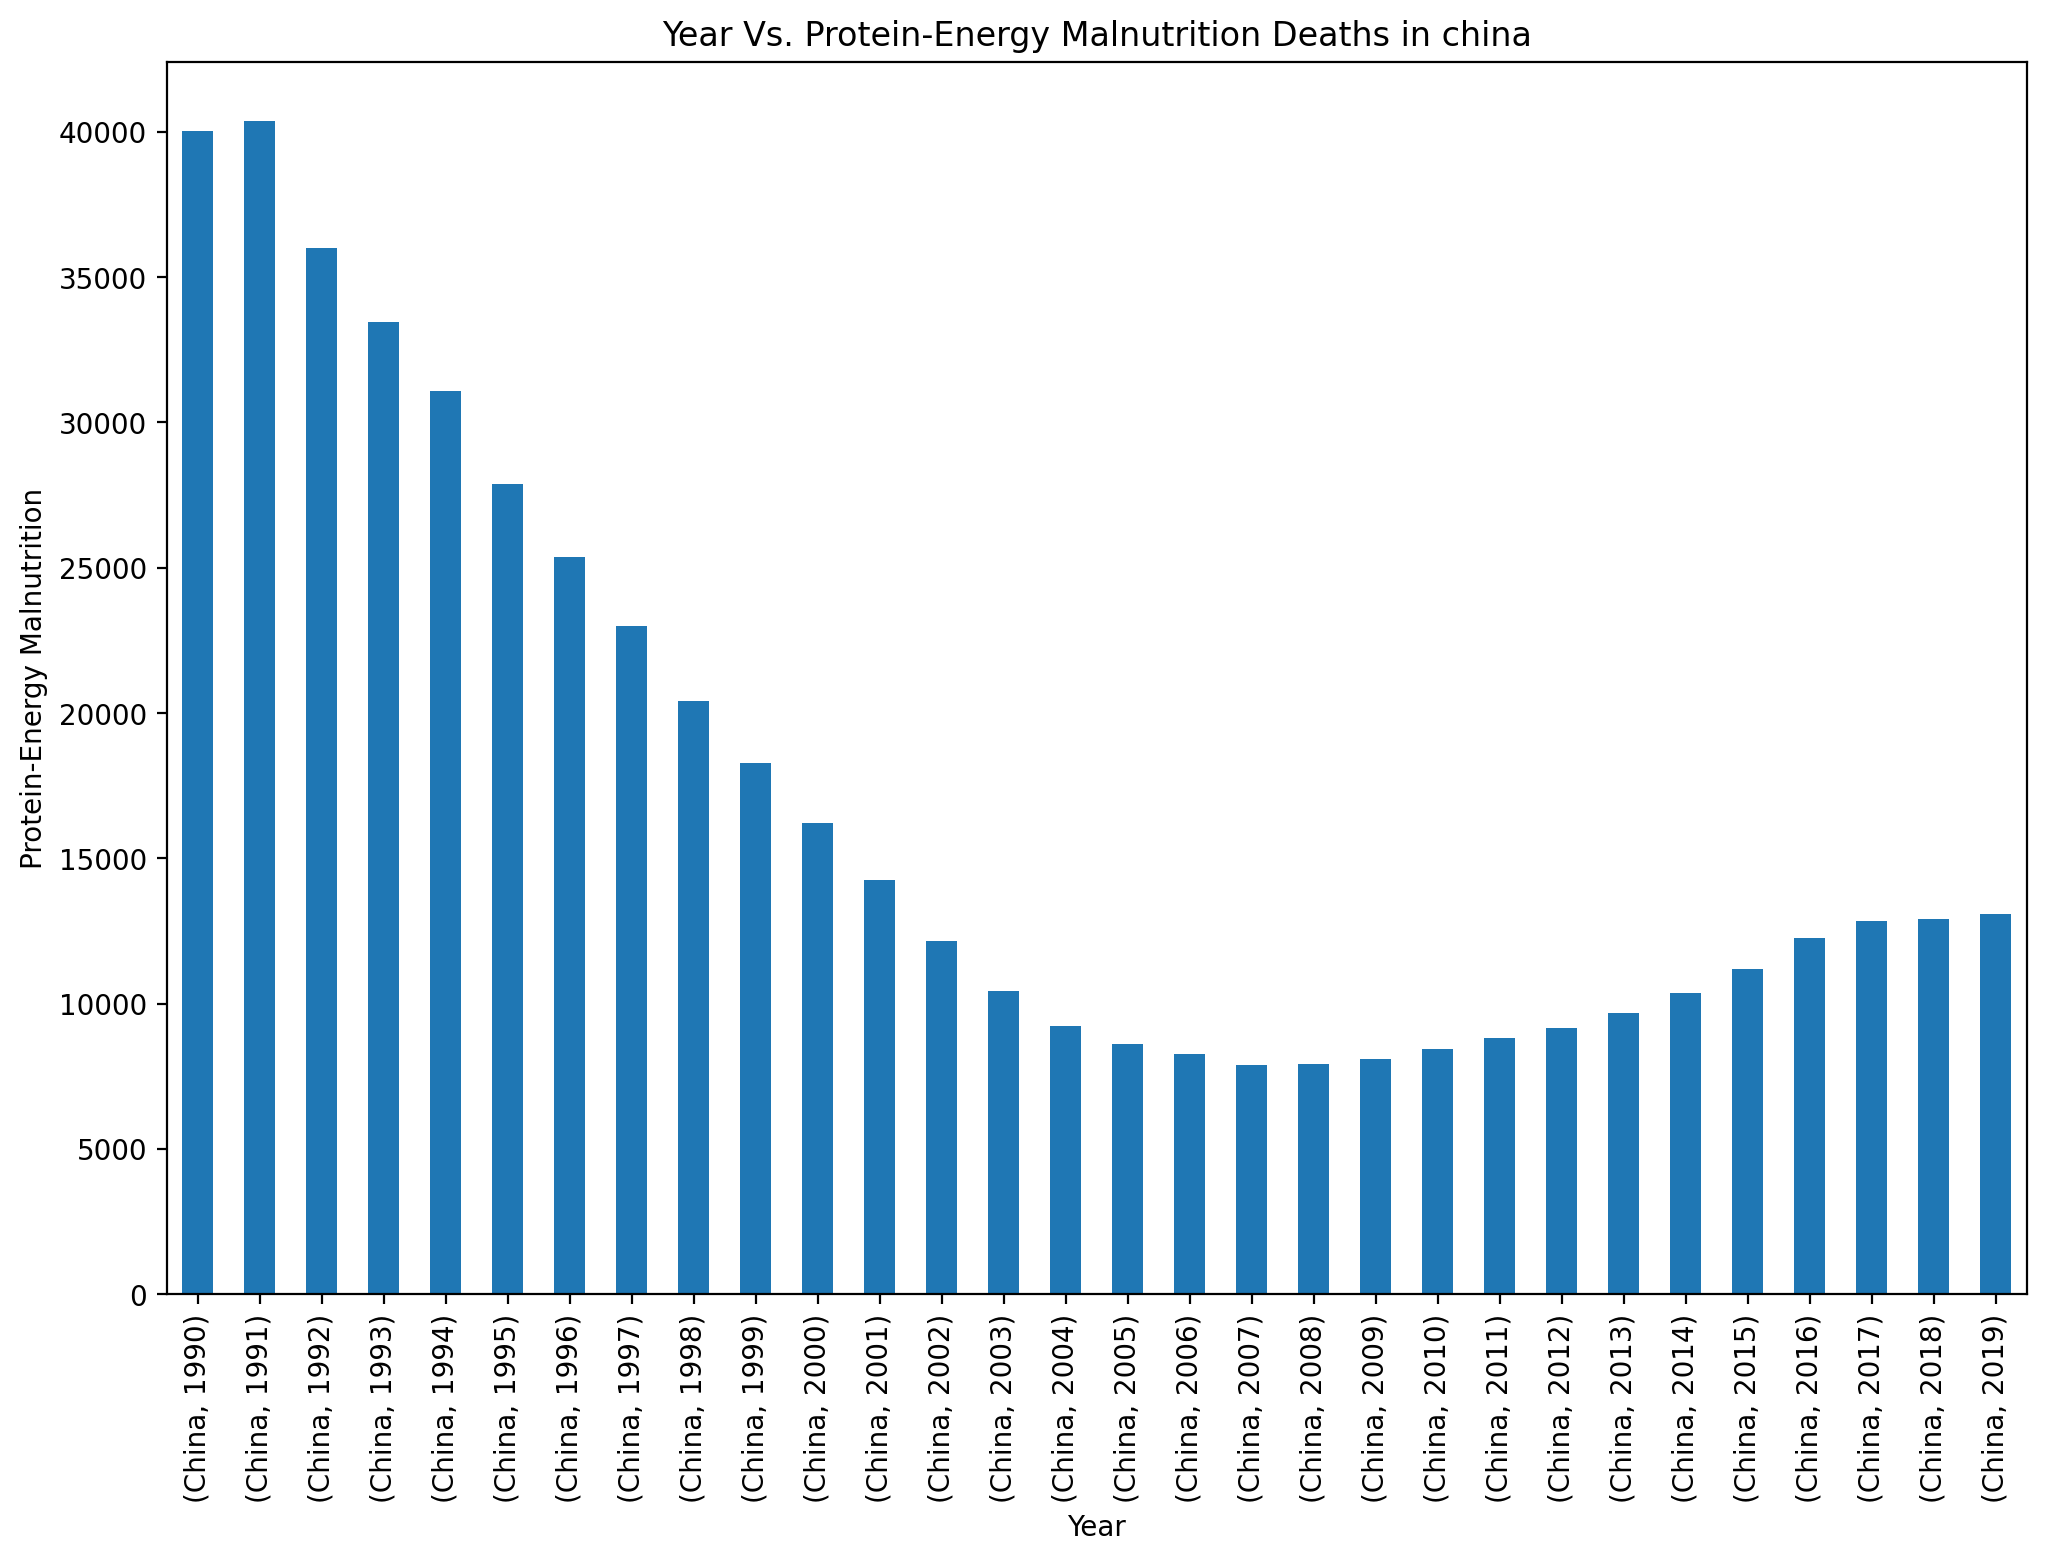

In [32]:
plt.figure(figsize=(12,8), dpi=200)
china_df=China_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Protein-Energy Malnutrition'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Protein-Energy Malnutrition")
plt.title("Year Vs. Protein-Energy Malnutrition Deaths in china")
plt.show()

There is a continual raise in Protein-Energy Malnutrition Deaths recorded in China after year 2007

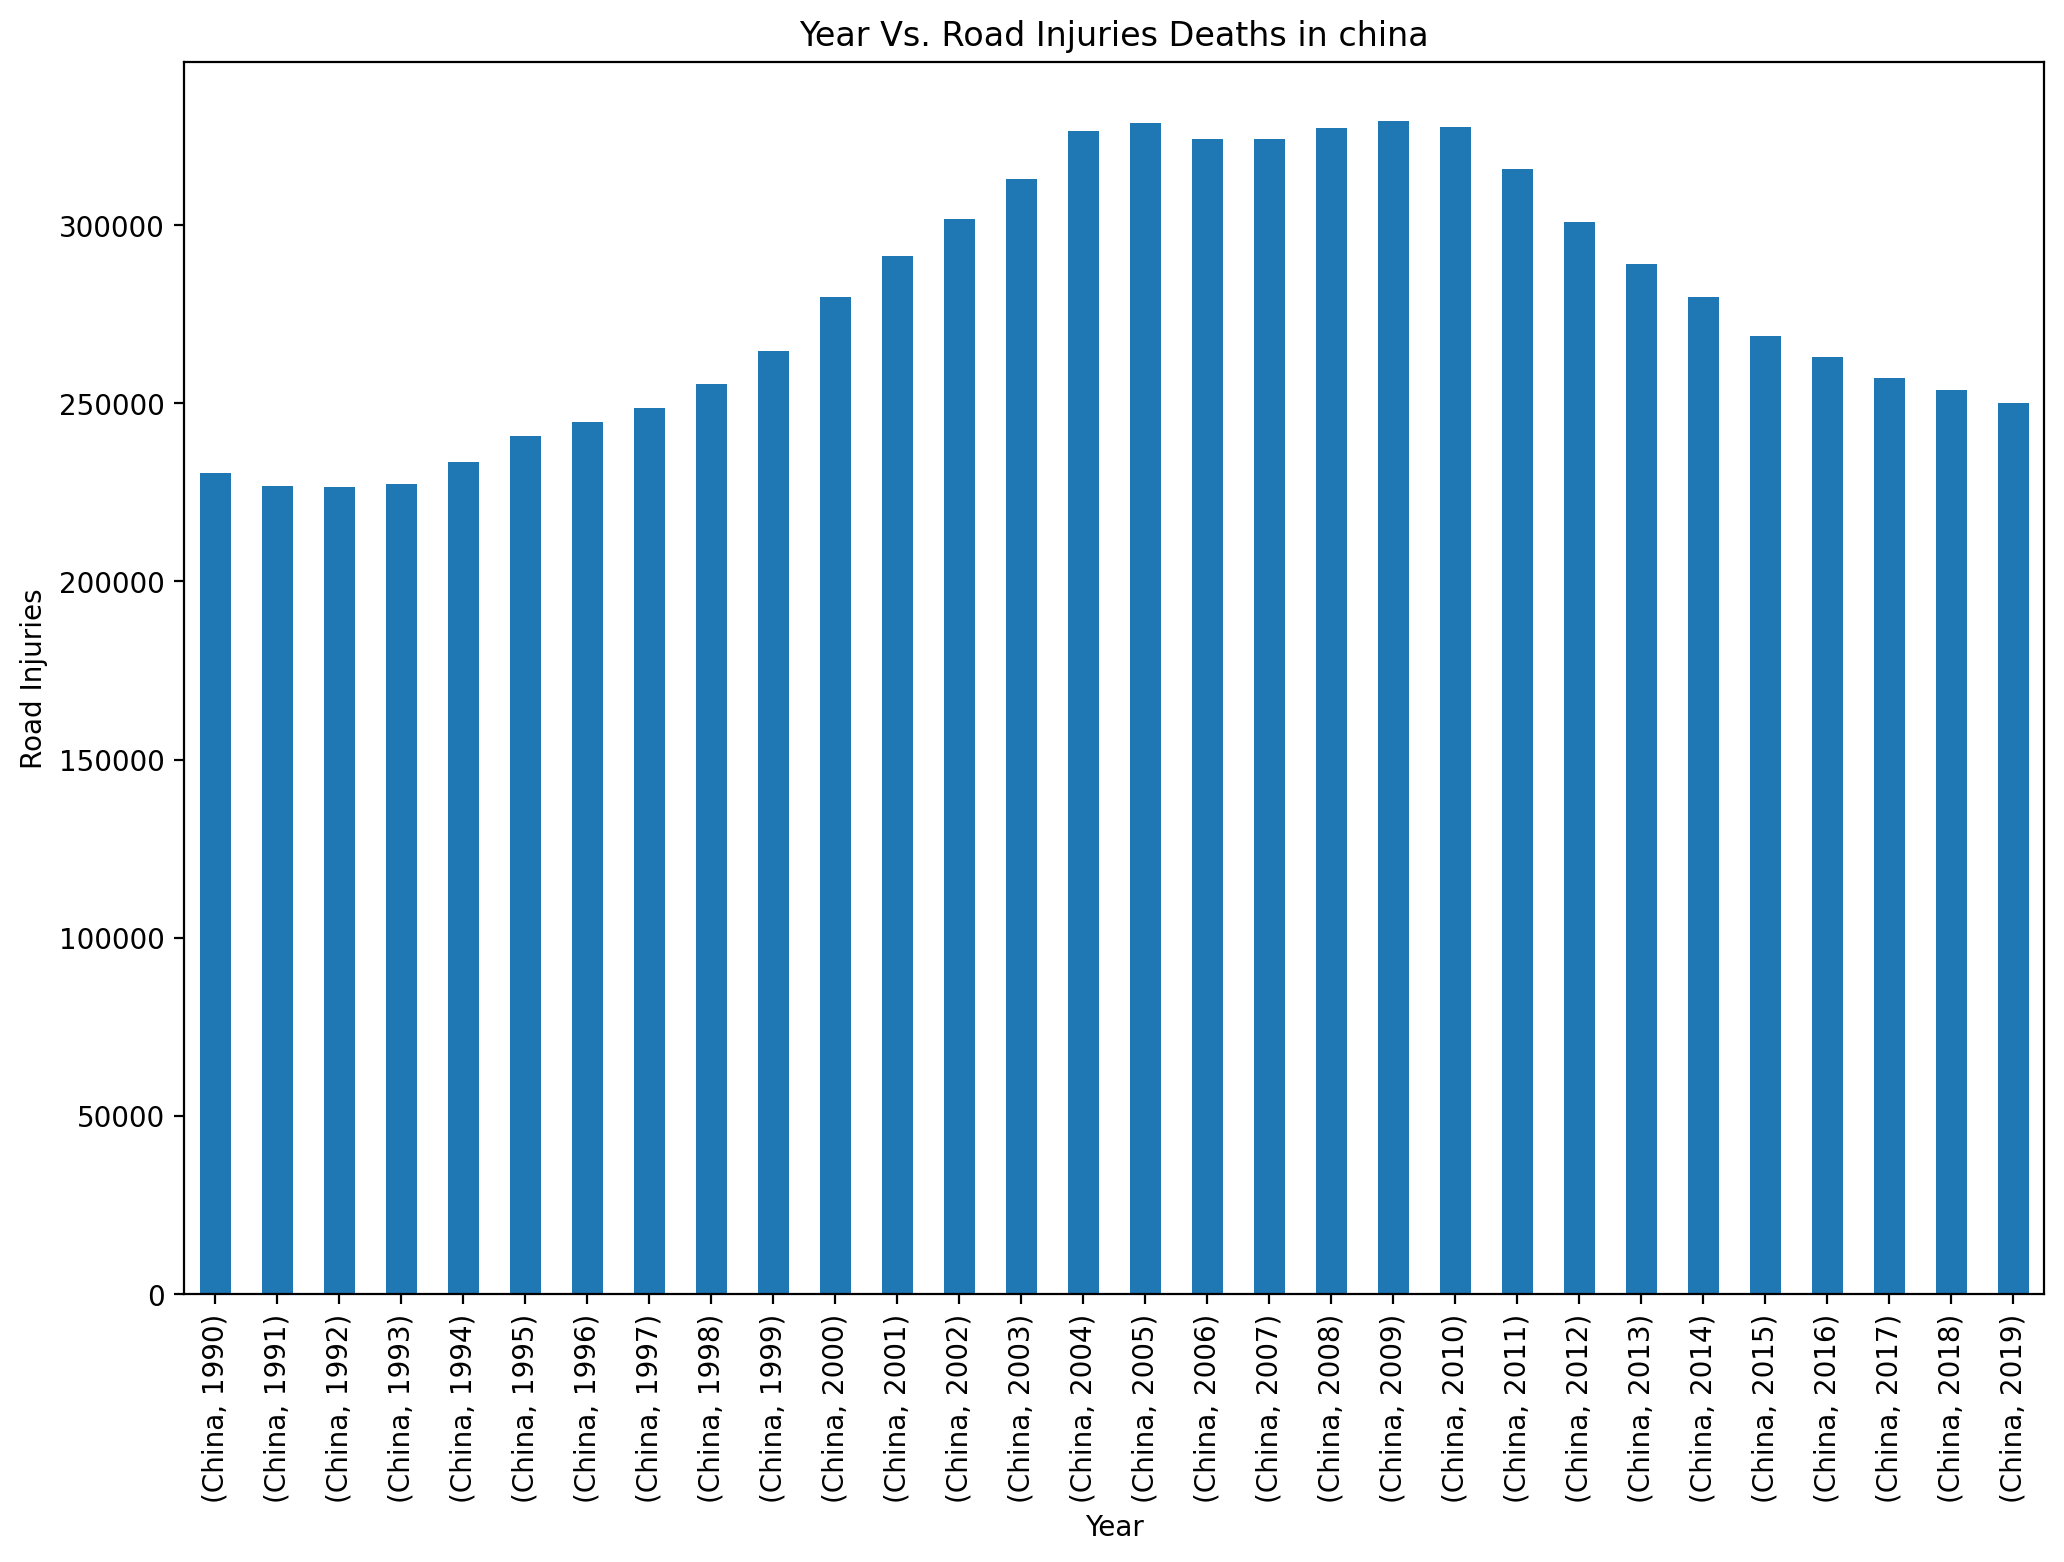

In [33]:
plt.figure(figsize=(12,8), dpi=200)
china_df=China_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Road Injuries'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Road Injuries")
plt.title("Year Vs. Road Injuries Deaths in china")
plt.show()

There is a continual drop in Road Injuries Deaths recorded in China after year 2009.

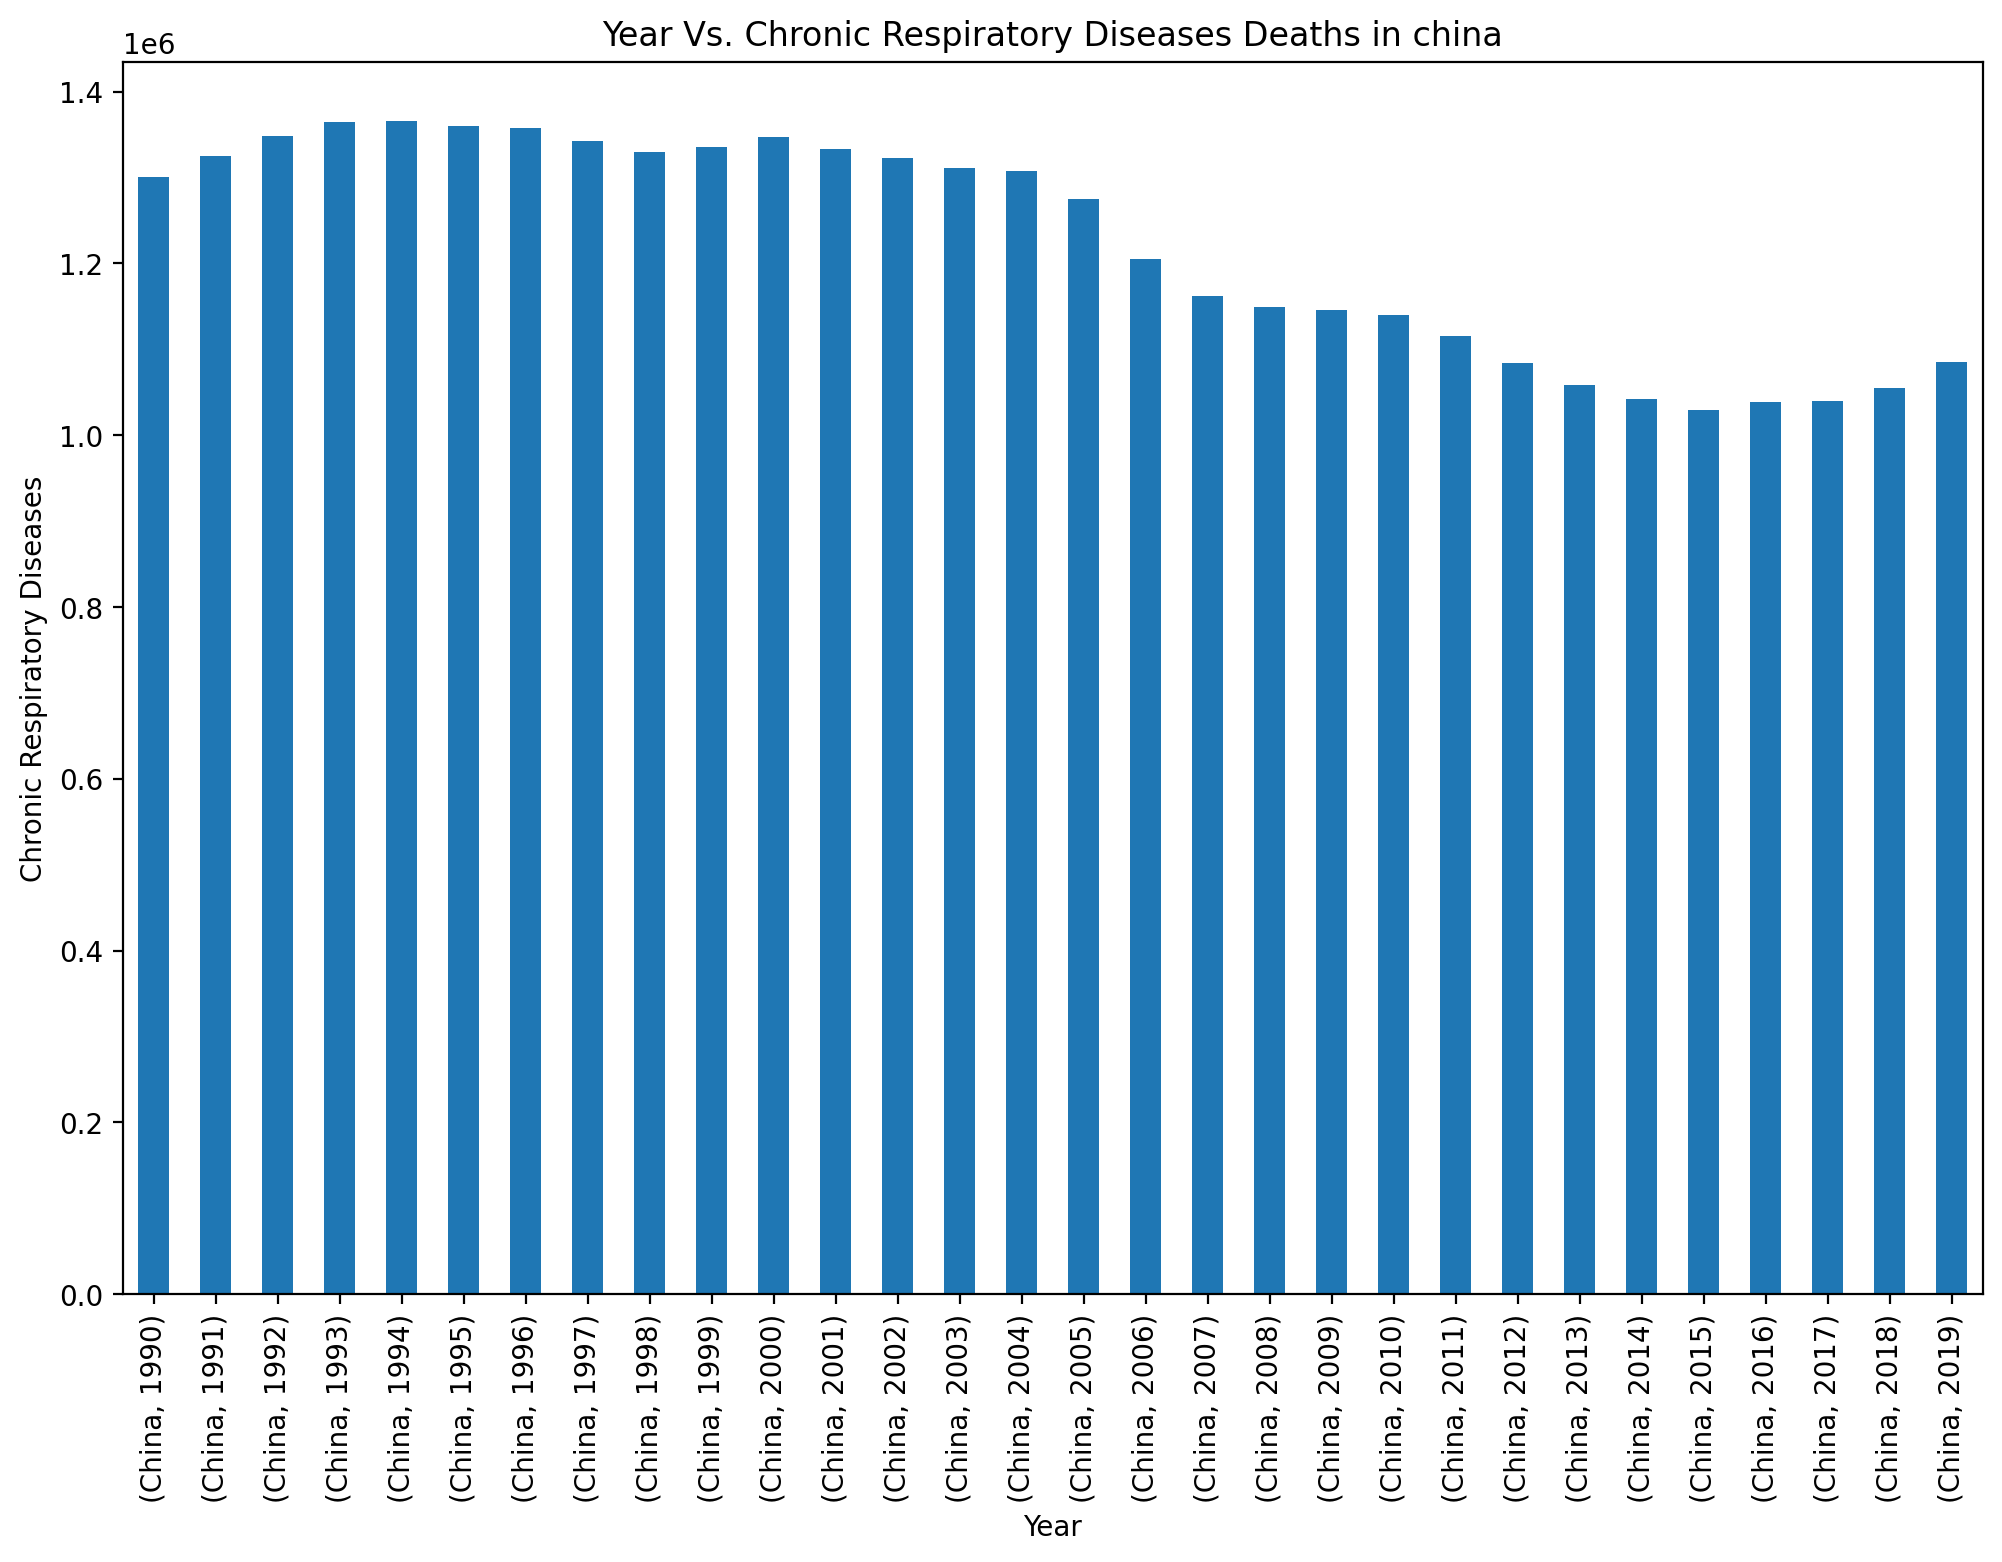

In [34]:
plt.figure(figsize=(12,8), dpi=200)
china_df=China_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Chronic Respiratory Diseases'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Chronic Respiratory Diseases")
plt.title("Year Vs. Chronic Respiratory Diseases Deaths in china")
plt.show()

There is a continual drop in Chronic Respiratory Diseases Deaths recorded in China after year 2004.

In [35]:
#India-"Total_no_of_Deaths" against "Year"
India_Total_no_of_Deaths_df=df[df['Country/Territory']=='India'].sort_values(by='Total_no_of_Deaths',ascending=False)

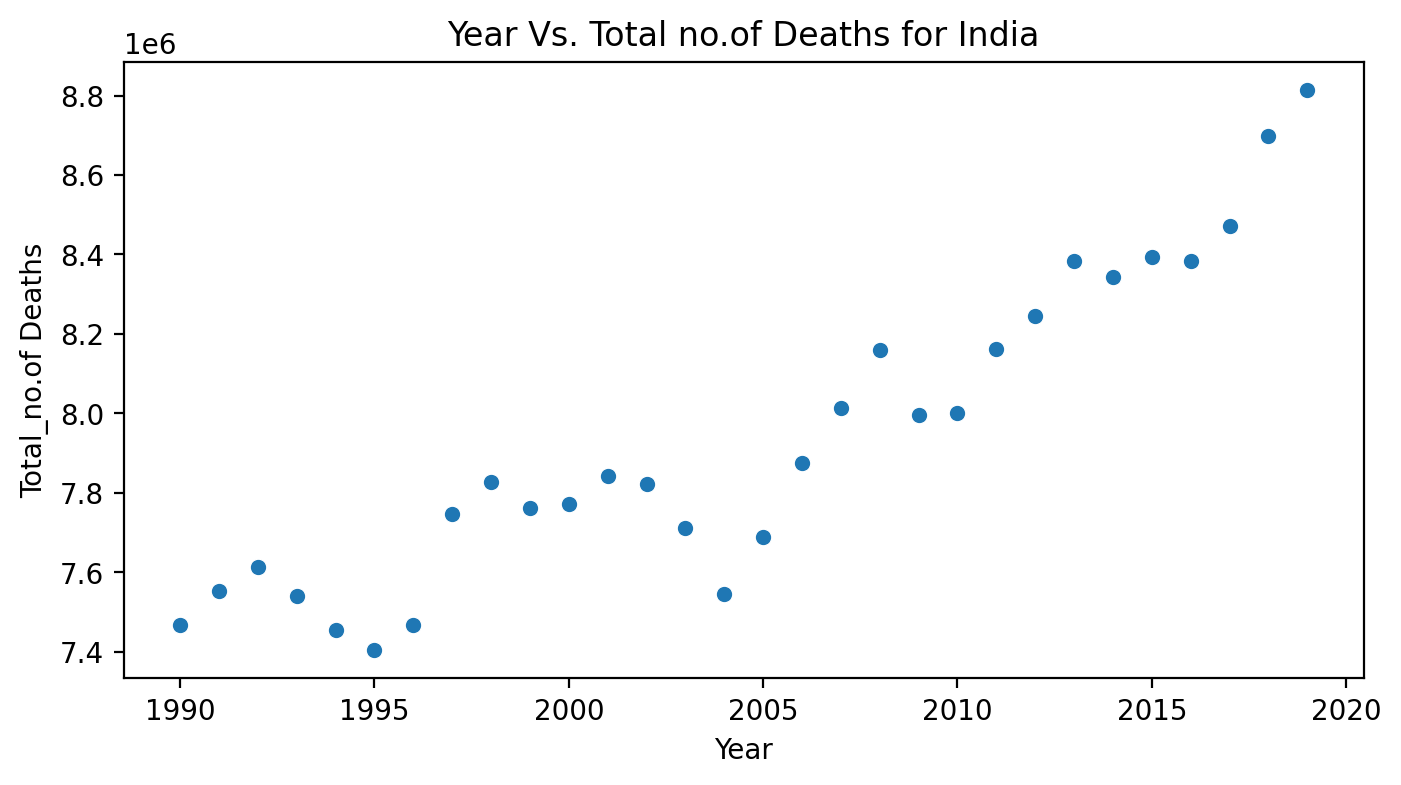

In [36]:
#India-"Total_no_of_Deaths" against "Year"
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=India_Total_no_of_Deaths_df, x='Year', y='Total_no_of_Deaths')
plt.xlabel("Year")
plt.ylabel("Total_no.of Deaths")
plt.title("Year Vs. Total no.of Deaths for India")
plt.show()

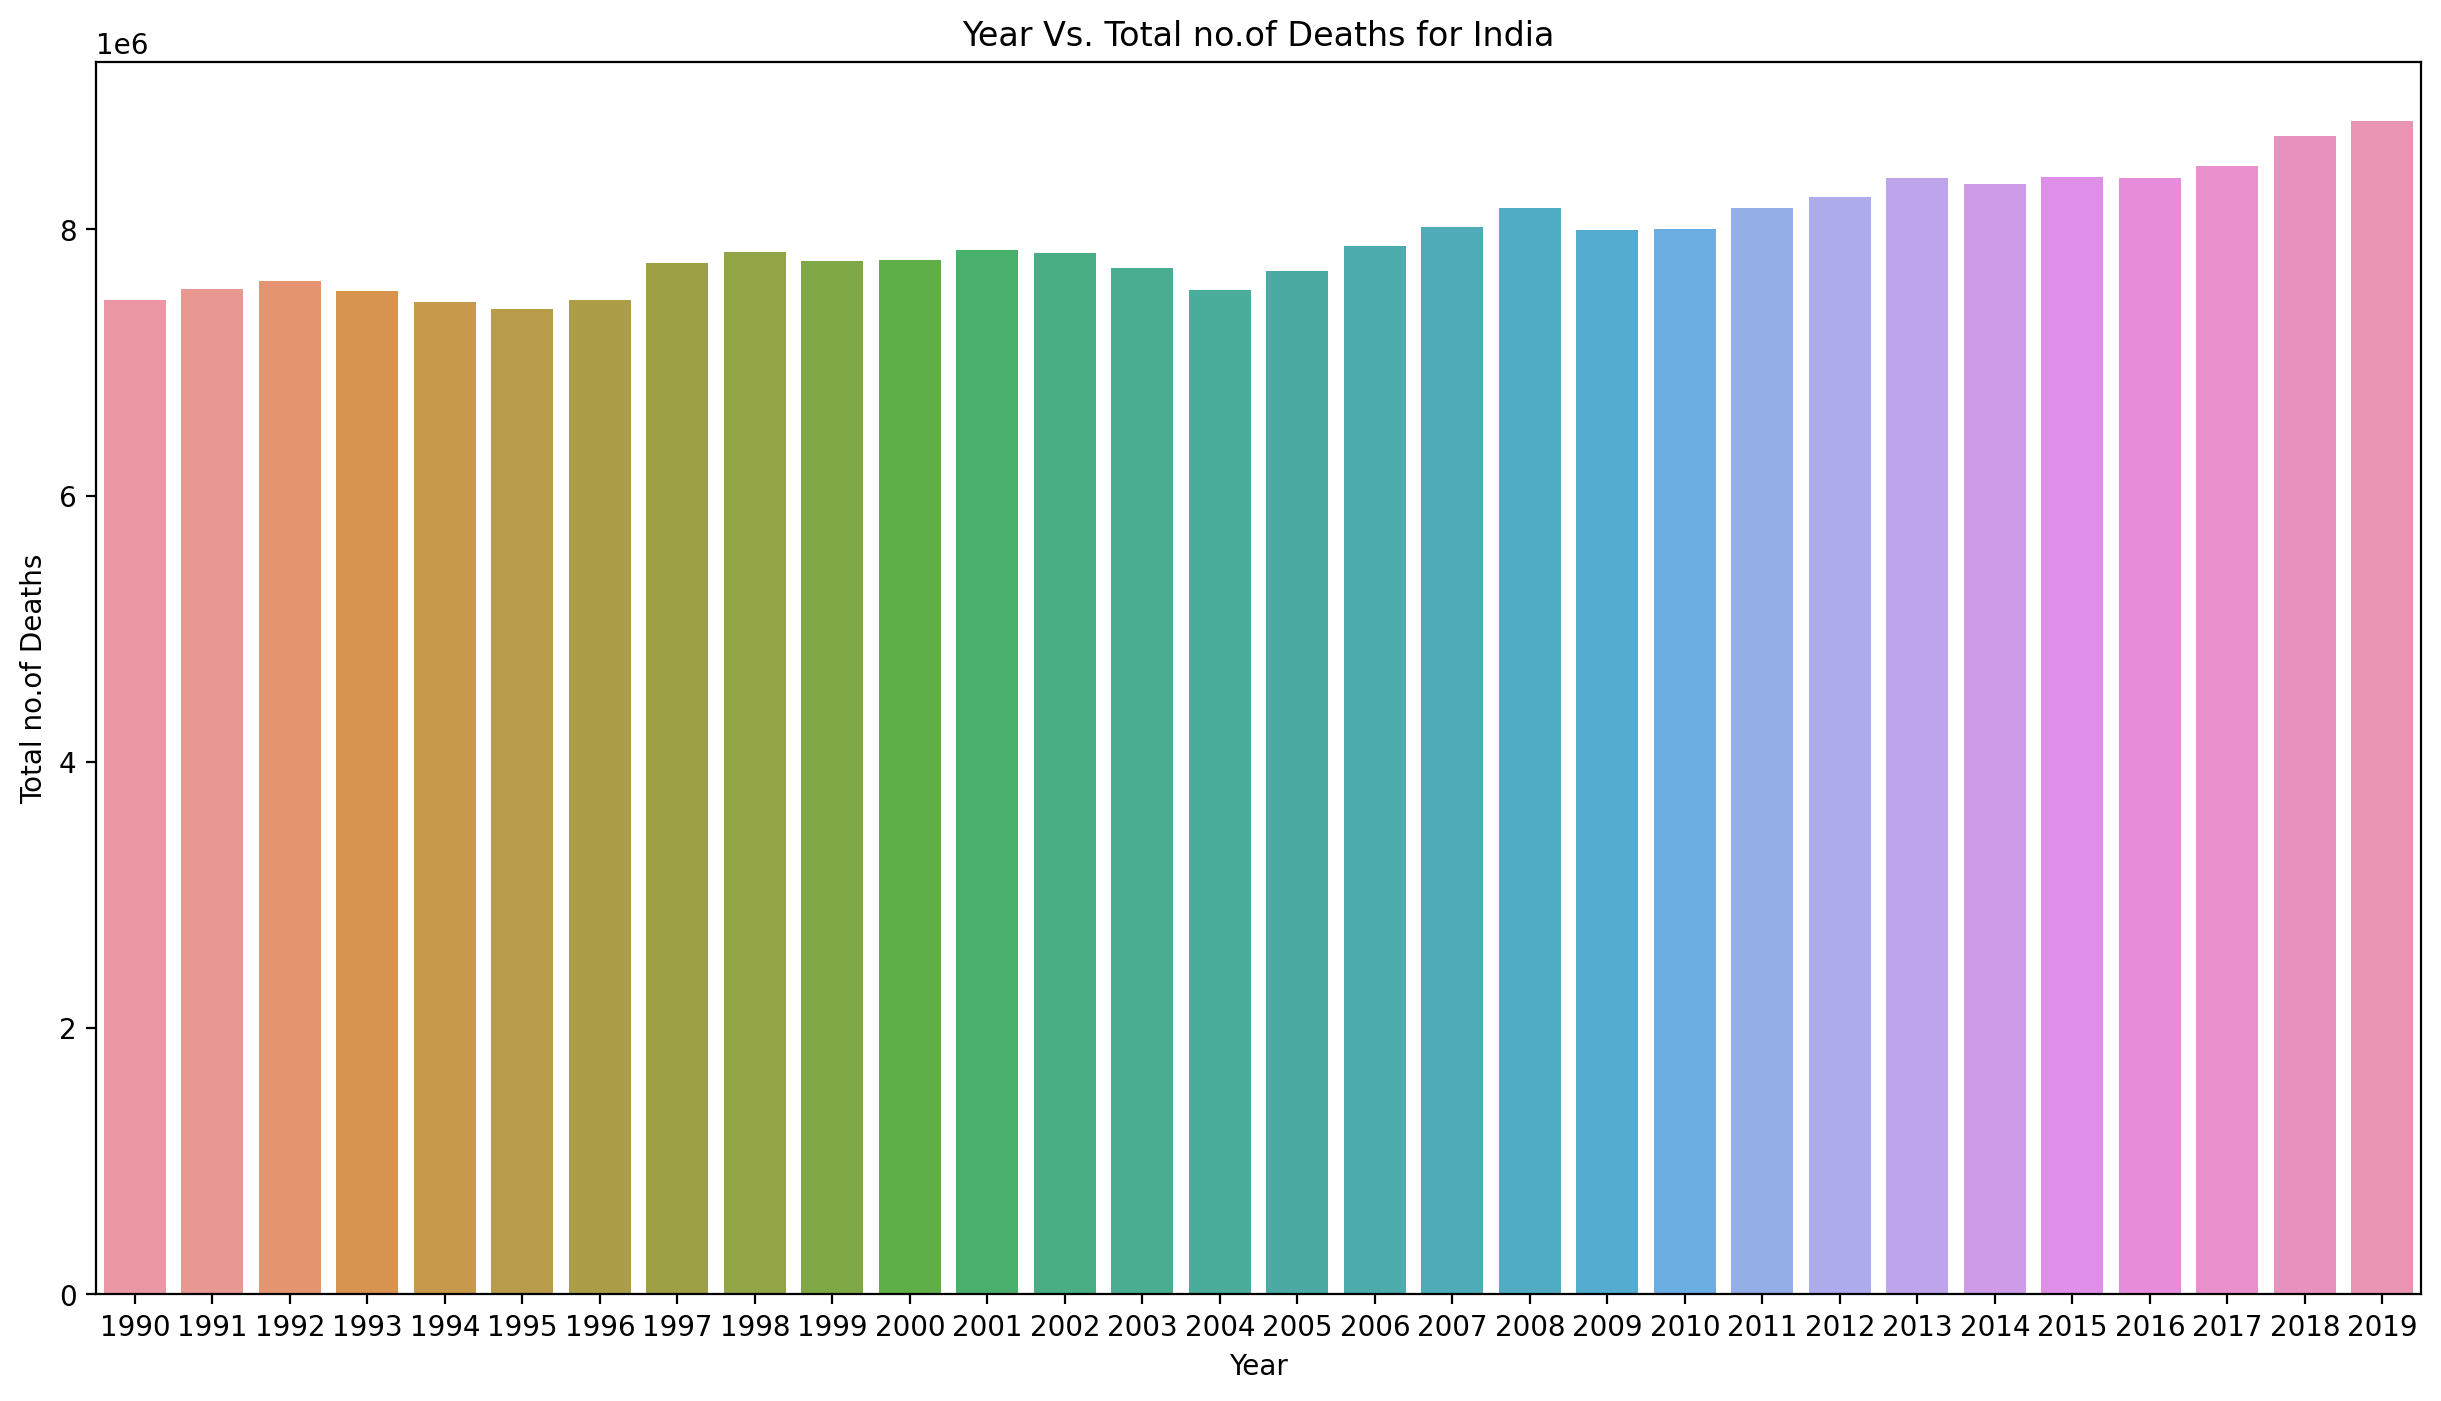

In [37]:
plt.figure(figsize=(15,8), dpi=200)
sns.barplot(data=India_Total_no_of_Deaths_df, x='Year', y='Total_no_of_Deaths')
plt.xlabel("Year")
plt.ylabel("Total no.of Deaths")
plt.title("Year Vs. Total no.of Deaths for India")
plt.show()

Overall there is a raise in Total No. of Deaths recorded with each year for India, even though there are fluctuations in between

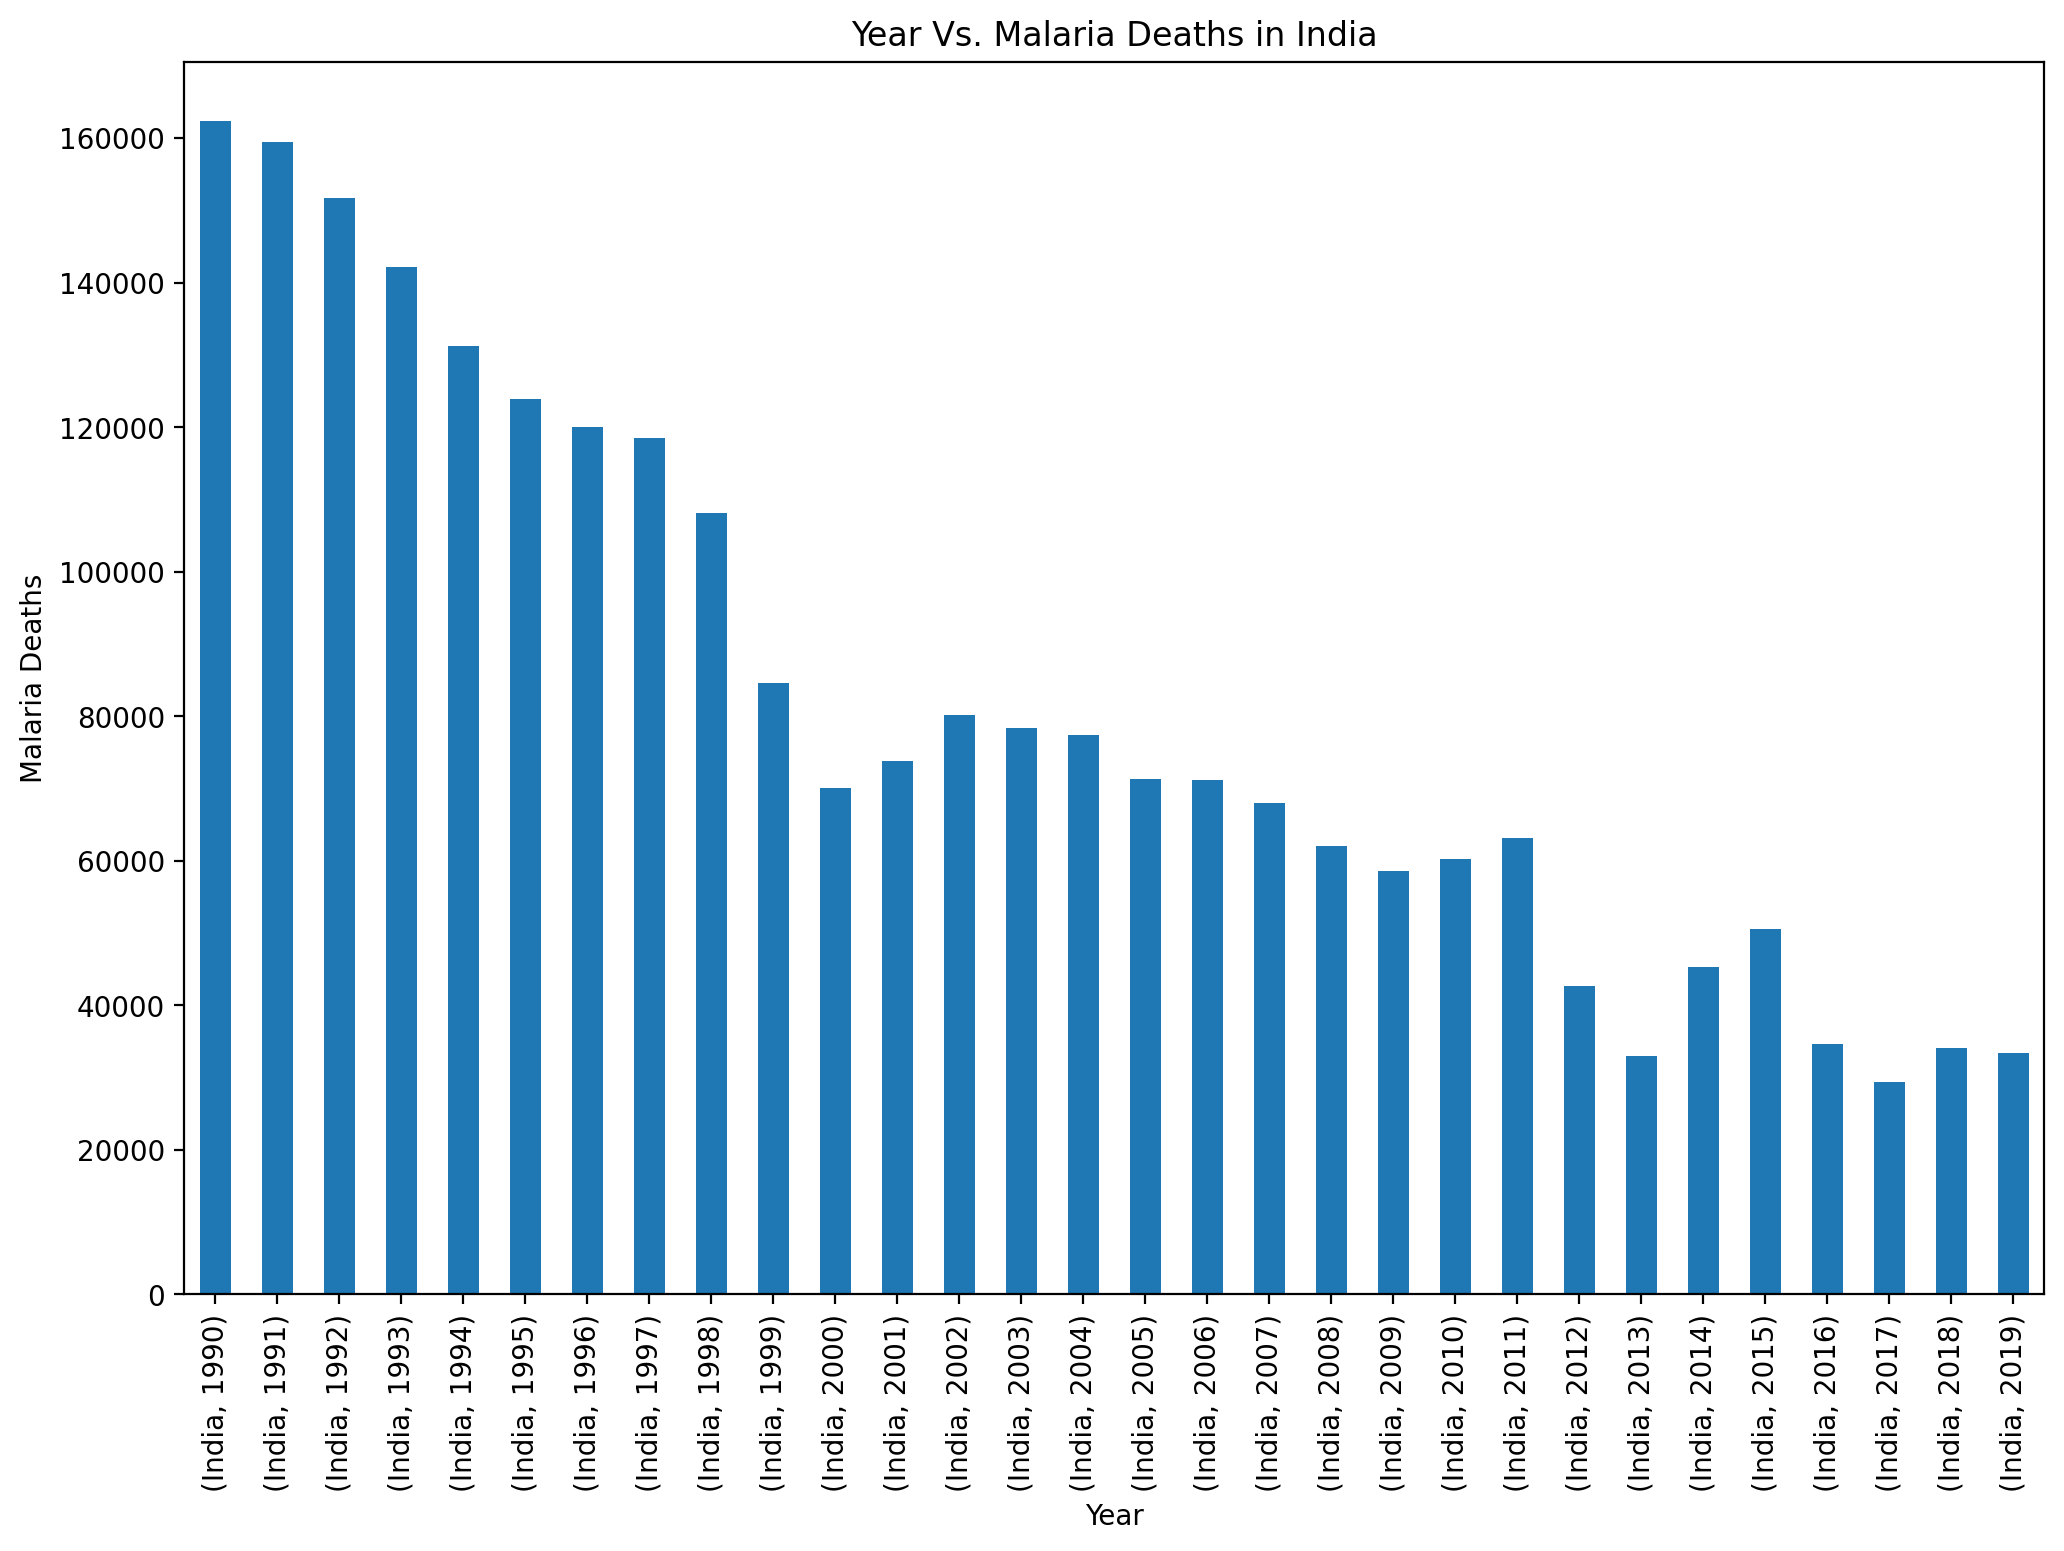

In [38]:
plt.figure(figsize=(12,8), dpi=200)
china_df=India_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Malaria'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Malaria Deaths")
plt.title("Year Vs. Malaria Deaths in India")
plt.show()

There is a rapid drop in Malaria Deaths recorded in India from 1990, but the Deaths in 2018 and 2019 is greater than that of 2016 and 2017.

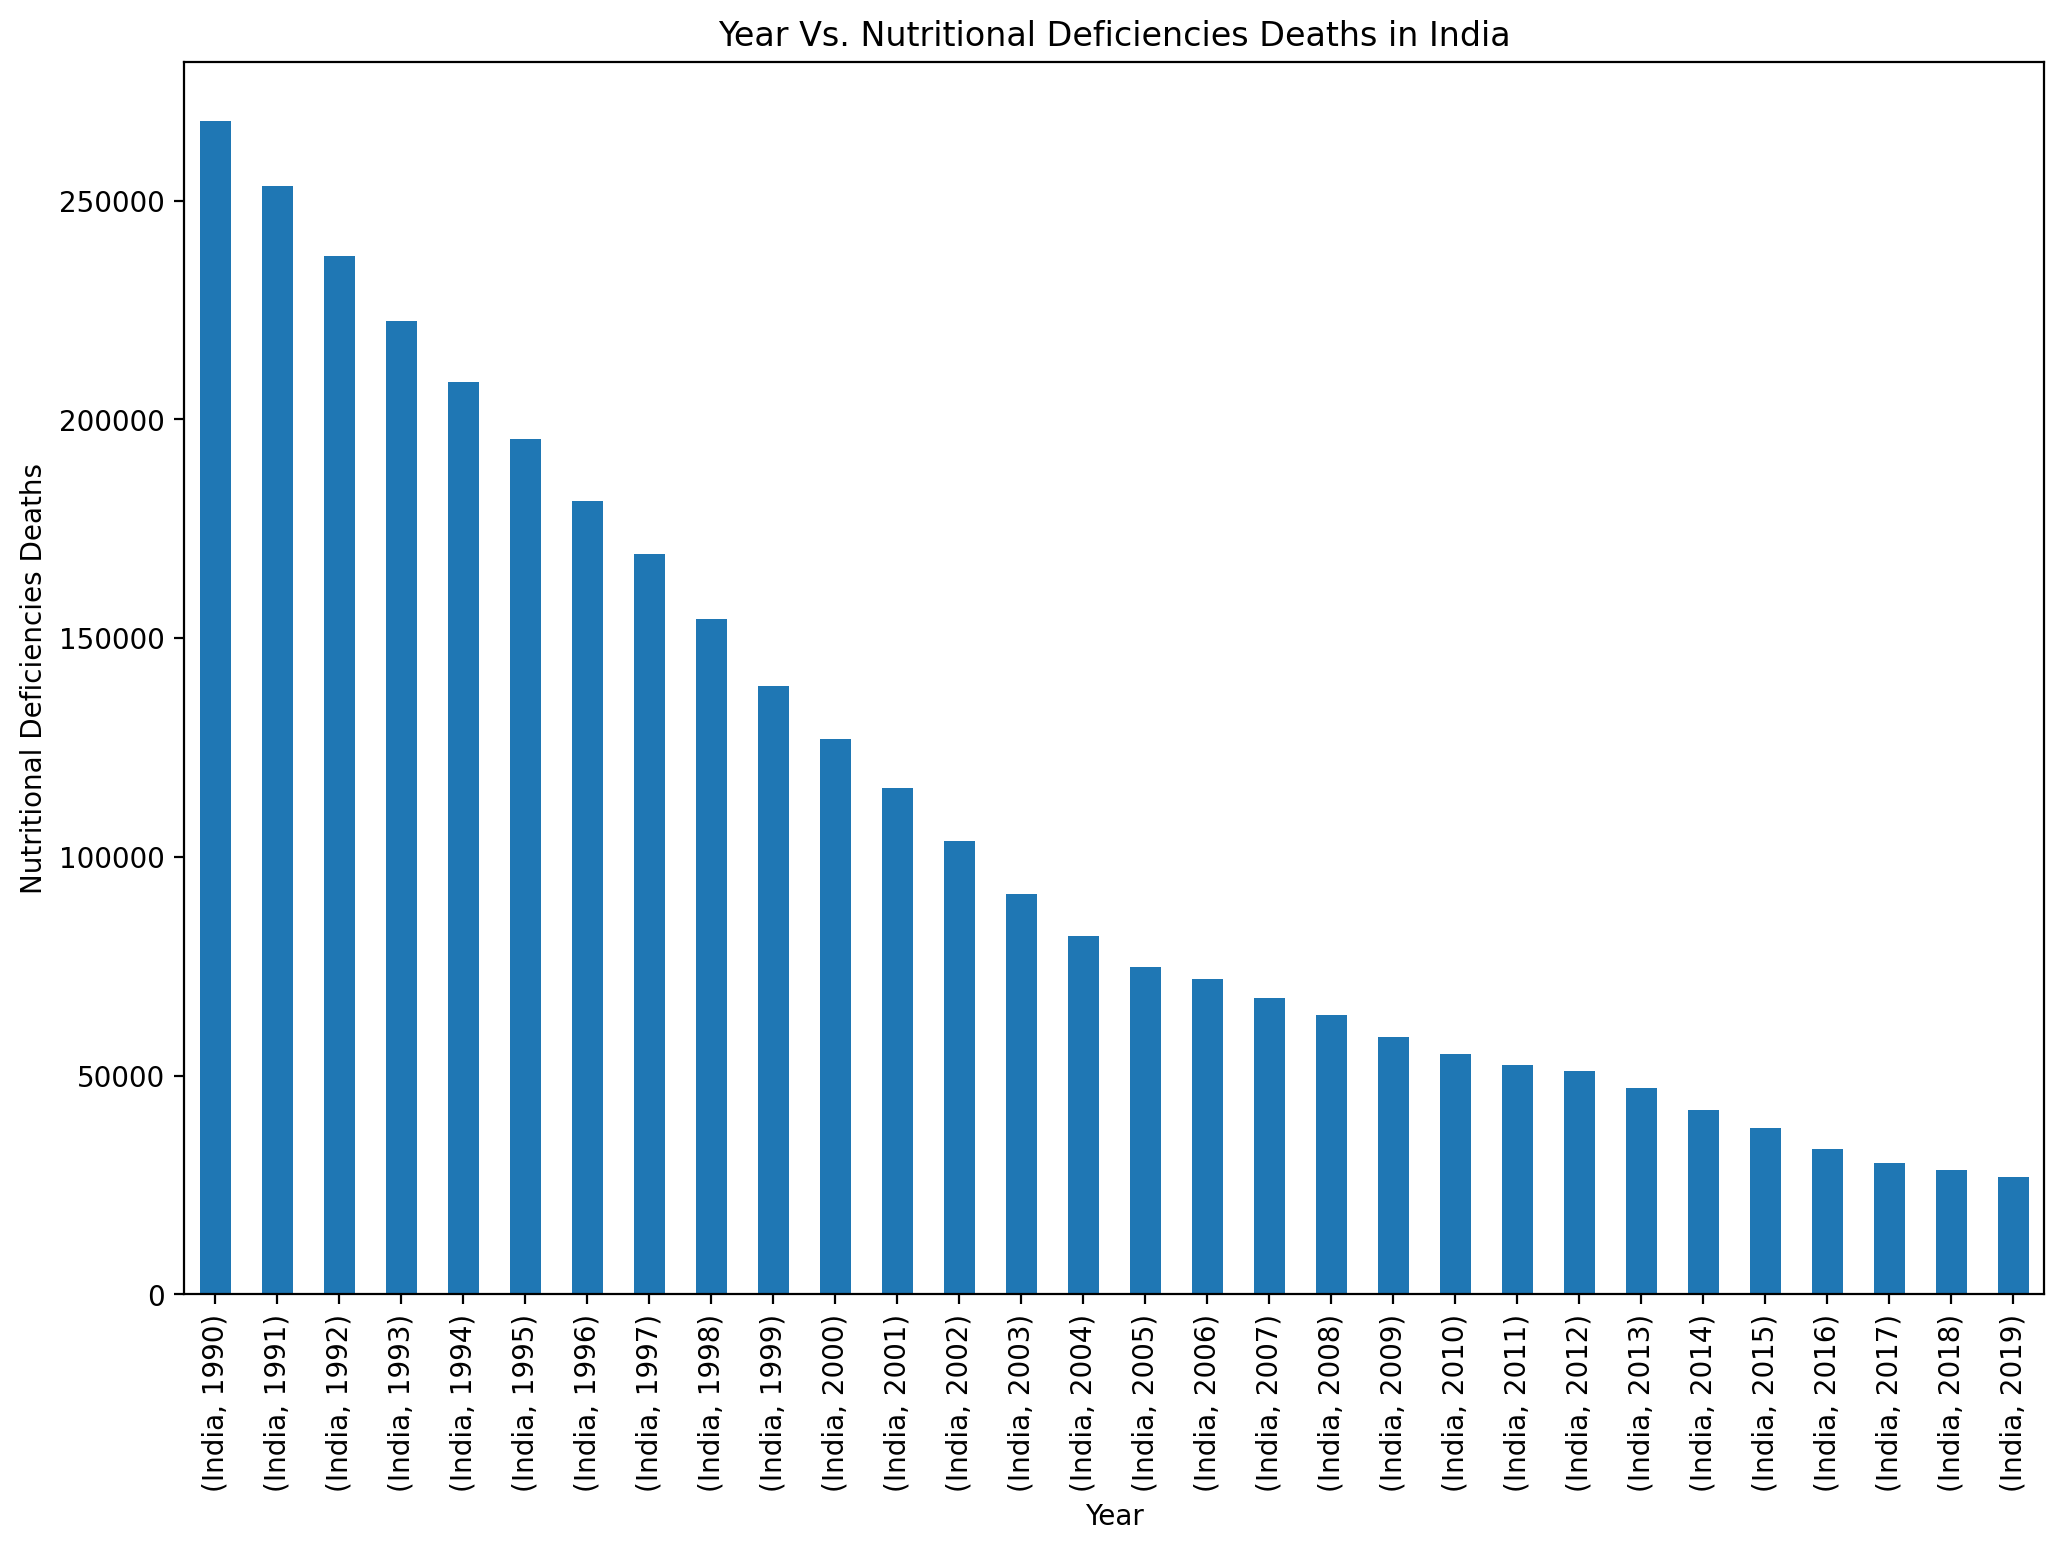

In [39]:
plt.figure(figsize=(12,8), dpi=200)
china_df=India_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Nutritional Deficiencies'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Nutritional Deficiencies Deaths")
plt.title("Year Vs. Nutritional Deficiencies Deaths in India")
plt.show()

There is a continual drop in Nutritional Deficiencies Deaths recorded in India from 1990.

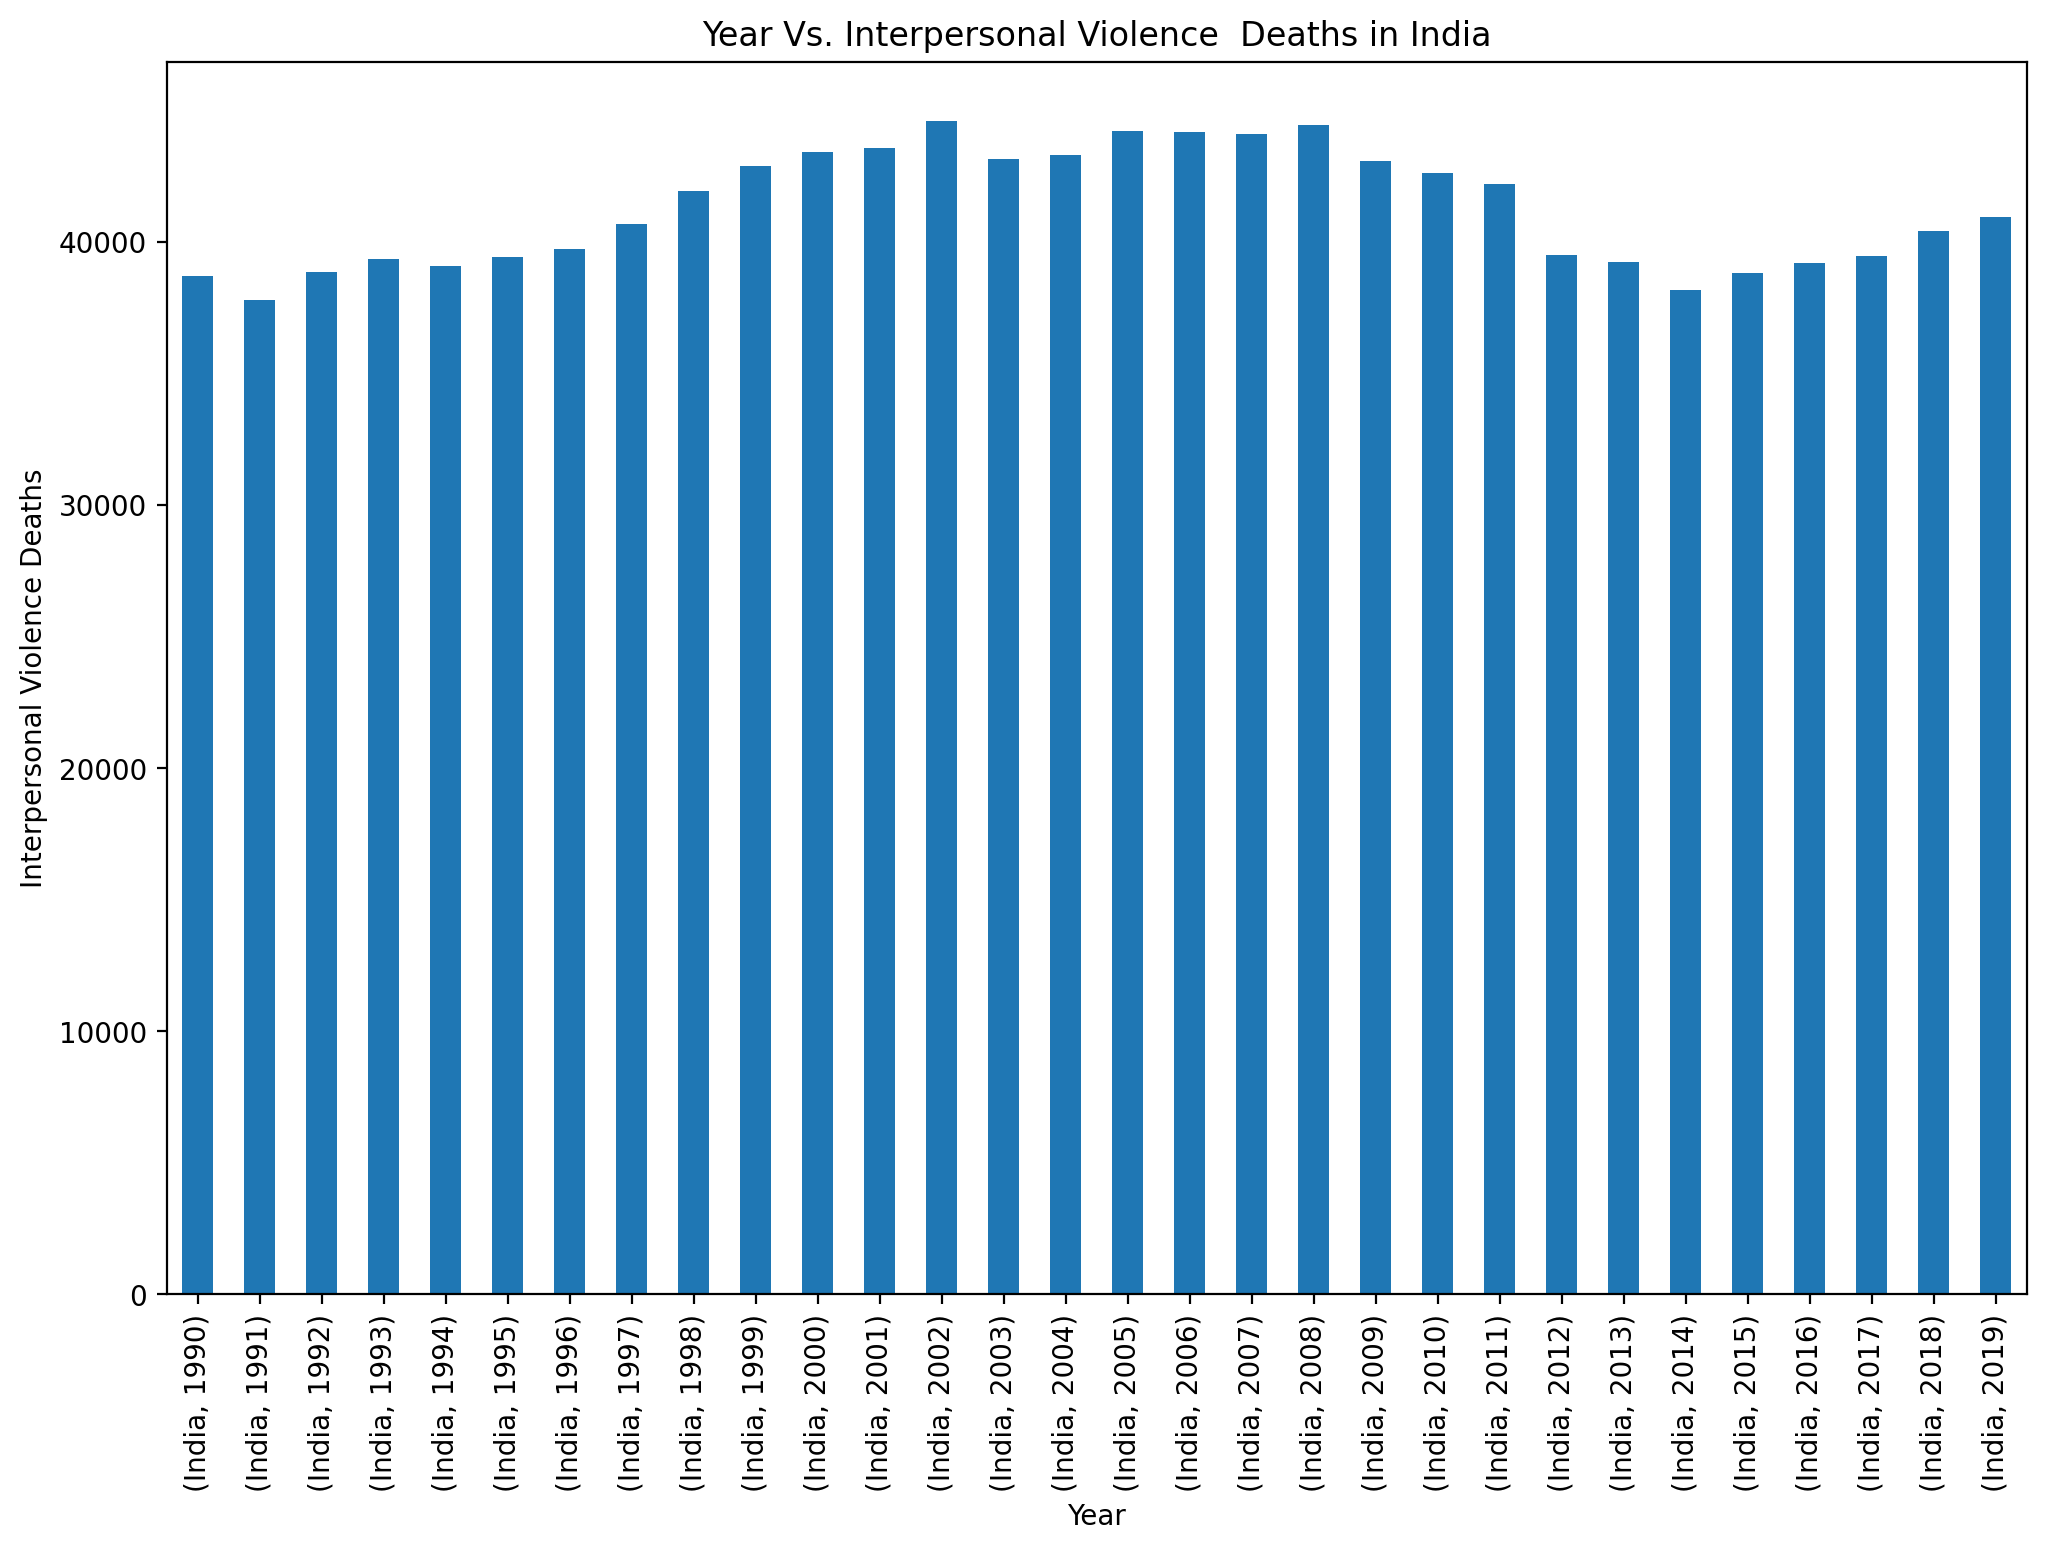

In [40]:
plt.figure(figsize=(12,8), dpi=200)
china_df=India_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Interpersonal Violence'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Interpersonal Violence Deaths")
plt.title("Year Vs. Interpersonal Violence  Deaths in India")
plt.show()

There is a raise in Interpersonal Violence Deaths recorded in India from 2014

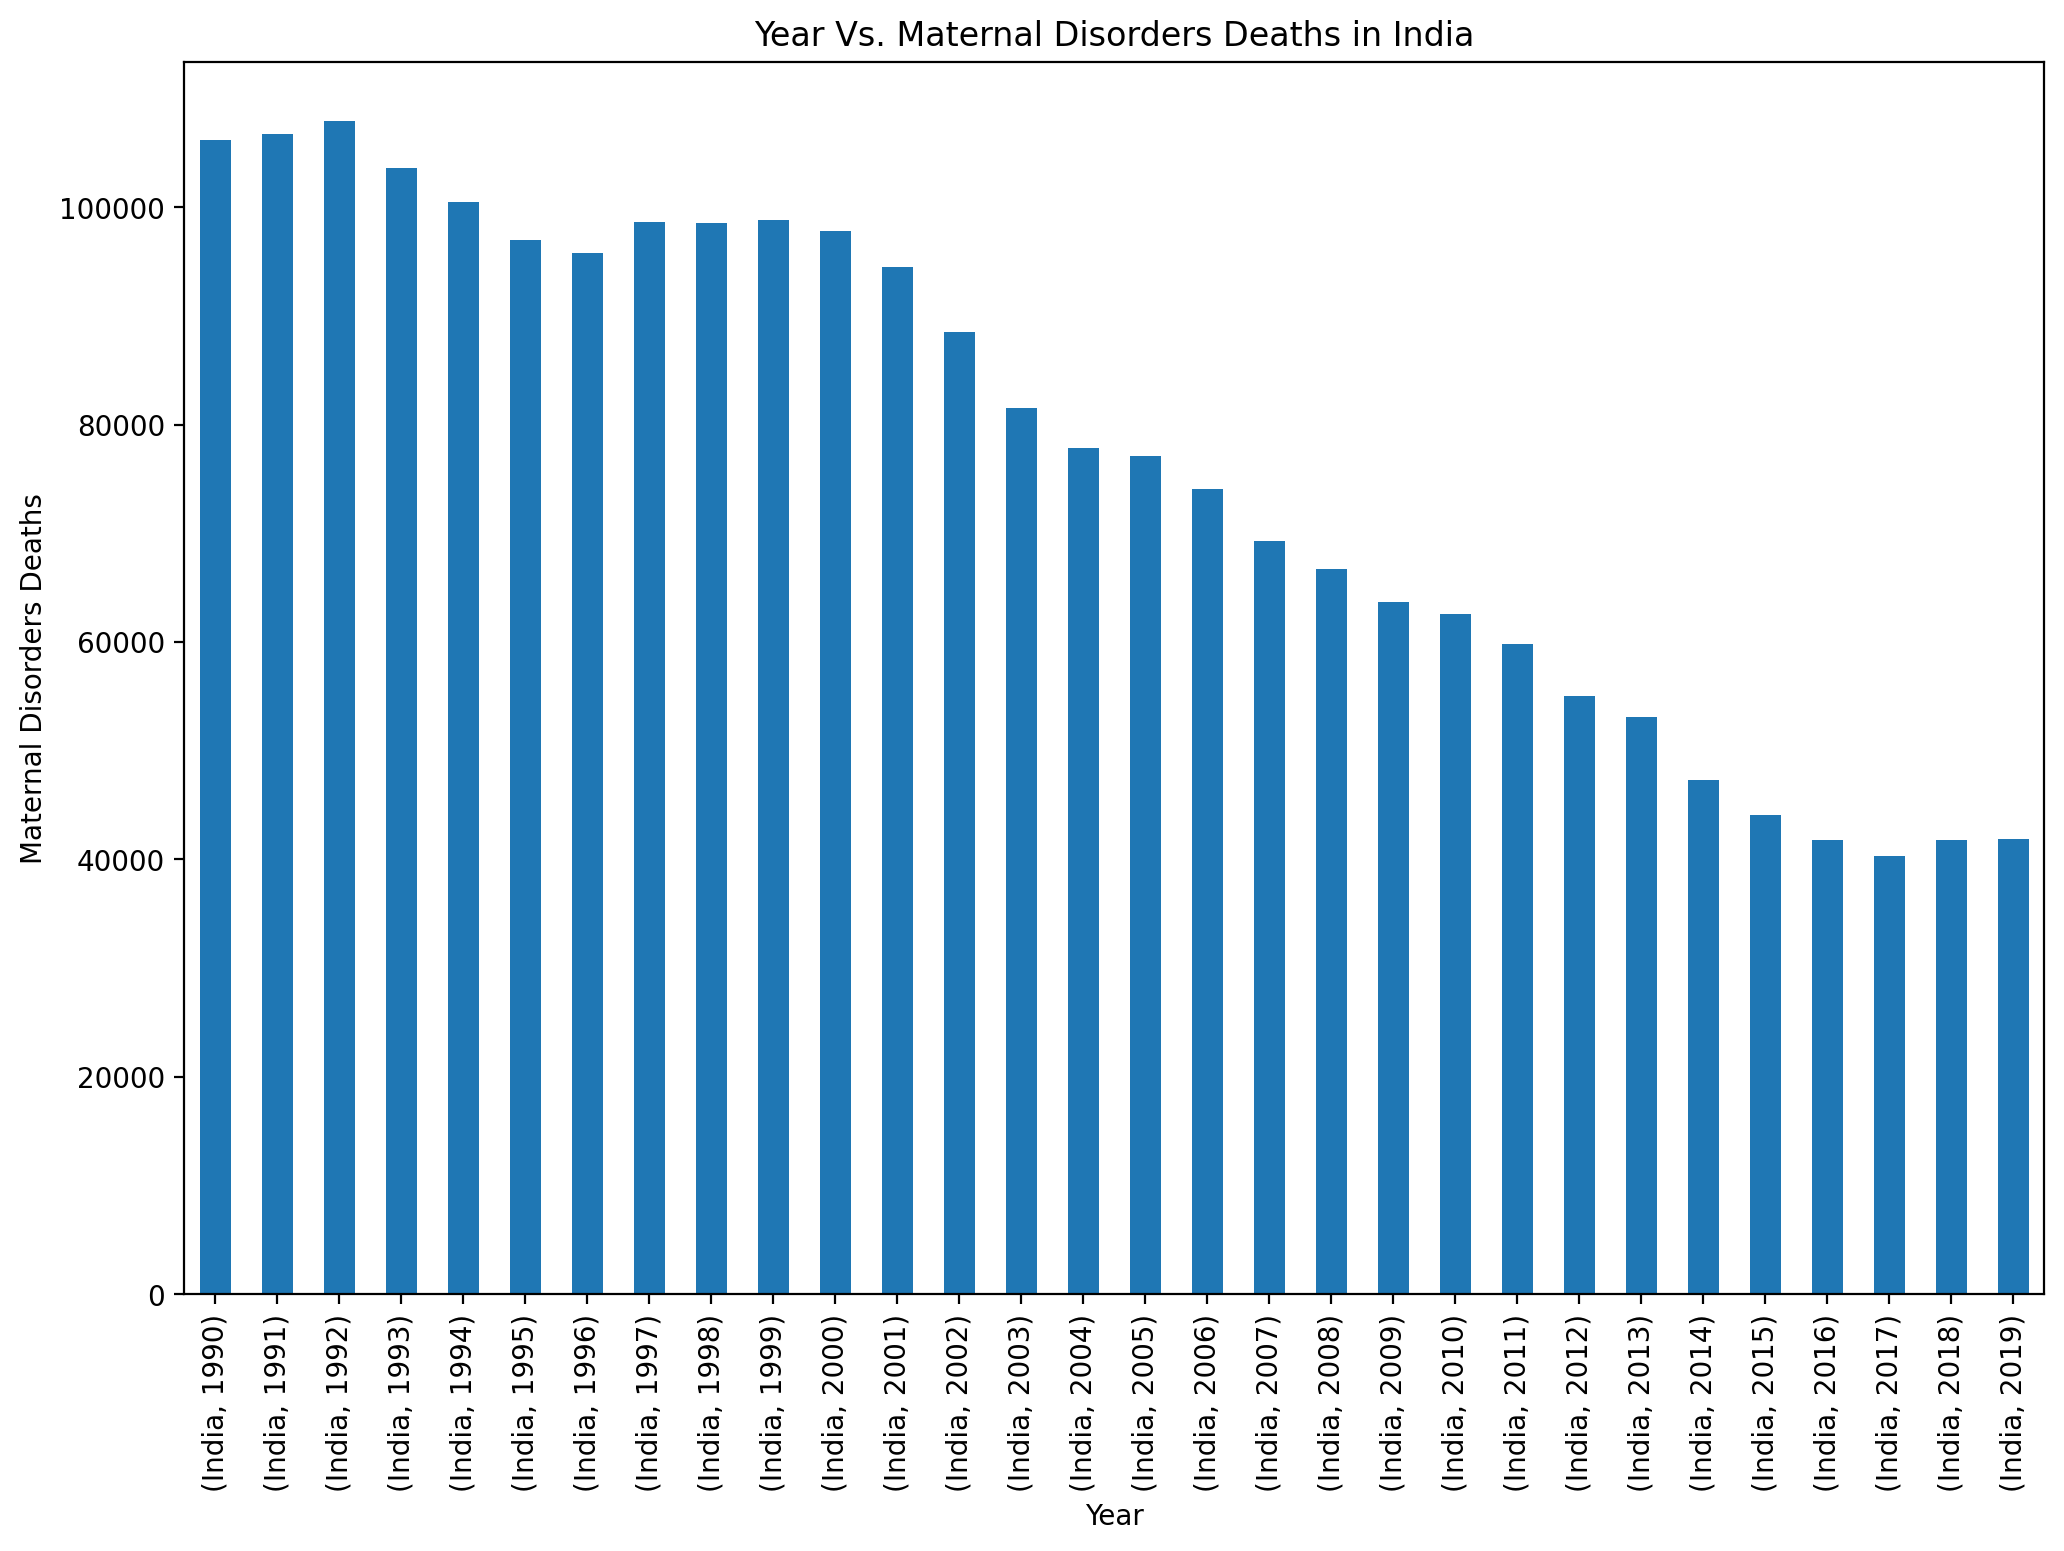

In [41]:
plt.figure(figsize=(12,8), dpi=200)
china_df=India_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Maternal Disorders'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Maternal Disorders Deaths")
plt.title("Year Vs. Maternal Disorders Deaths in India")
plt.show()

There is continual drop in Maternal Disorders Deaths recorded in India after 1999.

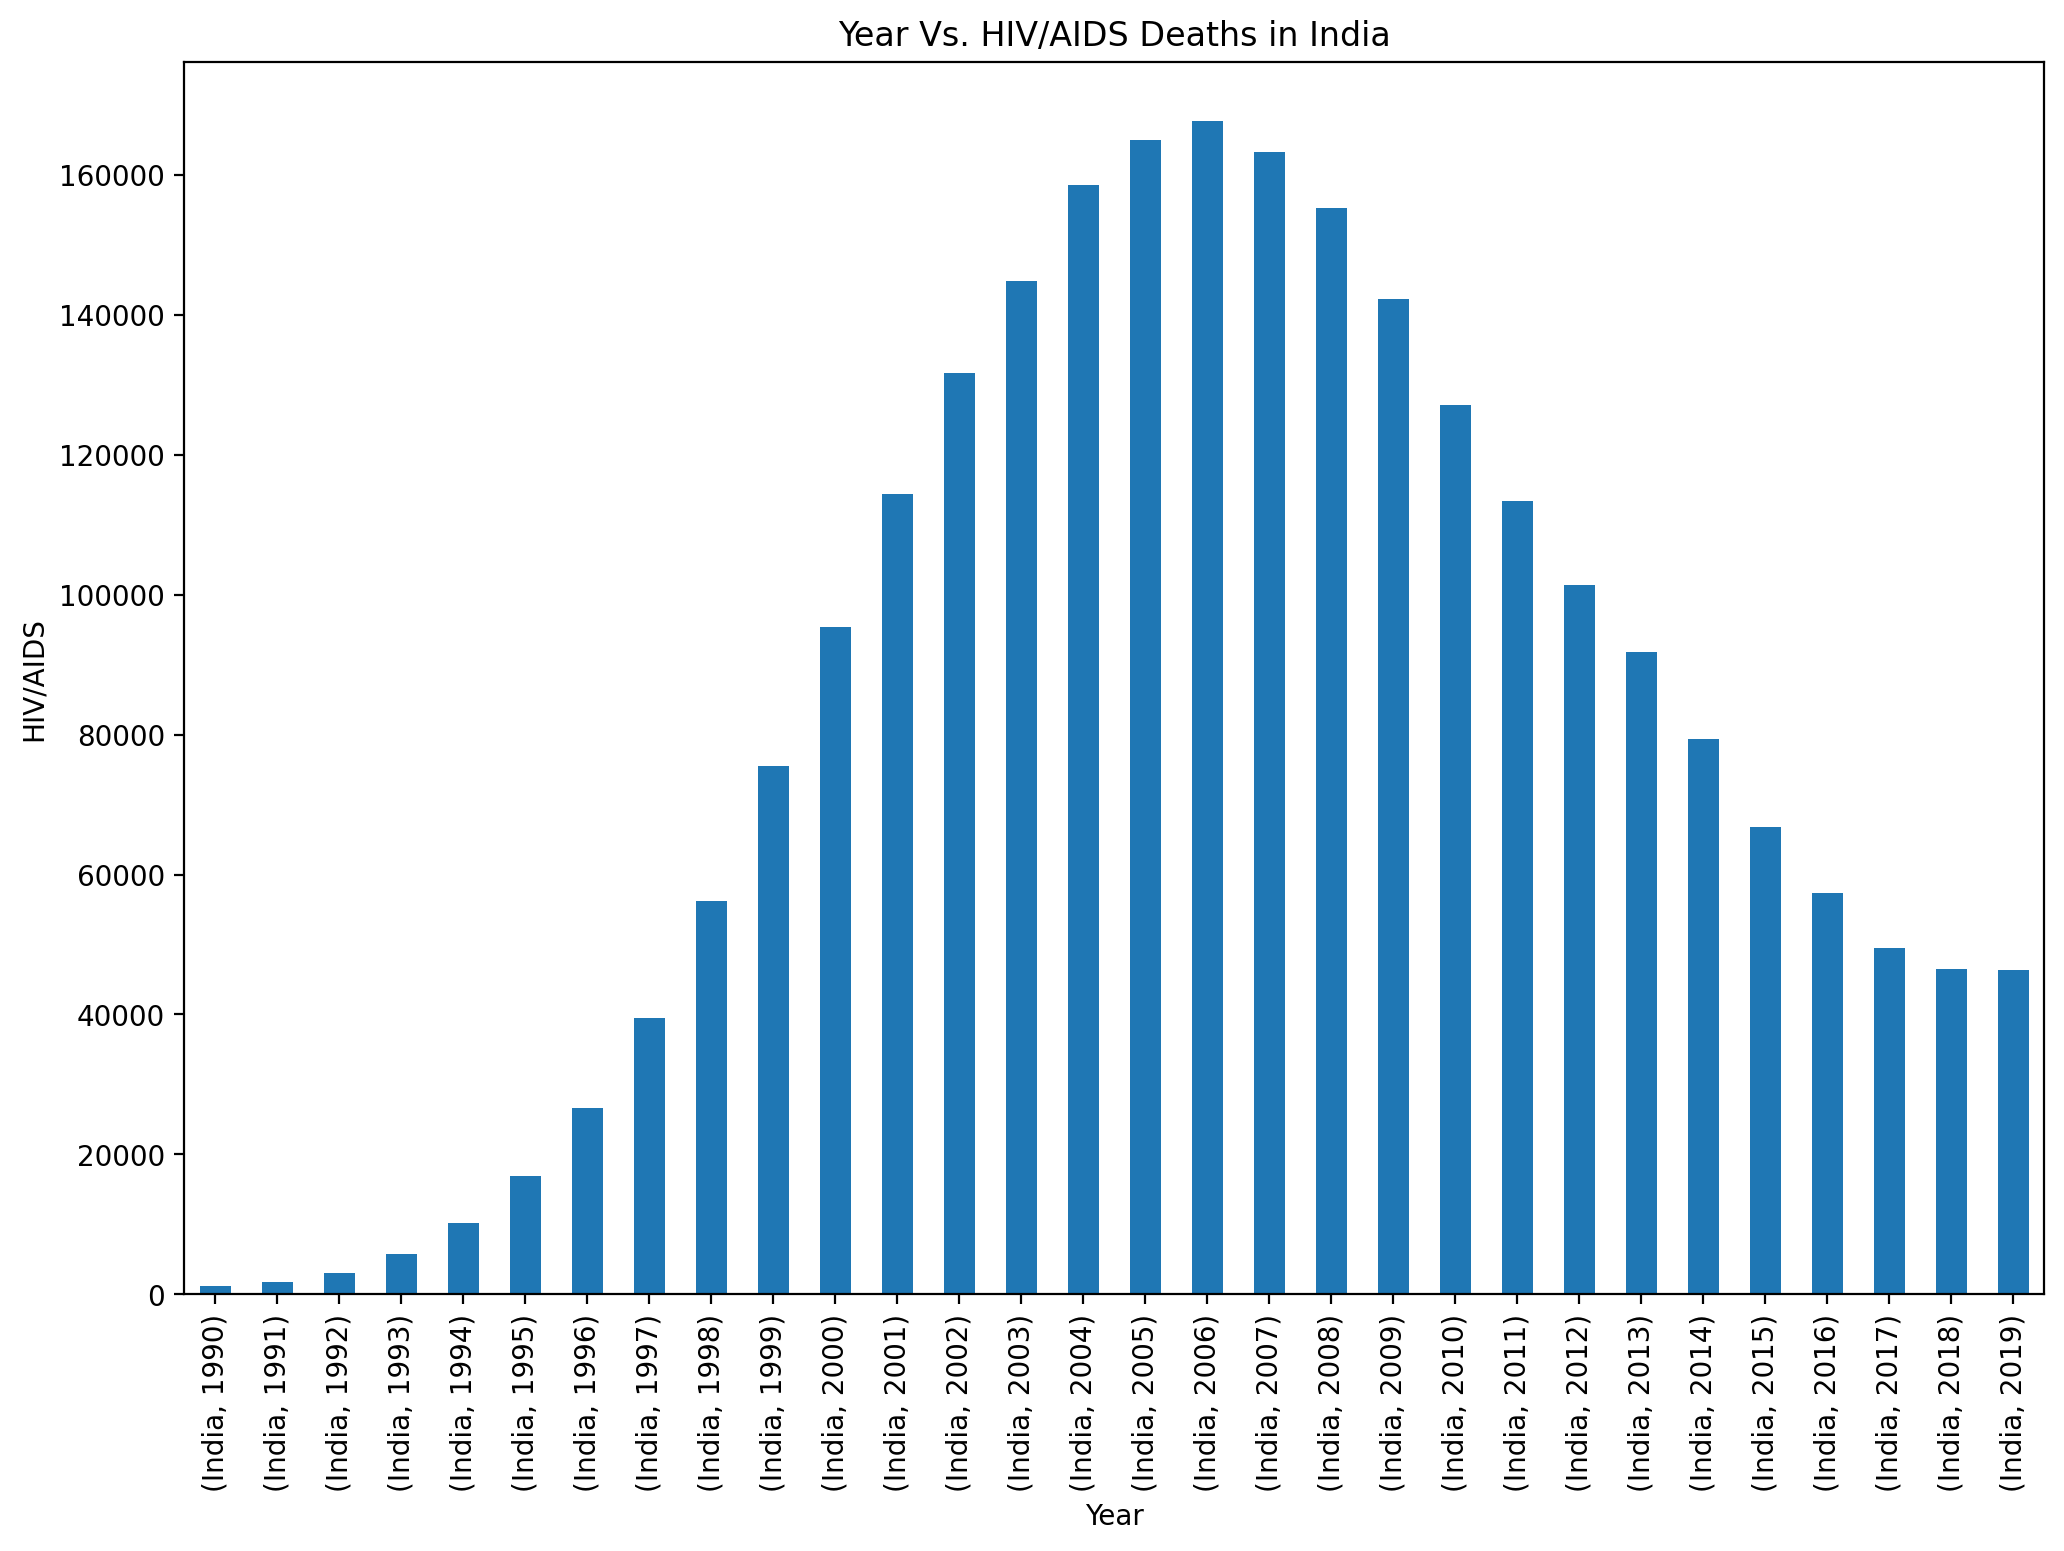

In [42]:
plt.figure(figsize=(12,8), dpi=200)
china_df=India_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['HIV/AIDS'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("HIV/AIDS")
plt.title("Year Vs. HIV/AIDS Deaths in India")
plt.show()

There is continual raise in HIV/AIDS Deaths recorded in India from 1992 and reached peak at 2006 from where there is cotinual drop.

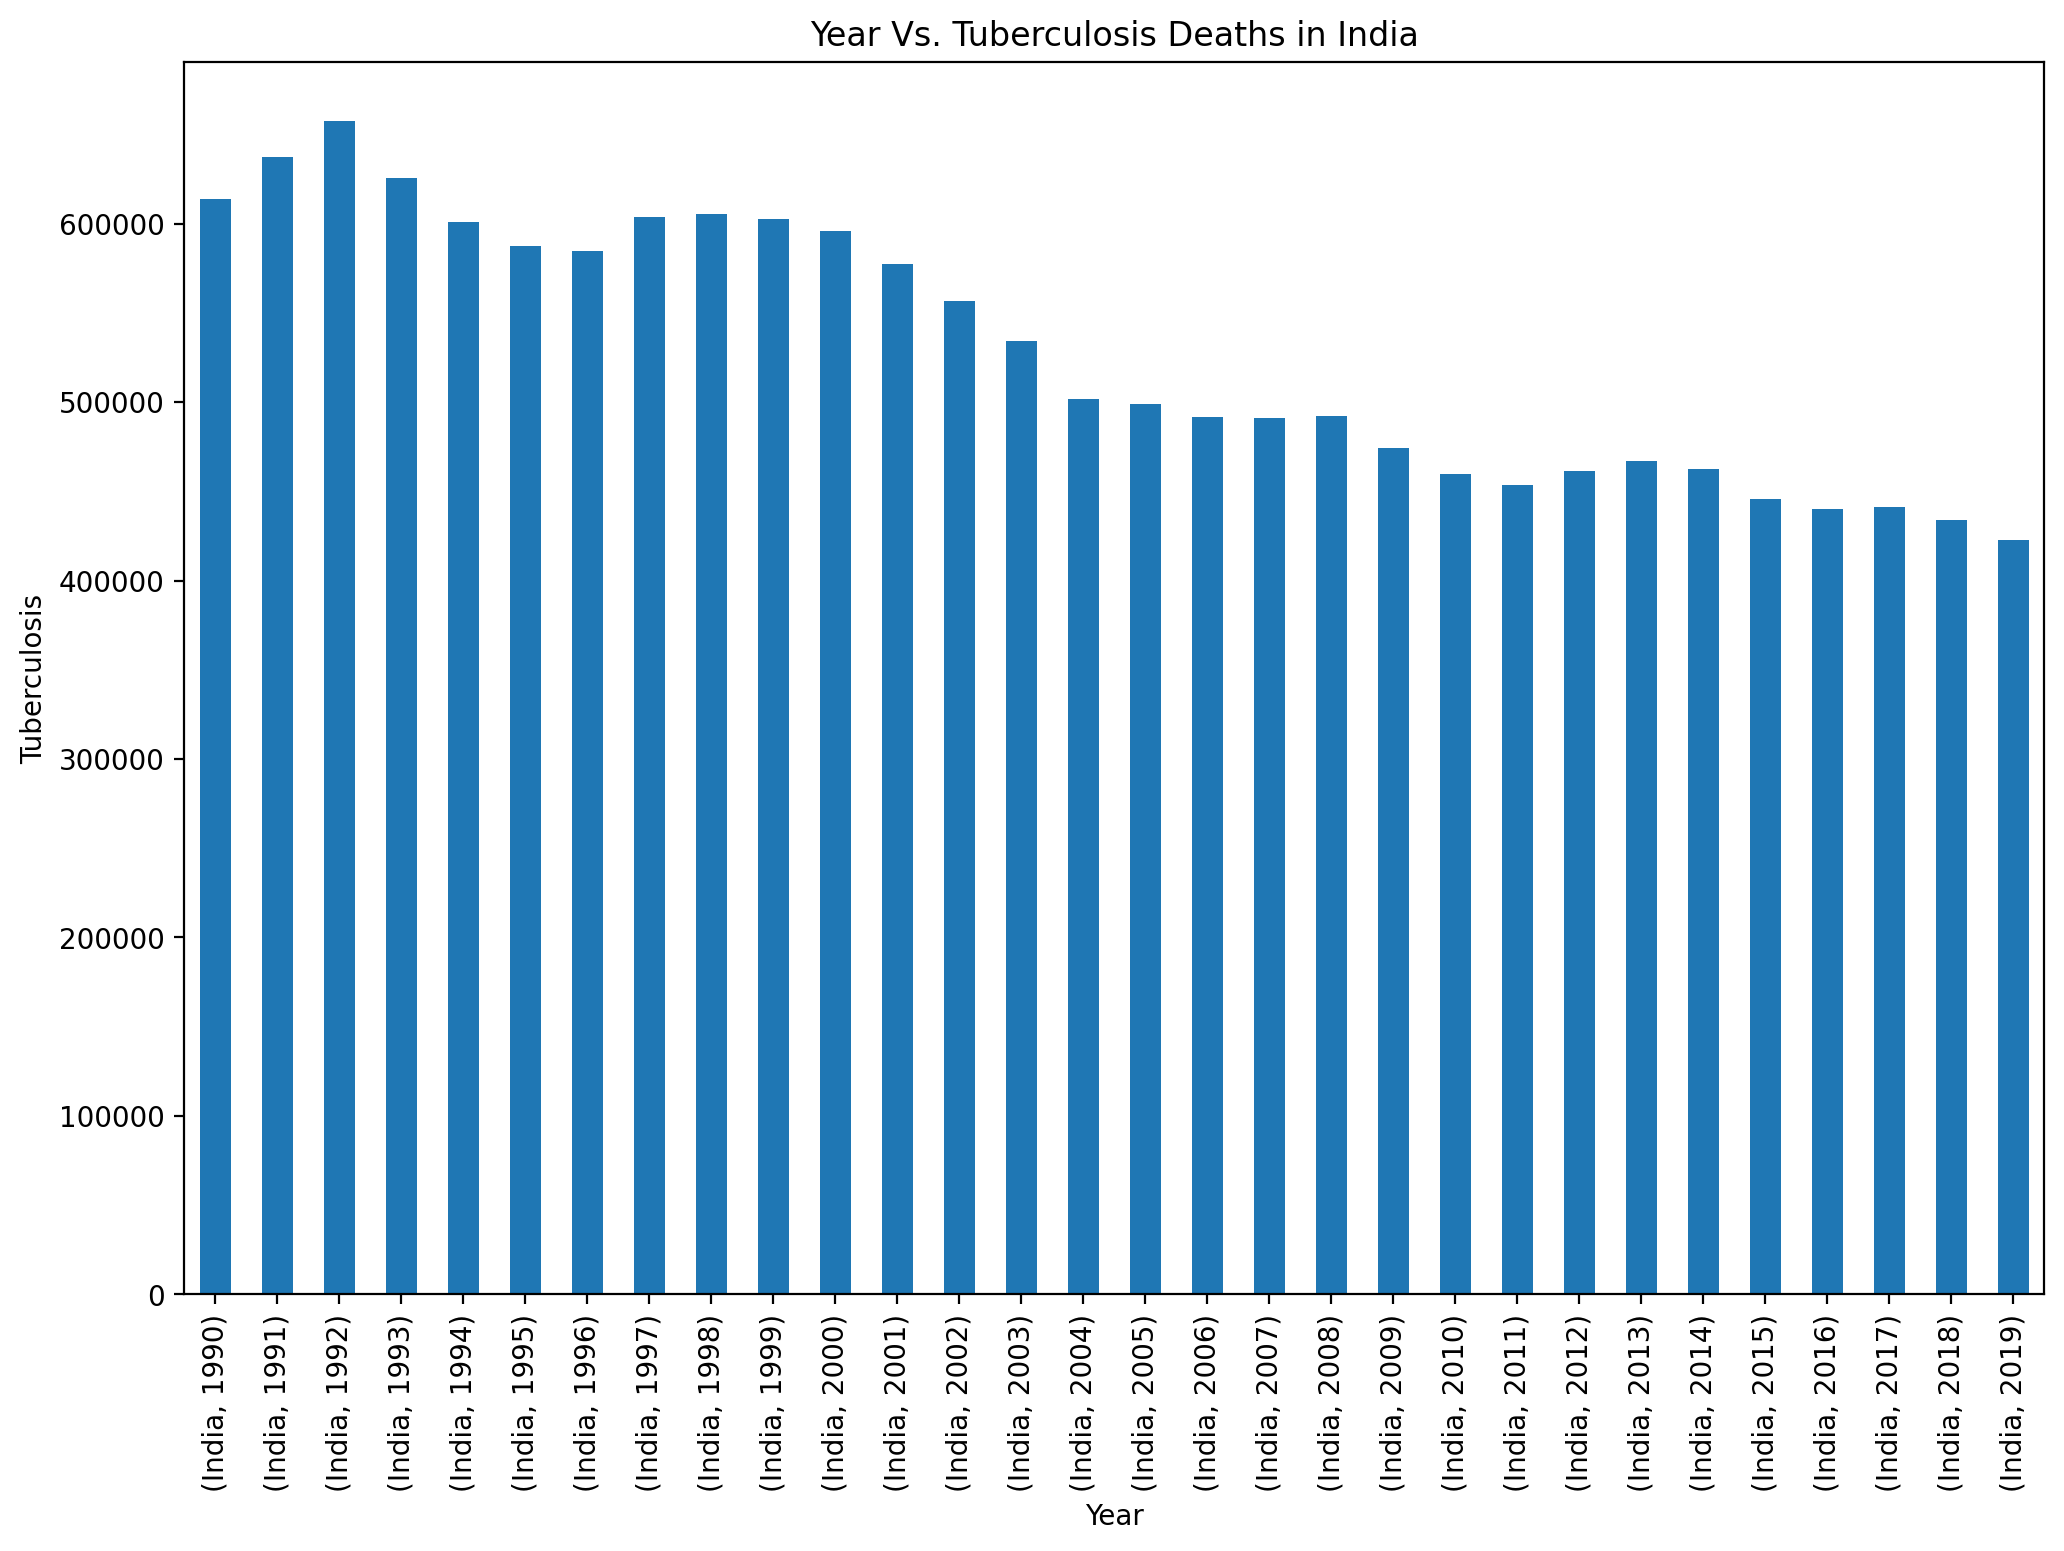

In [43]:
plt.figure(figsize=(12,8), dpi=200)
china_df=India_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Tuberculosis'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Tuberculosis")
plt.title("Year Vs. Tuberculosis Deaths in India")
plt.show()

Though there are deviations in Tuberculosis Deaths recorded in India, there is a drop after year 1998.

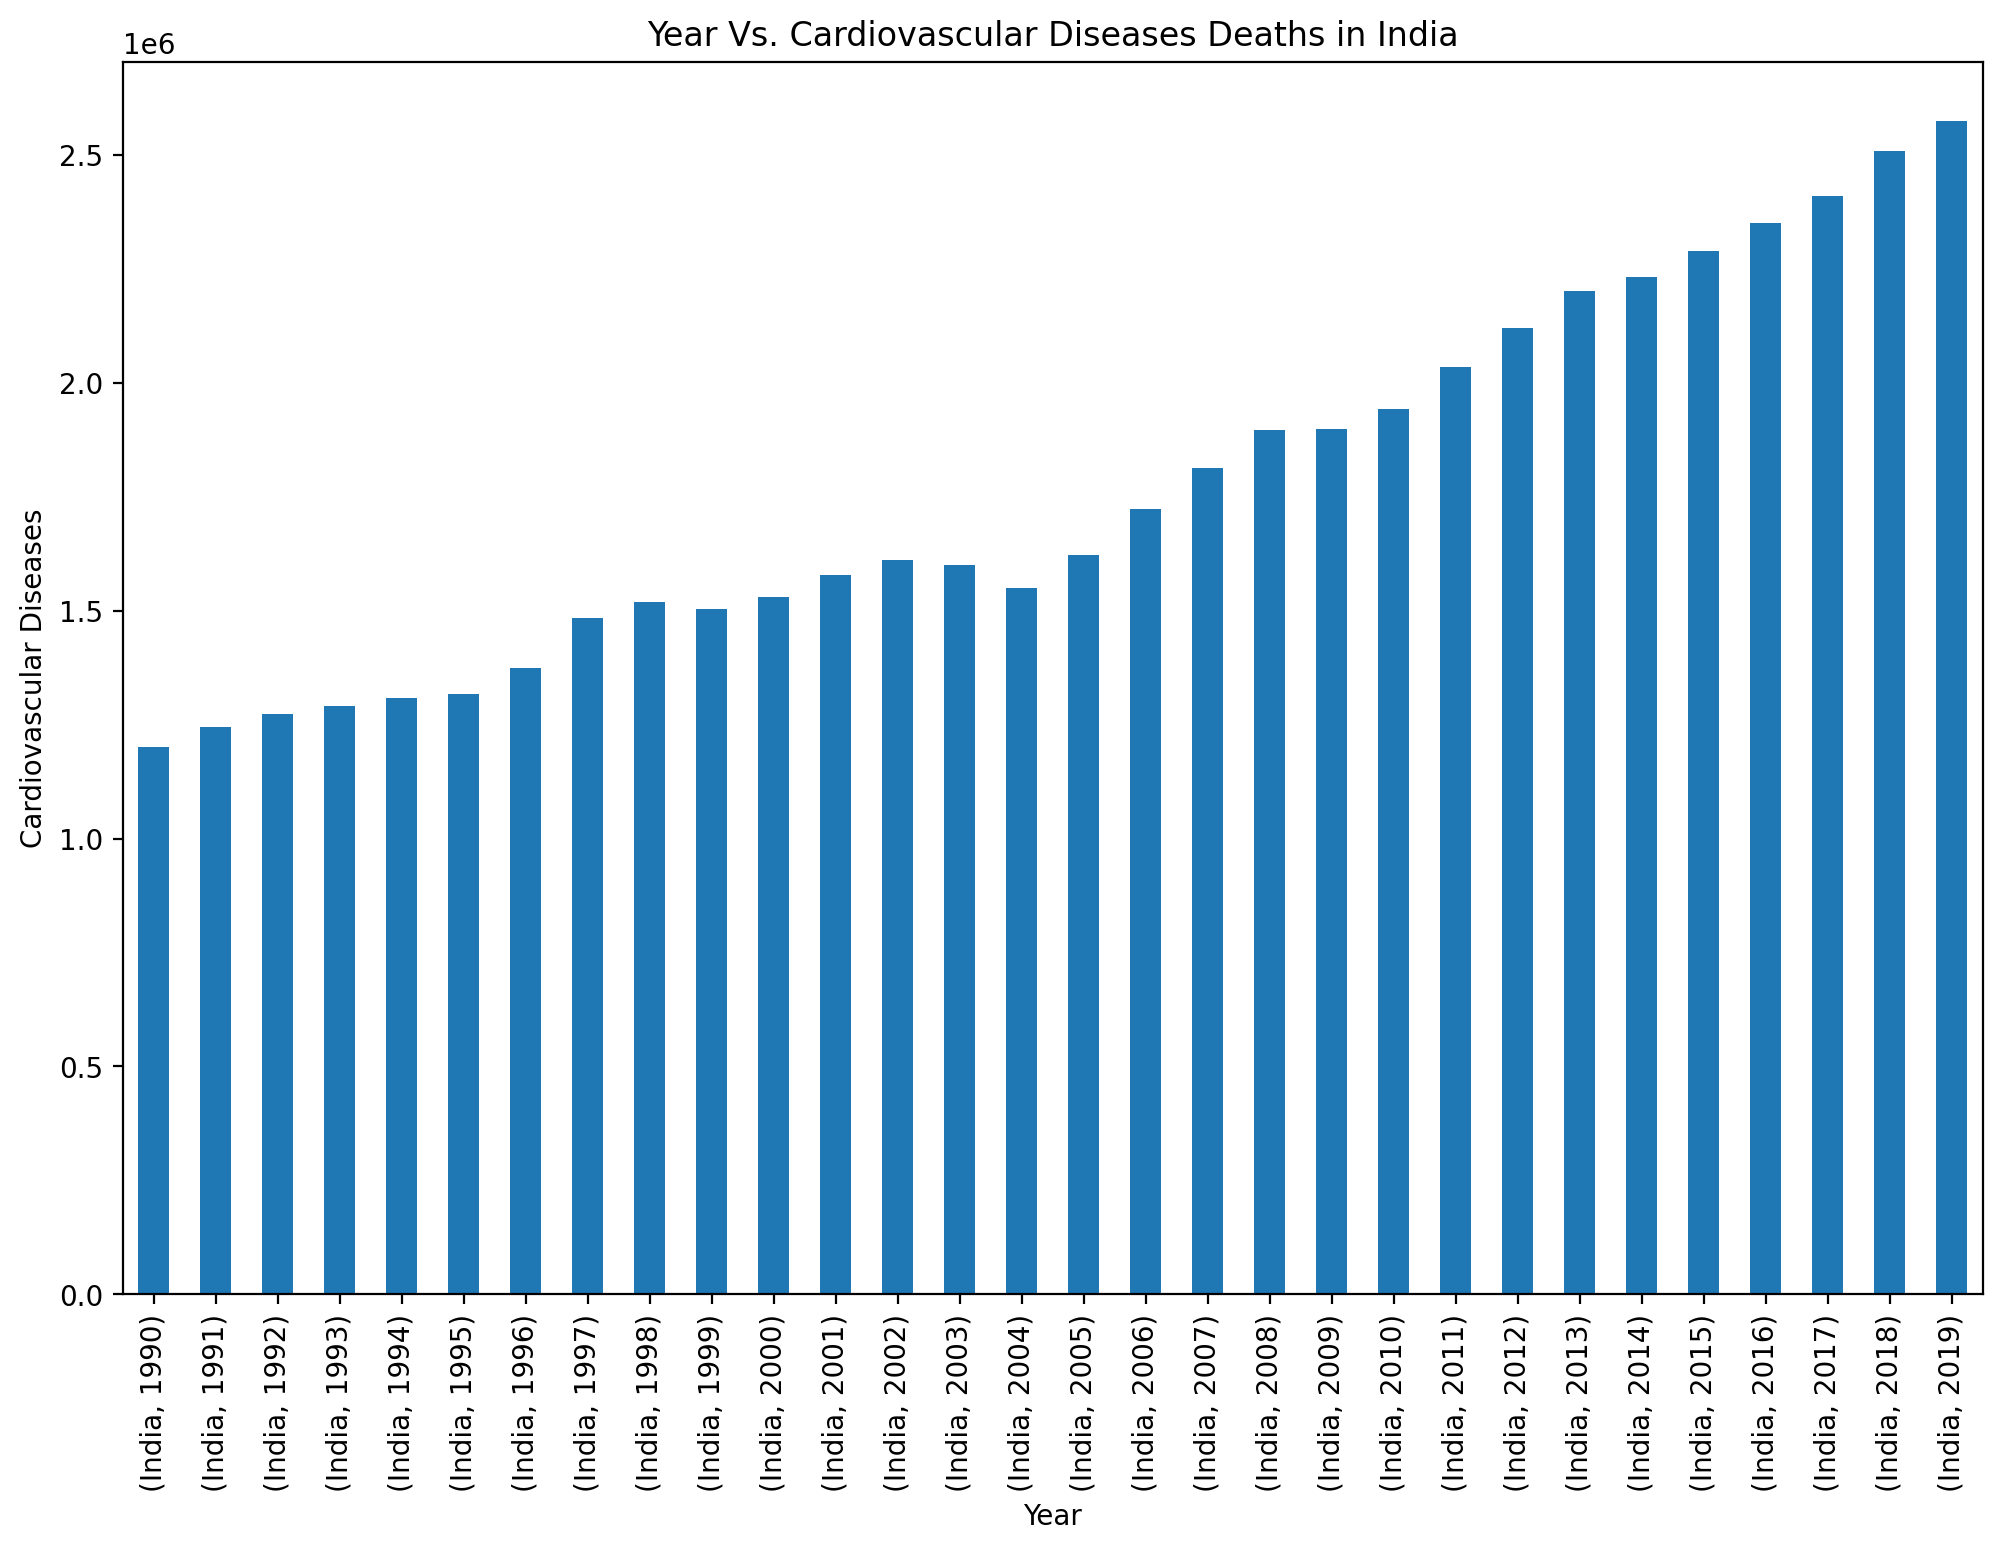

In [44]:
plt.figure(figsize=(12,8), dpi=200)
china_df=India_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Cardiovascular Diseases'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Cardiovascular Diseases")
plt.title("Year Vs. Cardiovascular Diseases Deaths in India")
plt.show()

There are continual raise in Cardiovascular Diseases Deaths recorded in India.

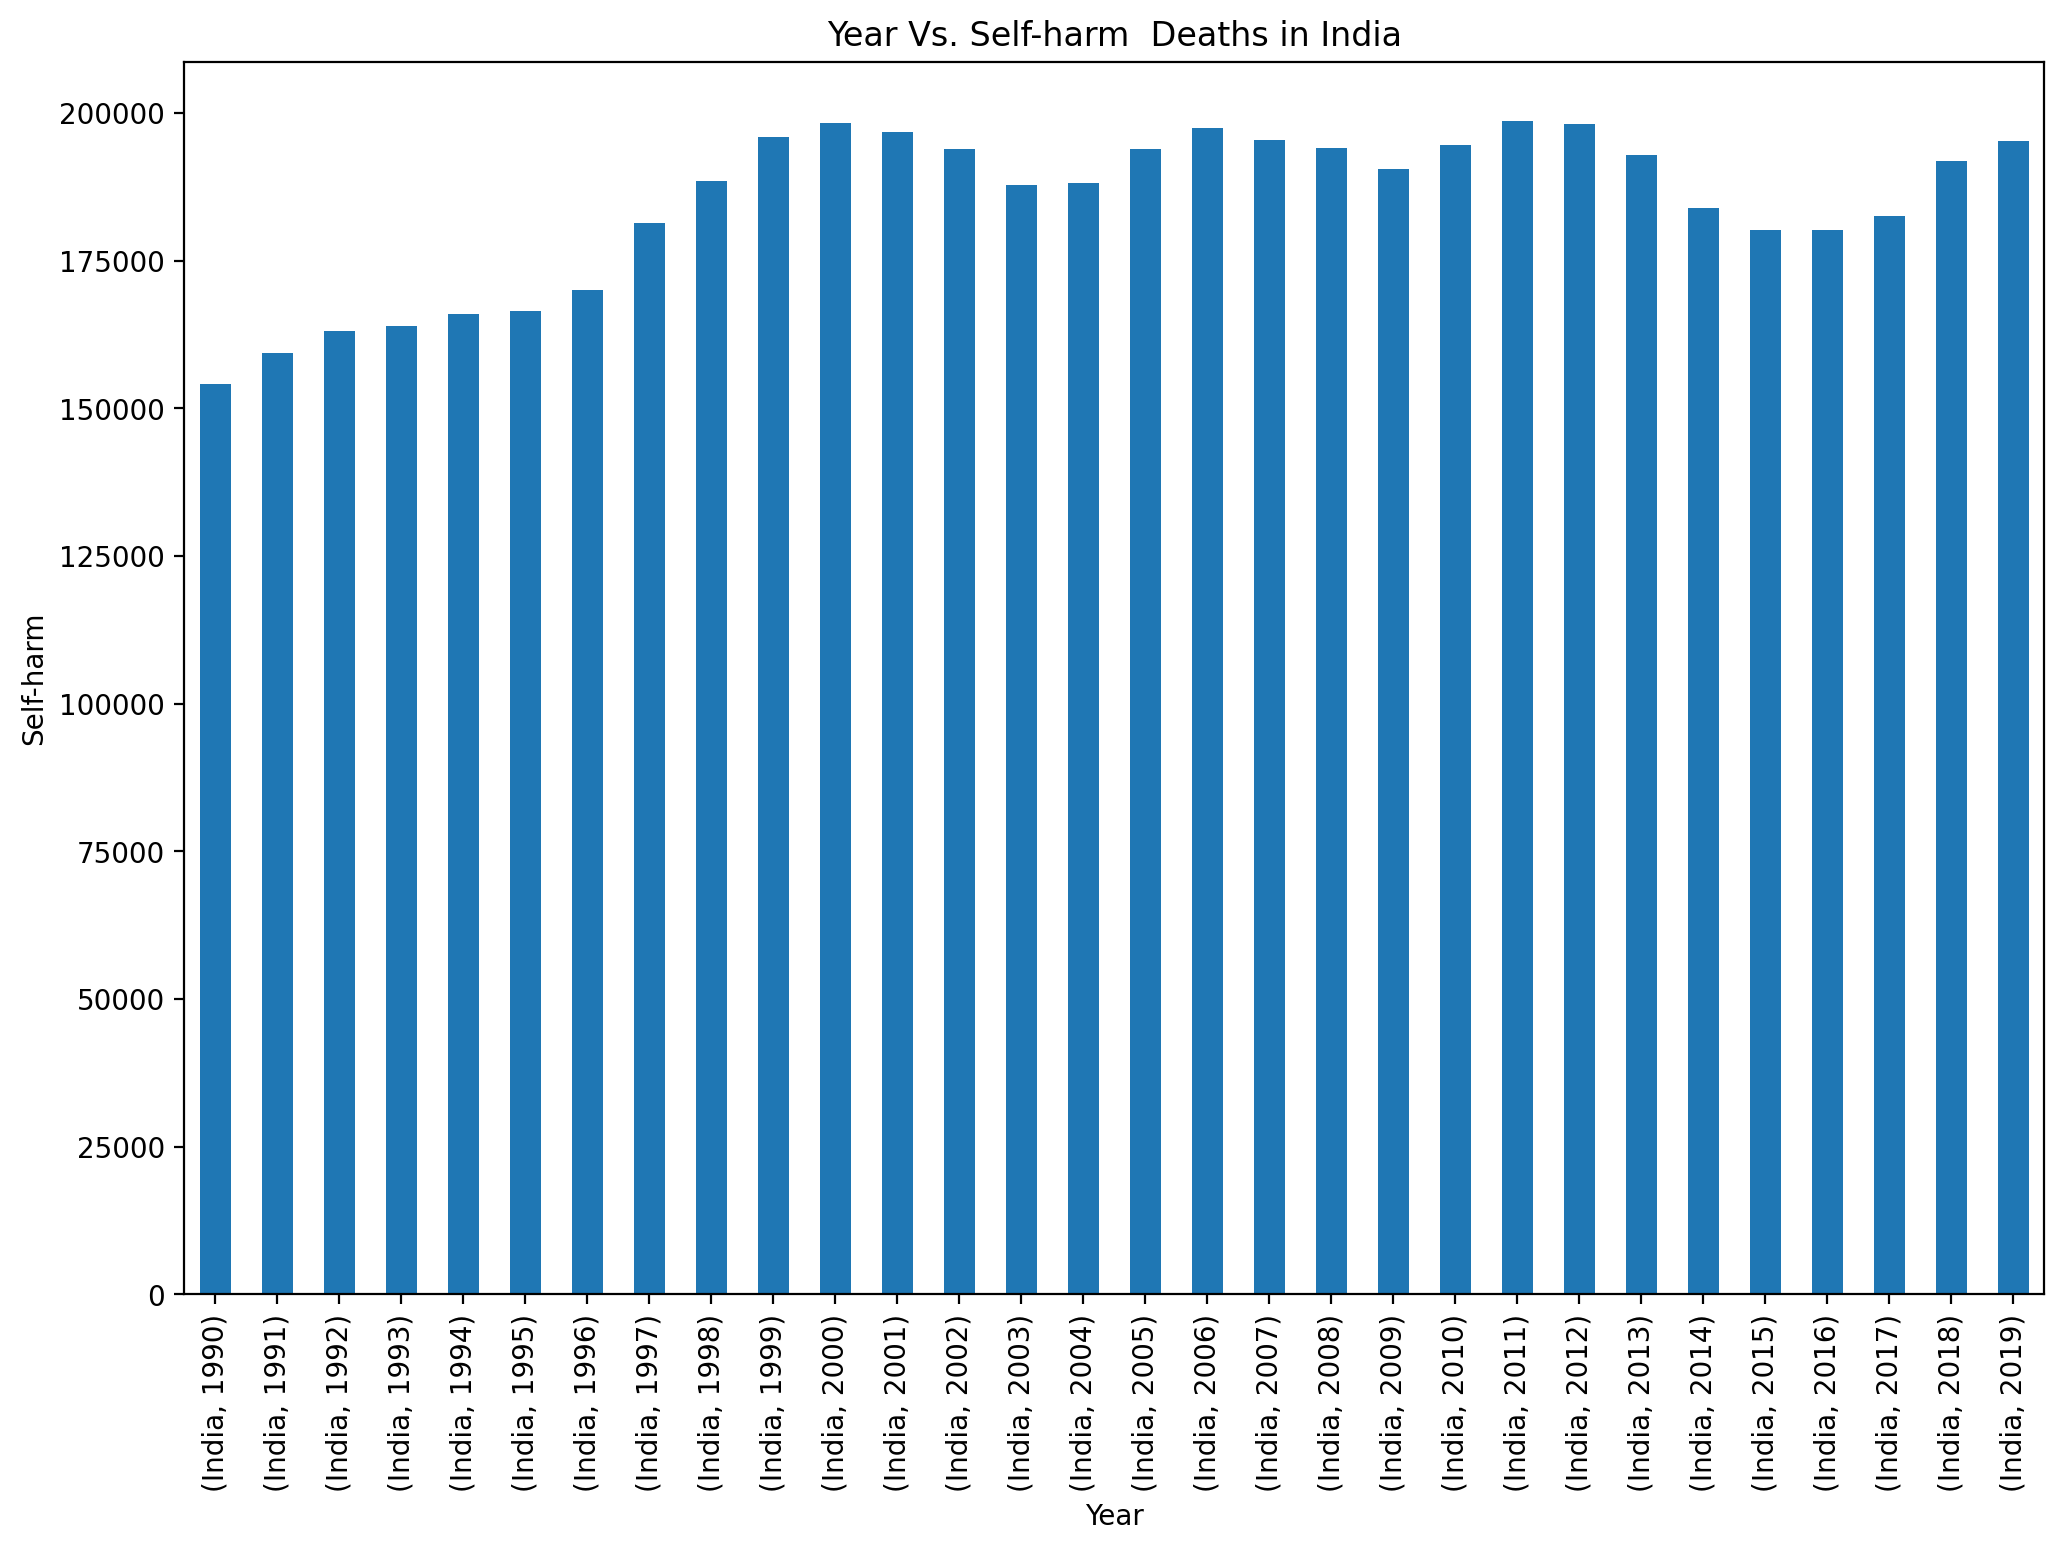

In [45]:
plt.figure(figsize=(12,8), dpi=200)
china_df=India_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Self-harm'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Self-harm")
plt.title("Year Vs. Self-harm  Deaths in India")
plt.show()

There are continual raise in Self-harm Deaths recorded in India from 1990 to 2001, but then there are fluctuations.

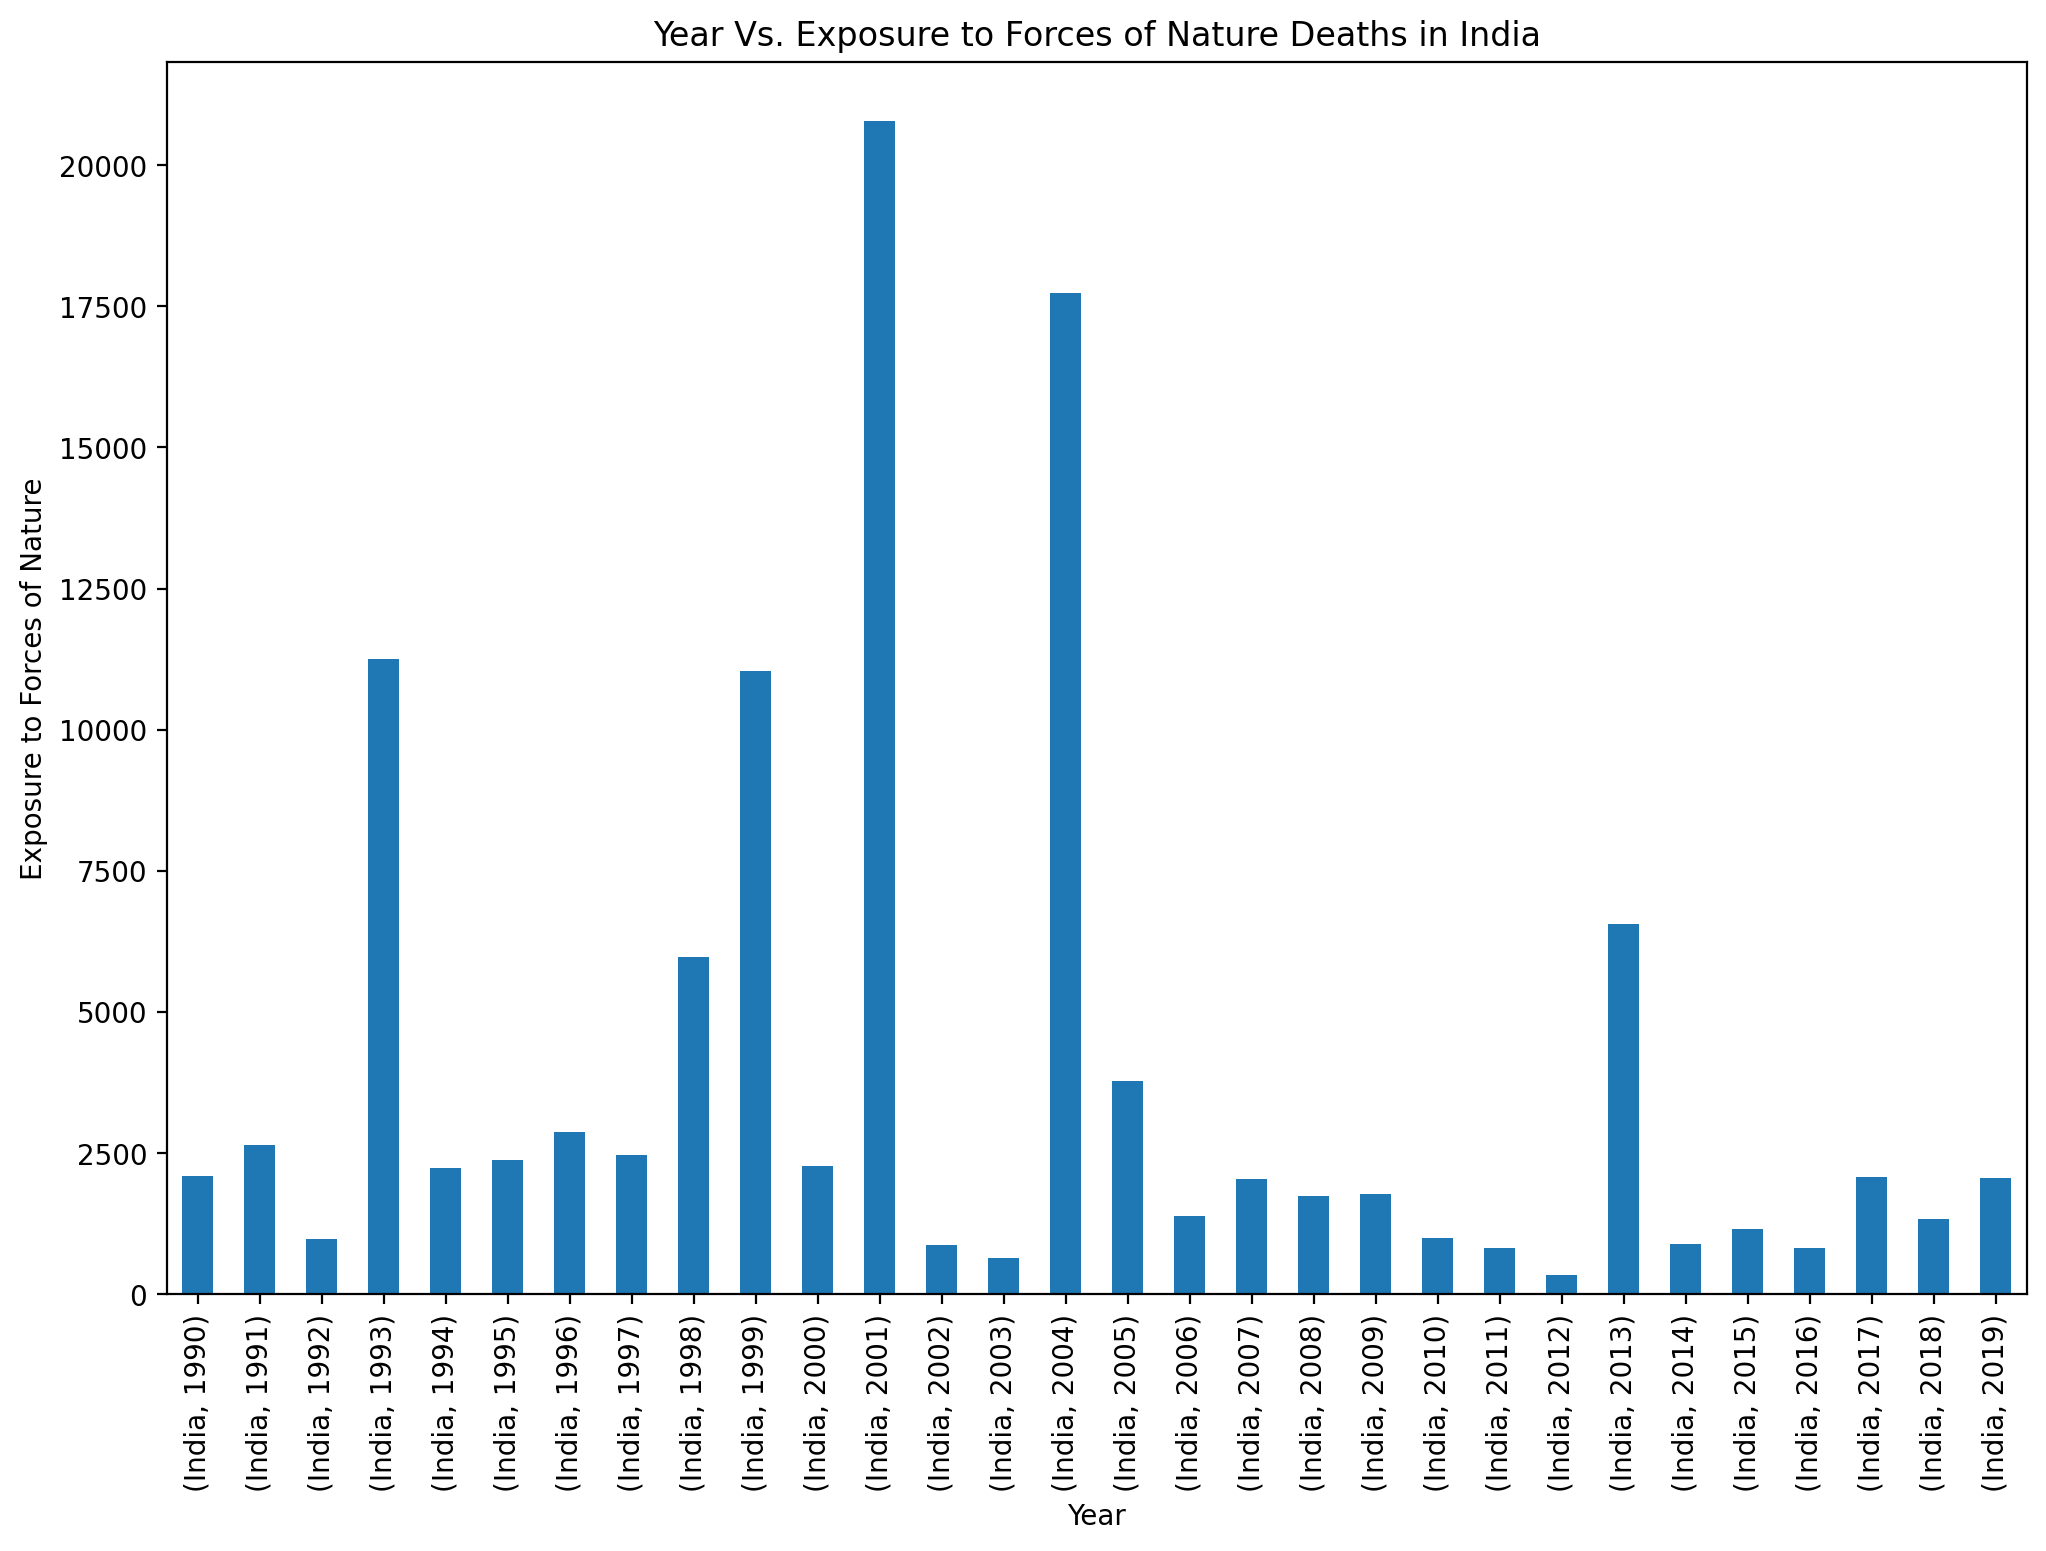

In [46]:
plt.figure(figsize=(12,8), dpi=200)
china_df=India_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Exposure to Forces of Nature'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Exposure to Forces of Nature")
plt.title("Year Vs. Exposure to Forces of Nature Deaths in India")
plt.show()

The Peak incident: Bhachau Taluka of Kutch(Gujrat) experienced an earthquake of 7.6 to 7.9 on the Richter Scale and lasted for 120 seconds. This disaster killed around 20,000, injured 167,000 and nearly 400,000 people became homeless. The 2013 witnessed two major events, the Uttarakhand Flash Floods, mainly affecting the state of Uttarakhand and the Cyclone "Phailin" affecting two coastal states of Odisha and Andhra Pradesh.

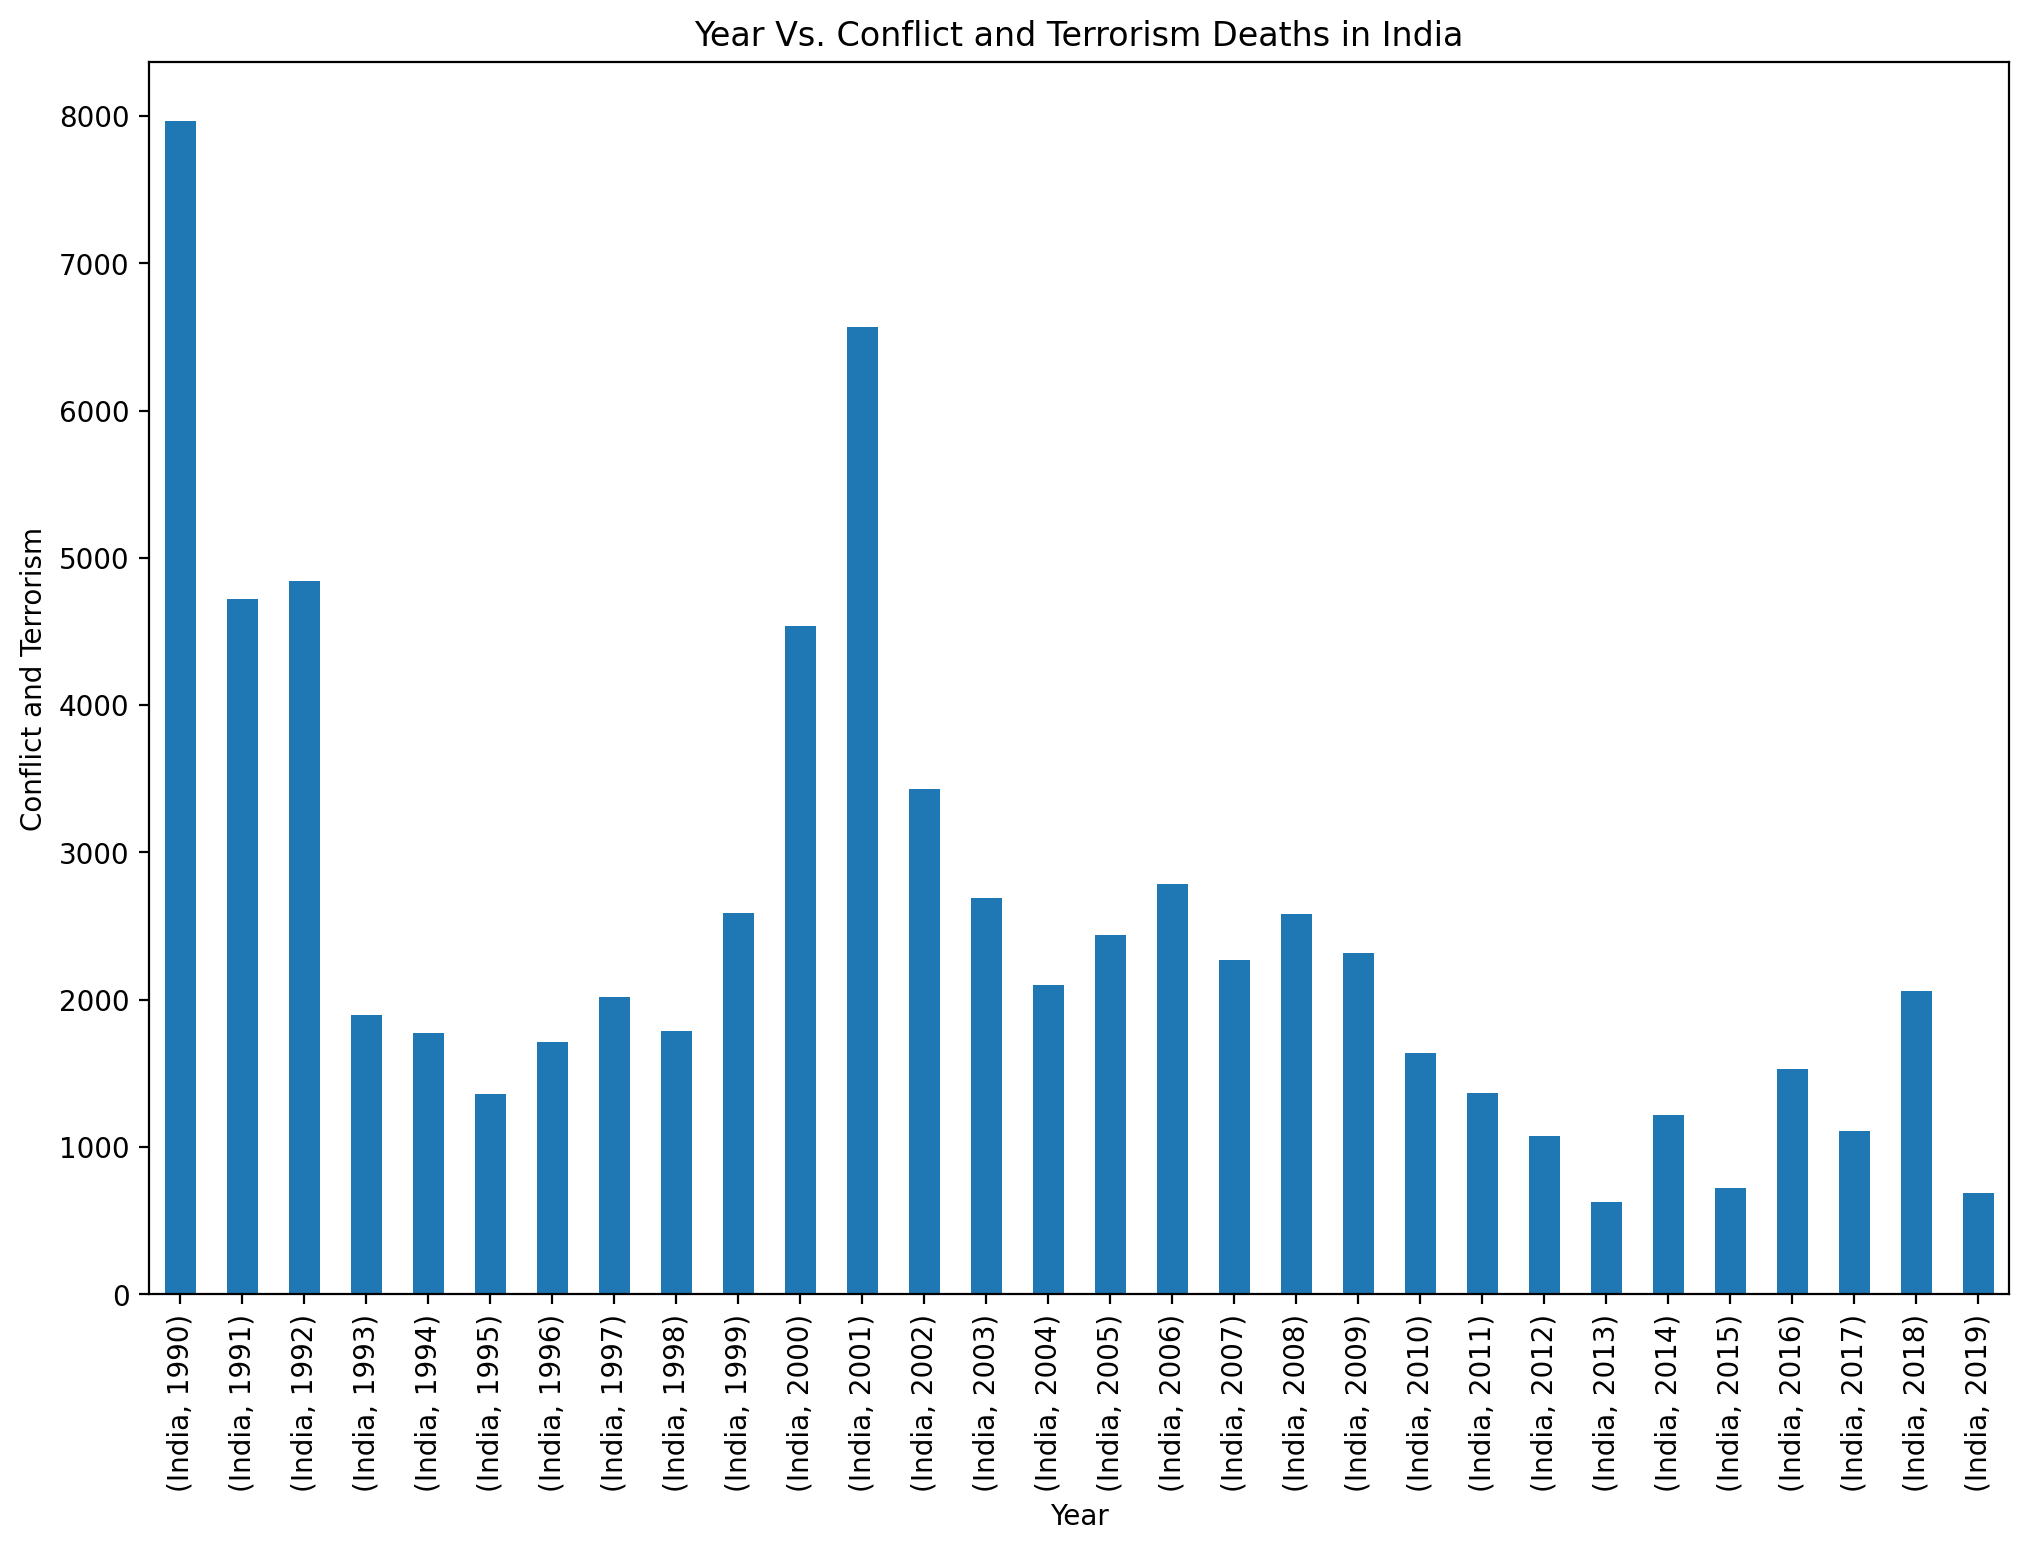

In [47]:
plt.figure(figsize=(12,8), dpi=200)
china_df=India_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Conflict and Terrorism'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Conflict and Terrorism")
plt.title("Year Vs. Conflict and Terrorism Deaths in India")
plt.show()

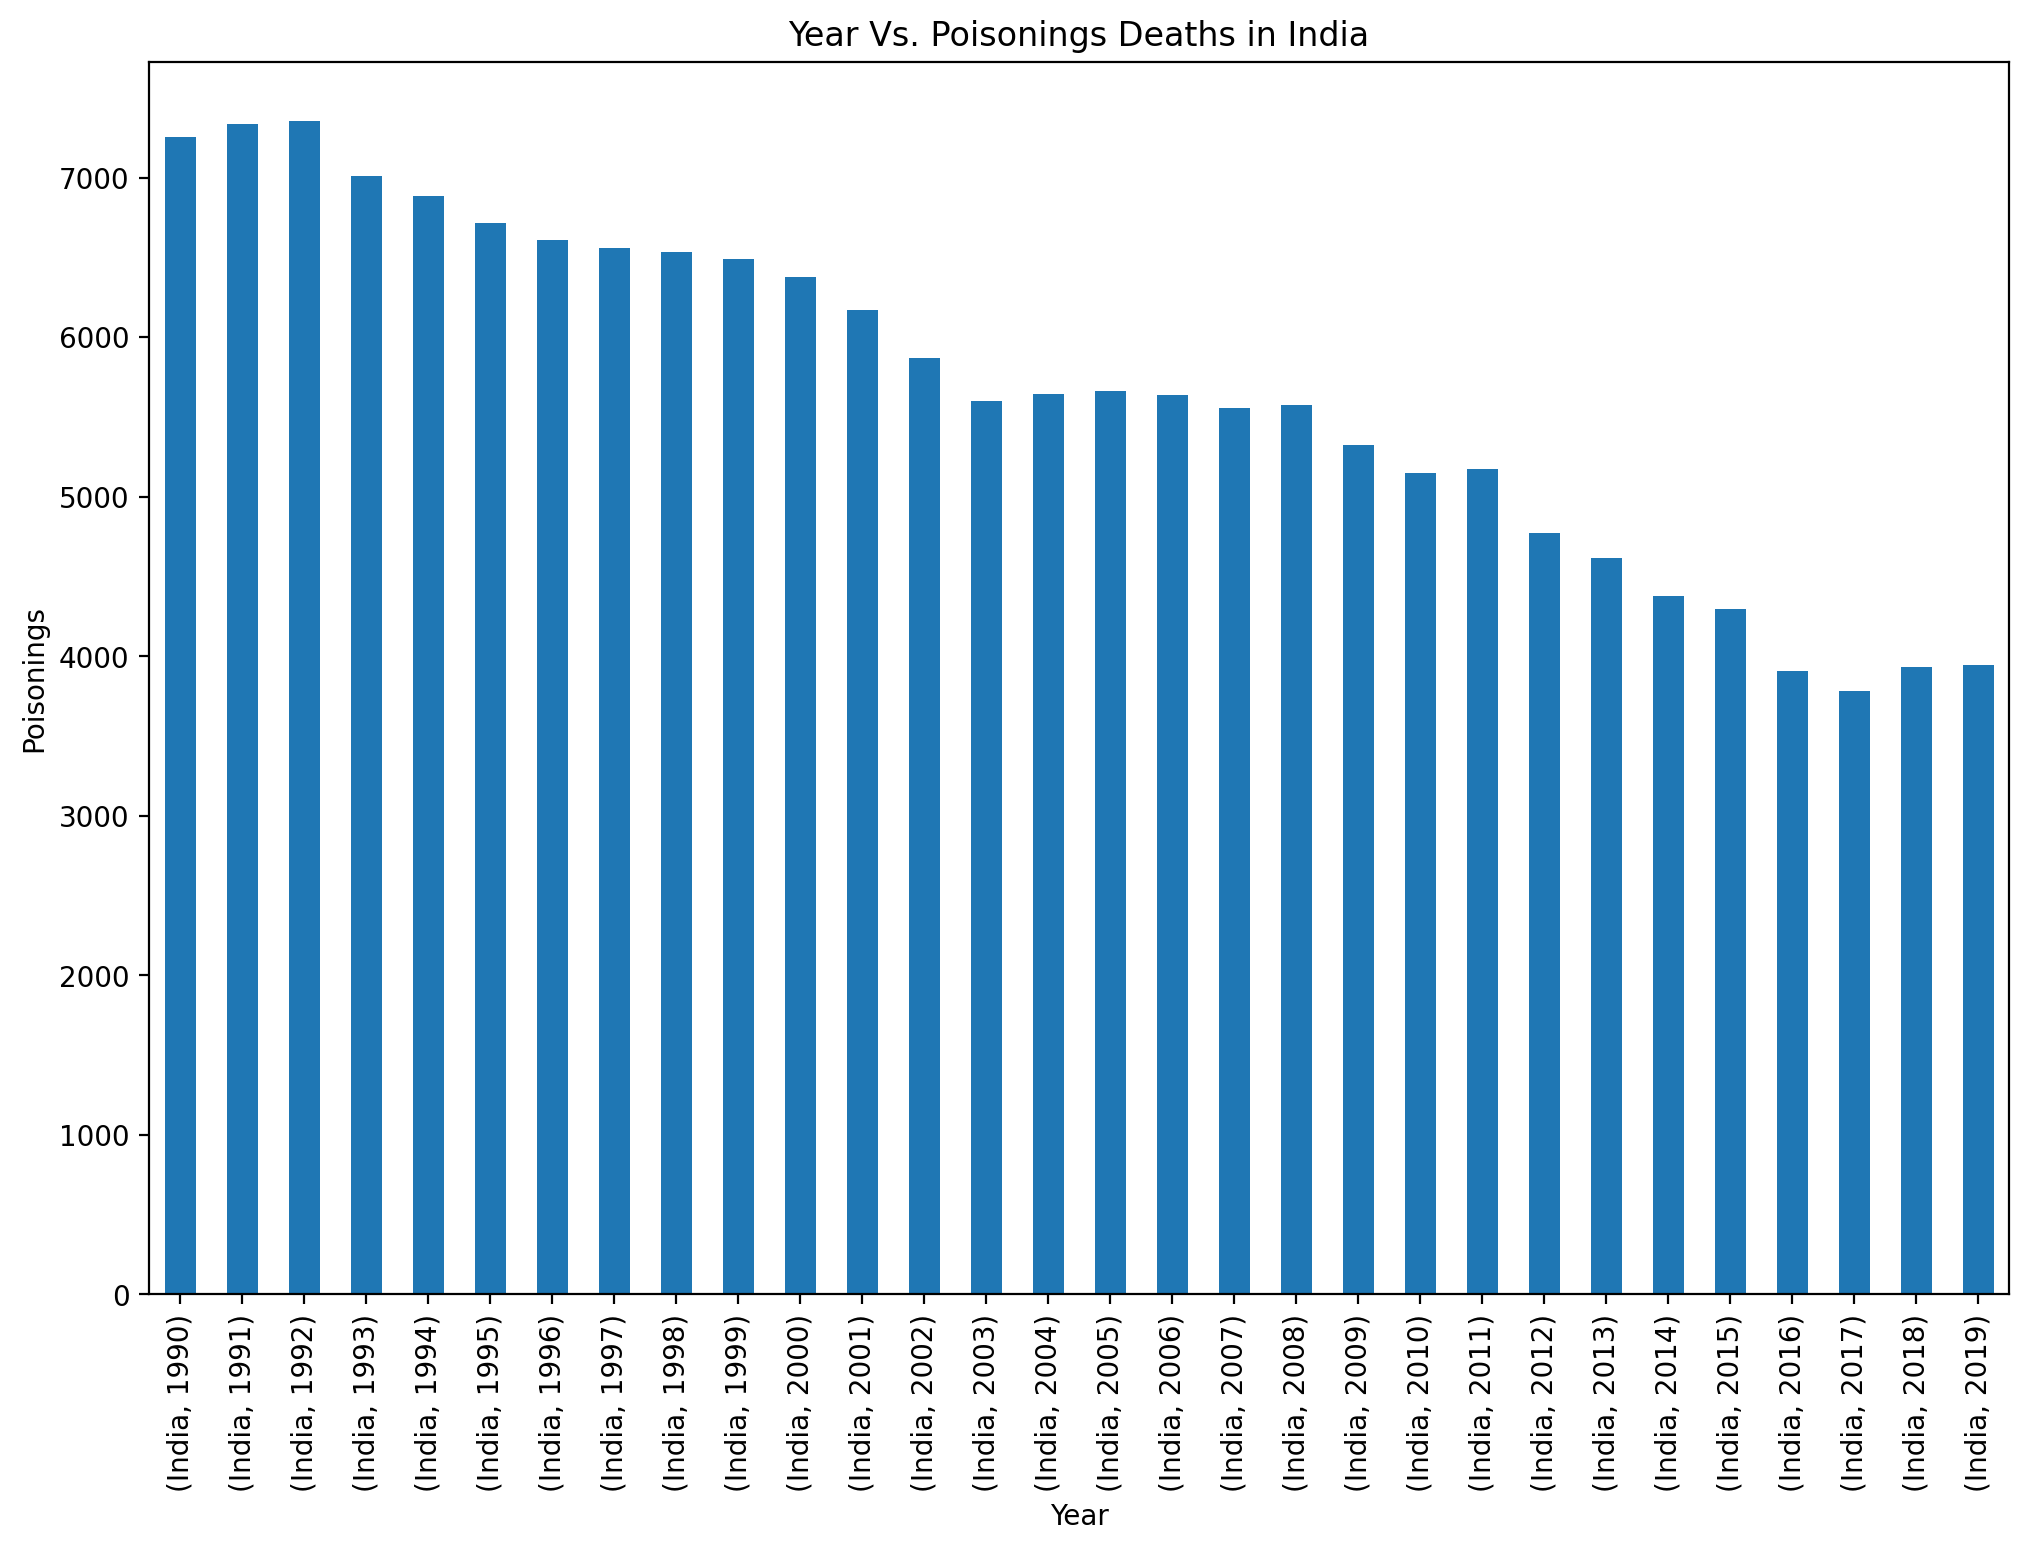

In [48]:
plt.figure(figsize=(12,8), dpi=200)
china_df=India_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Poisonings'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Poisonings")
plt.title("Year Vs. Poisonings Deaths in India")
plt.show()

Overall there is a gradual decrease in the Poisonings Deaths recorded in India.

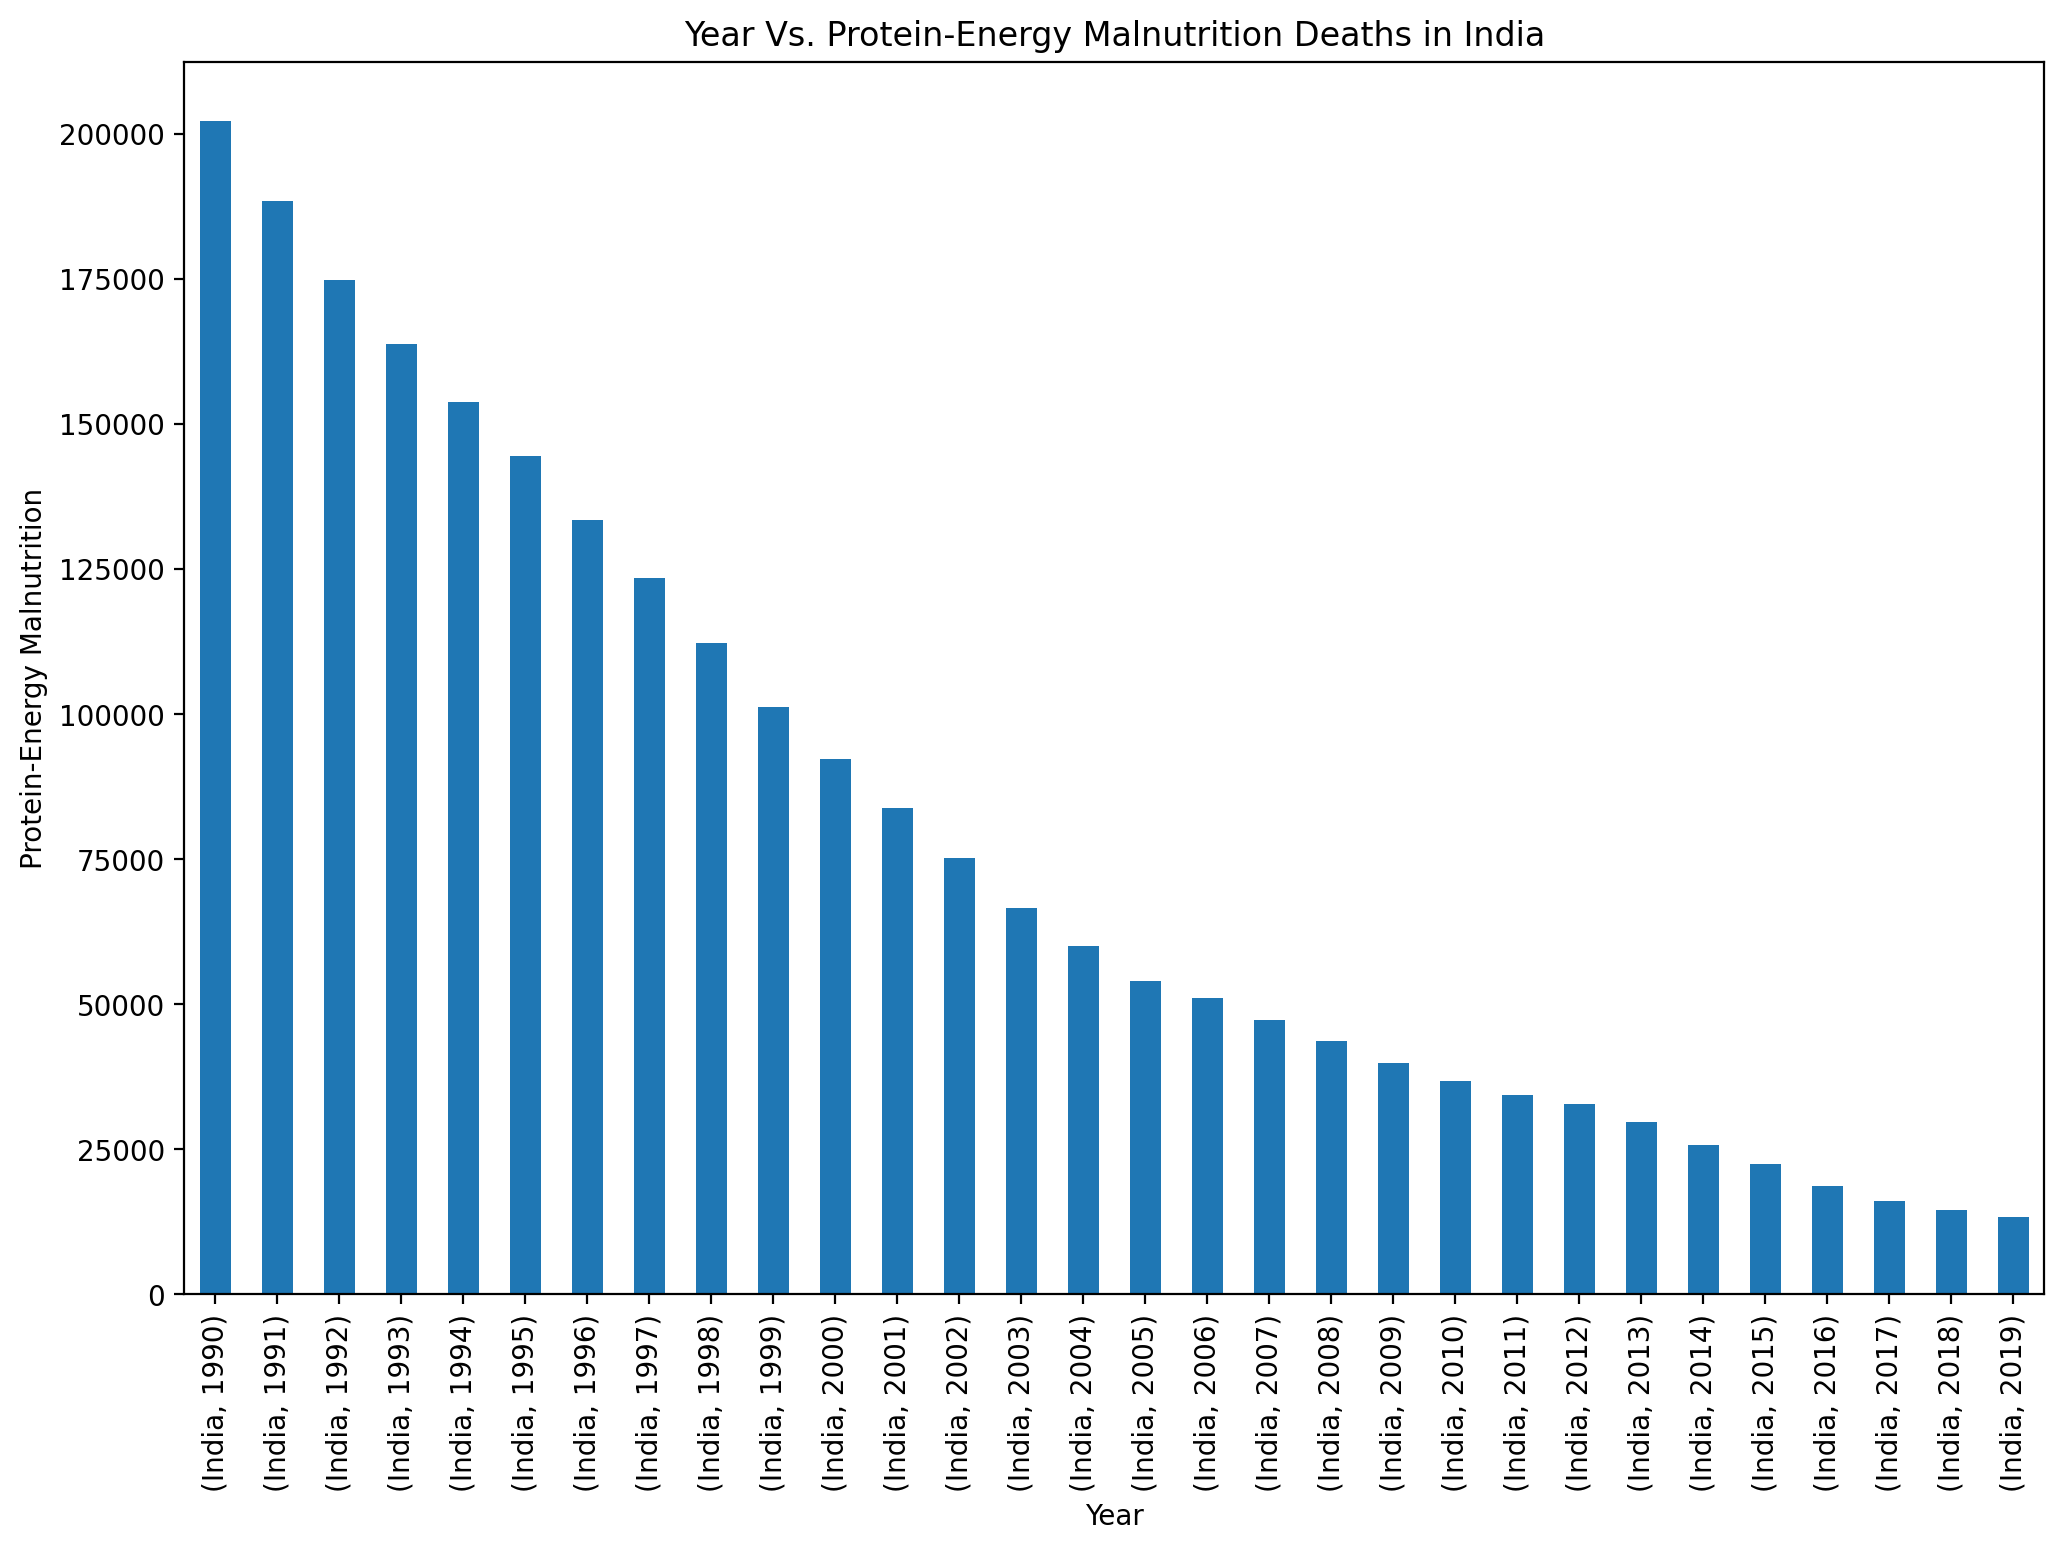

In [49]:
plt.figure(figsize=(12,8), dpi=200)
china_df=India_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Protein-Energy Malnutrition'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Protein-Energy Malnutrition")
plt.title("Year Vs. Protein-Energy Malnutrition Deaths in India")
plt.show()

There is a continual drop in the Protein-Energy Malutrition Deaths recorded in India.

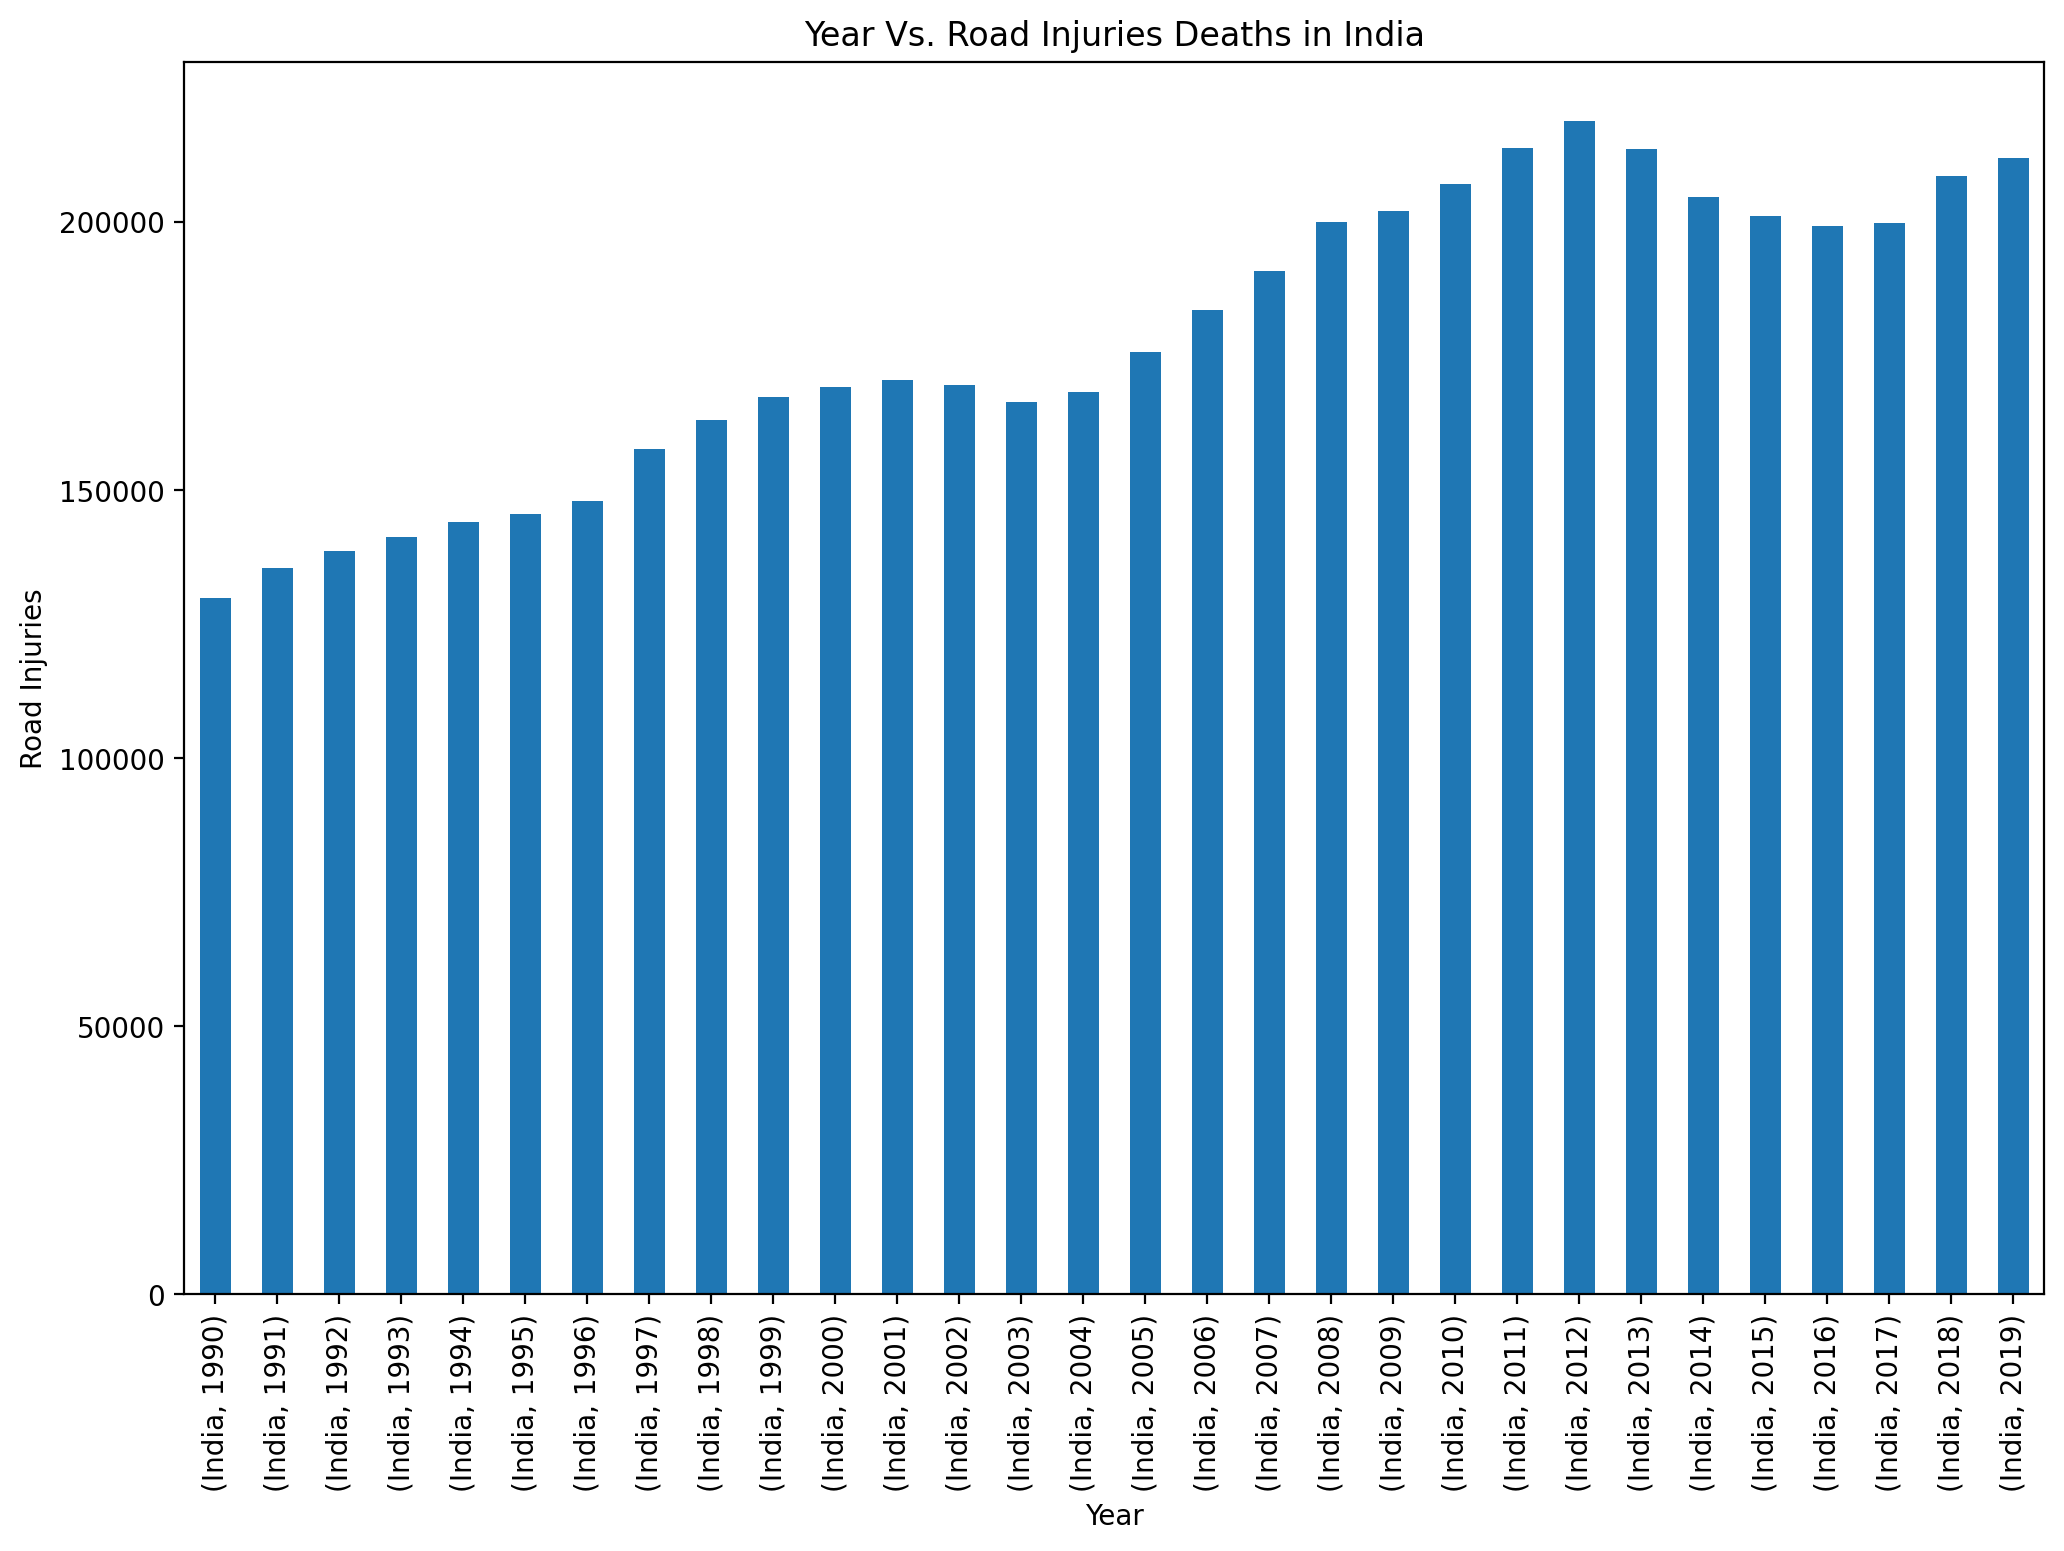

In [50]:
plt.figure(figsize=(12,8), dpi=200)
china_df=India_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Road Injuries'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Road Injuries")
plt.title("Year Vs. Road Injuries Deaths in India")
plt.show()

There is a continua raise in the Road Injuries Deaths recorded in India with fluctuations between 2013 to 2017

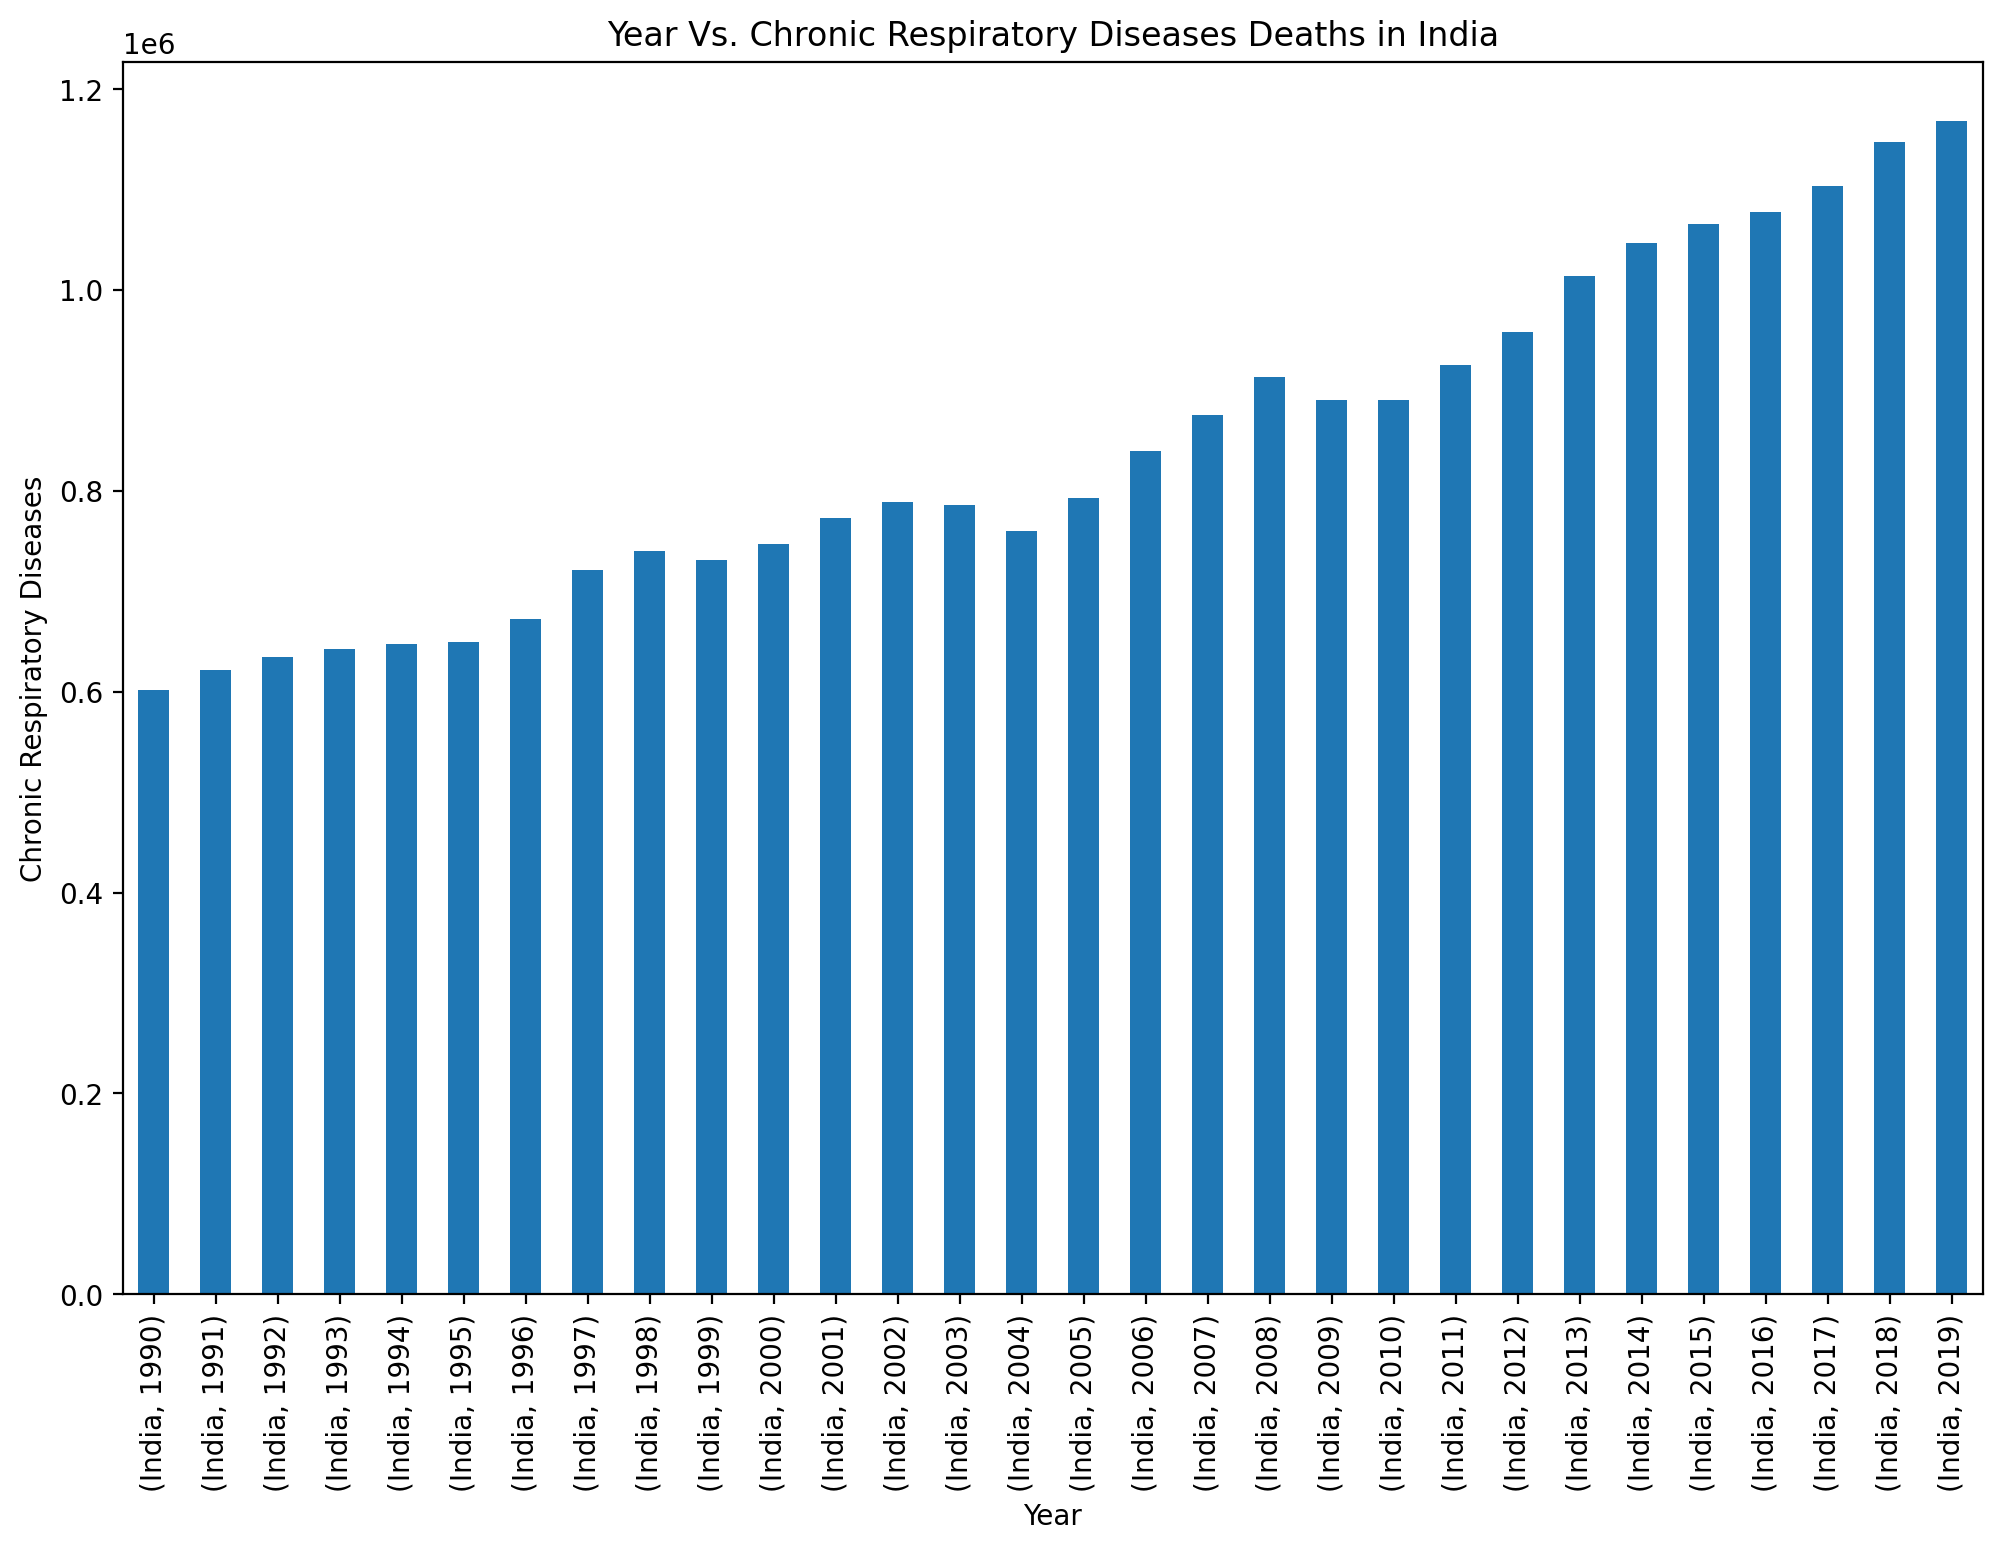

In [51]:
plt.figure(figsize=(12,8), dpi=200)
china_df=India_Total_no_of_Deaths_df.groupby(['Country/Territory','Year']).sum()
china_df['Chronic Respiratory Diseases'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Chronic Respiratory Diseases")
plt.title("Year Vs. Chronic Respiratory Diseases Deaths in India")
plt.show()

There is a continual raise in the Chronic Respiratory Diseases Deaths recorded in India with mere fluctuations inbetween.

## Top 3 Countries interms of "Total no.of Deaths"-For All the Years

In [52]:
# Total causes of death across 30 years
Countries_Total_no_of_Deaths_noyear_df=df.groupby('Country/Territory').sum()
Countries_Total_no_of_Deaths_noyear_df.drop('Year',axis=1, inplace=True)

In [53]:
# Top 3 Countries interms of "Total no. of Deaths"-For All the Years
Countries_Total_no_of_Deaths_noyear_df.sort_values(by='Total_no_of_Deaths', ascending=False)[:3]

,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Total_no_of_Deaths
Country/Territory,,,,,,,,,,,,,,,,,,,,,
China,480899,5381846,1533092,584236,13418,2873619,776275,243257,433709,626914,...,4195276,770140,507664,8350399,36676826,4918899,8924906,383402,318564,265408106
India,2008944,1707561,756832,3290569,2439244,2110438,1237163,2292449,2454374,168928,...,4556172,170119,2356222,5346154,25232974,6294910,11804380,730580,1672179,238158165
United States,40032,3302609,661288,133044,0,114752,596818,25206,528417,800798,...,2018497,40259,121030,1359744,4949052,1514325,3026943,126712,5851,71197802


## China-Top 10 Causes of Deaths.

In [54]:
china_10=Countries_Total_no_of_Deaths_noyear_df.sort_values(by='Total_no_of_Deaths', ascending=False)[:1]

In [55]:
china_10.iloc[0].sort_values(ascending=False)[1:11]

Cardiovascular Diseases                       100505973
Neoplasms                                      61060527
Chronic Respiratory Diseases                   36676826
Digestive Diseases                              8924906
Lower Respiratory Infections                    8525819
Road Injuries                                   8350399
Alzheimer's Disease and Other Dementias         5381846
Self-harm                                       5078550
Cirrhosis and Other Chronic Liver Diseases      4918899
Neonatal Disorders                              4353666
Name: China, dtype: int64

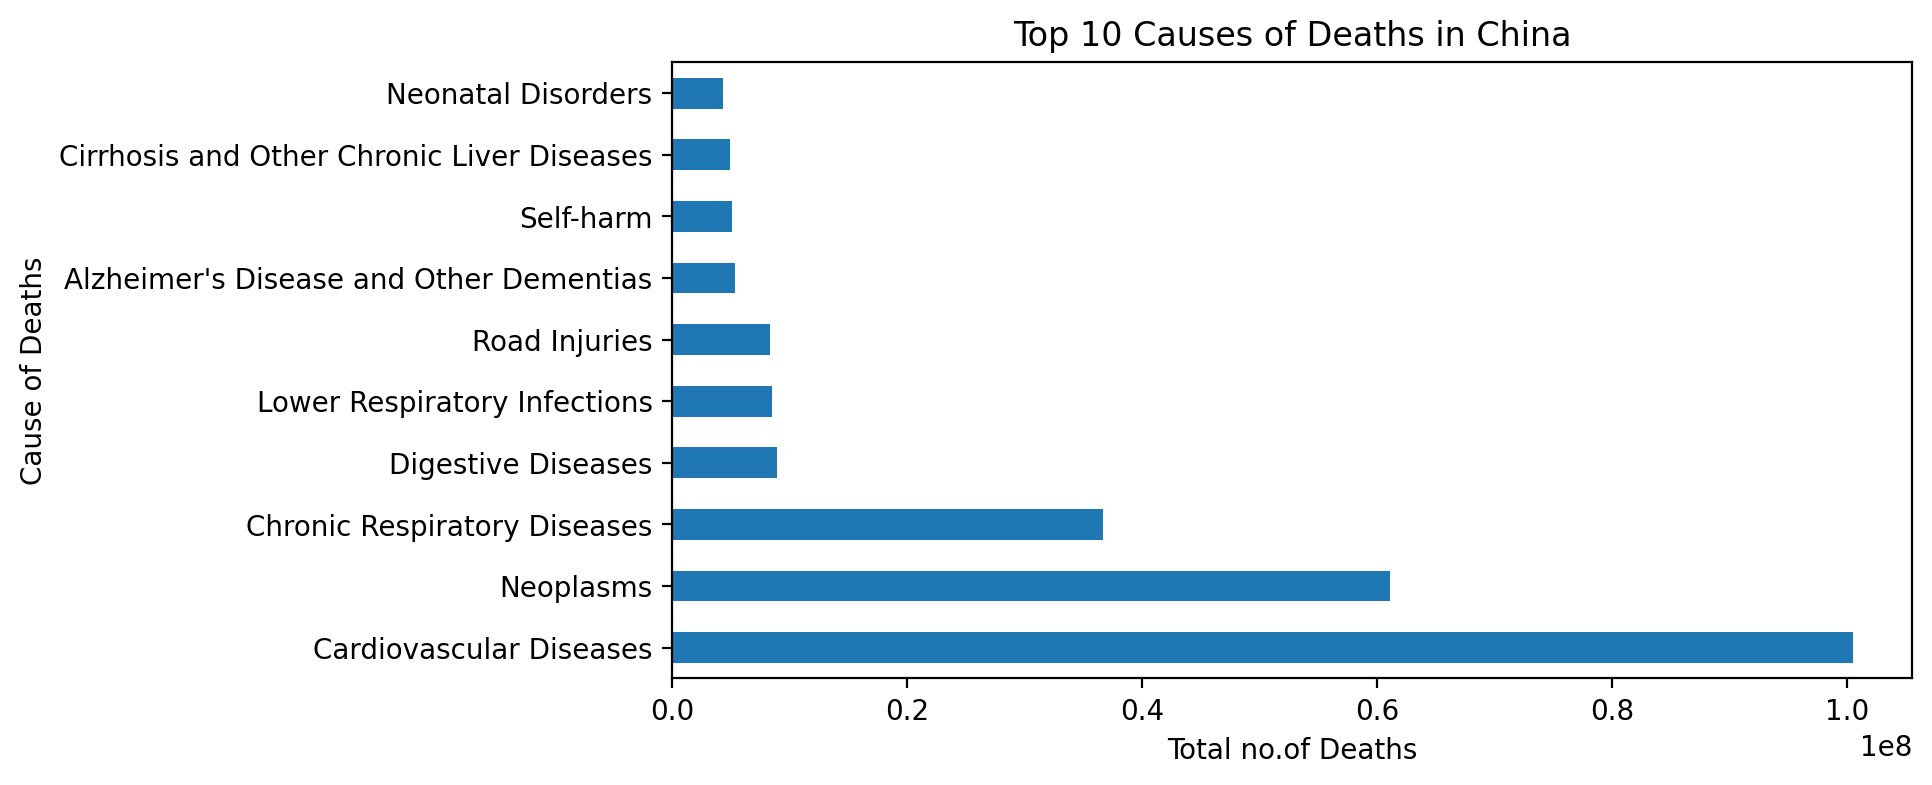

In [56]:
plt.figure(figsize=(8,4), dpi=200)
china_10.iloc[0].sort_values(ascending=False)[1:11].plot(kind='barh')
plt.xlabel("Total no.of Deaths")
plt.ylabel("Cause of Deaths")
plt.title("Top 10 Causes of Deaths in China")
plt.show()

## India-Top 10 Causes of Deaths

In [57]:
India_10=Countries_Total_no_of_Deaths_noyear_df.sort_values(by='Total_no_of_Deaths', ascending=False)[1:2]

In [58]:
India_10.iloc[0].sort_values(ascending=False)[1:11]

Cardiovascular Diseases                       52994710
Diarrheal Diseases                            26243547
Chronic Respiratory Diseases                  25232974
Neonatal Disorders                            20911570
Neoplasms                                     17762703
Lower Respiratory Infections                  16419404
Tuberculosis                                  15820922
Digestive Diseases                            11804380
Cirrhosis and Other Chronic Liver Diseases     6294910
Self-harm                                      5543395
Name: India, dtype: int64

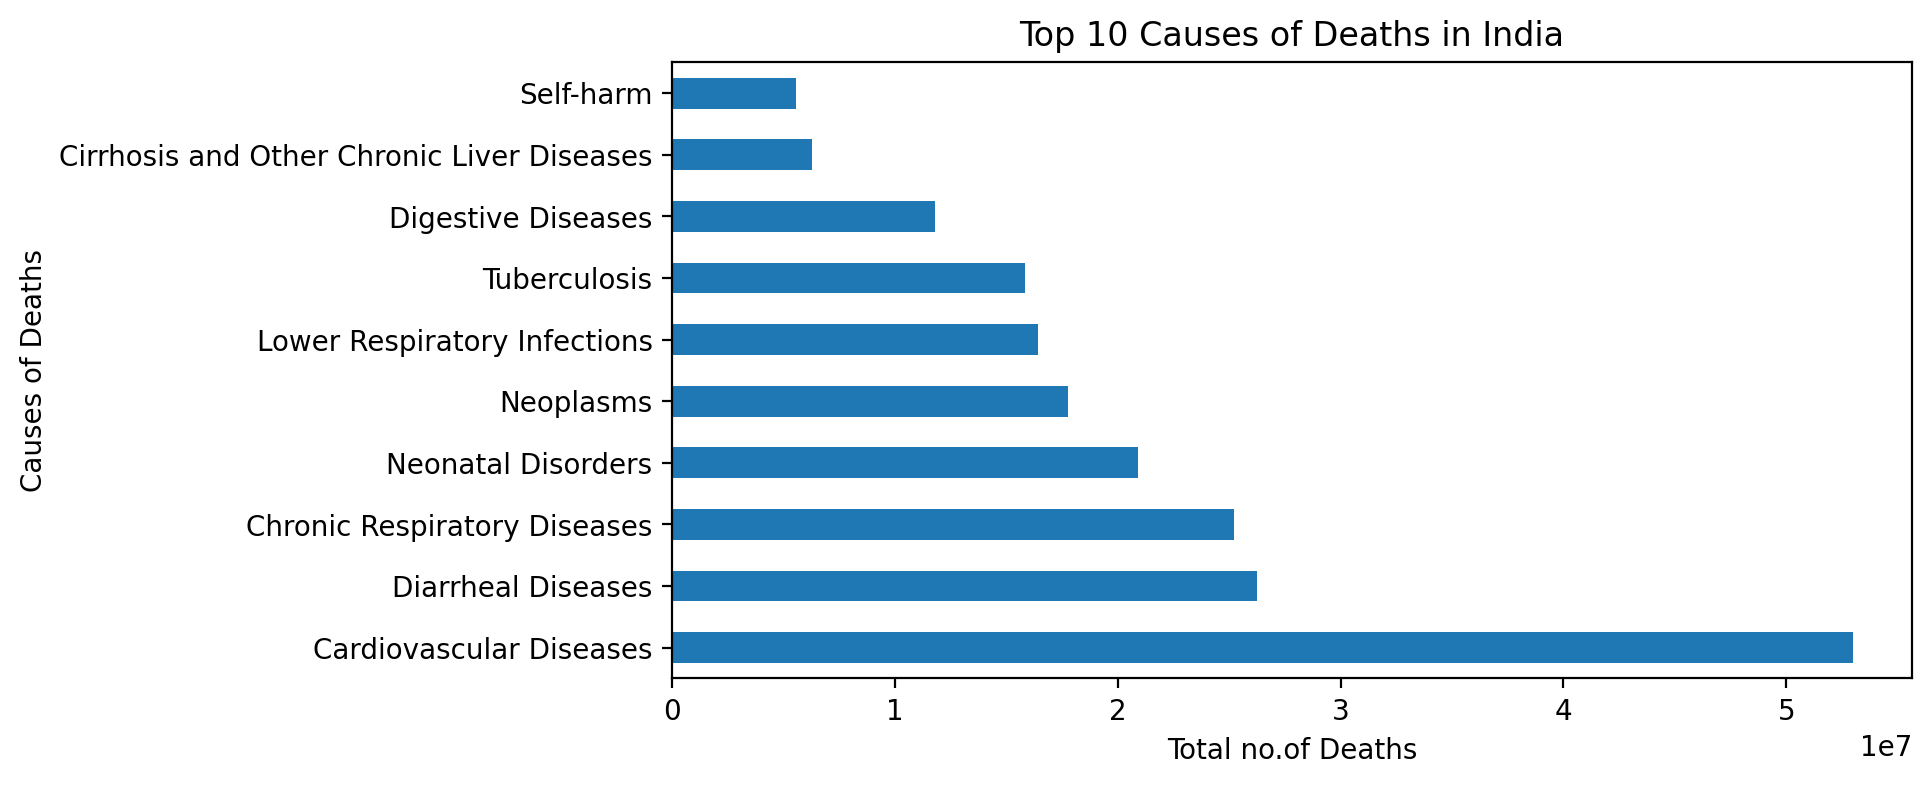

In [59]:
plt.figure(figsize=(8,4), dpi=200)
India_10.iloc[0].sort_values(ascending=False)[1:11].plot(kind='barh')
plt.xlabel("Total no.of Deaths")
plt.ylabel("Causes of Deaths")
plt.title("Top 10 Causes of Deaths in India")
plt.show()

## United States-Top 10 Causes of Deaths

In [60]:
usa_10=Countries_Total_no_of_Deaths_noyear_df.sort_values(by='Total_no_of_Deaths',ascending=False)[2:3]

In [61]:
usa_10.iloc[0].sort_values(ascending=False)[1:11]

Cardiovascular Diseases                       26438346
Neoplasms                                     18905315
Chronic Respiratory Diseases                   4949052
Alzheimer's Disease and Other Dementias        3302609
Digestive Diseases                             3026943
Lower Respiratory Infections                   2248625
Diabetes Mellitus                              2030631
Chronic Kidney Disease                         2018497
Cirrhosis and Other Chronic Liver Diseases     1514325
Road Injuries                                  1359744
Name: United States, dtype: int64

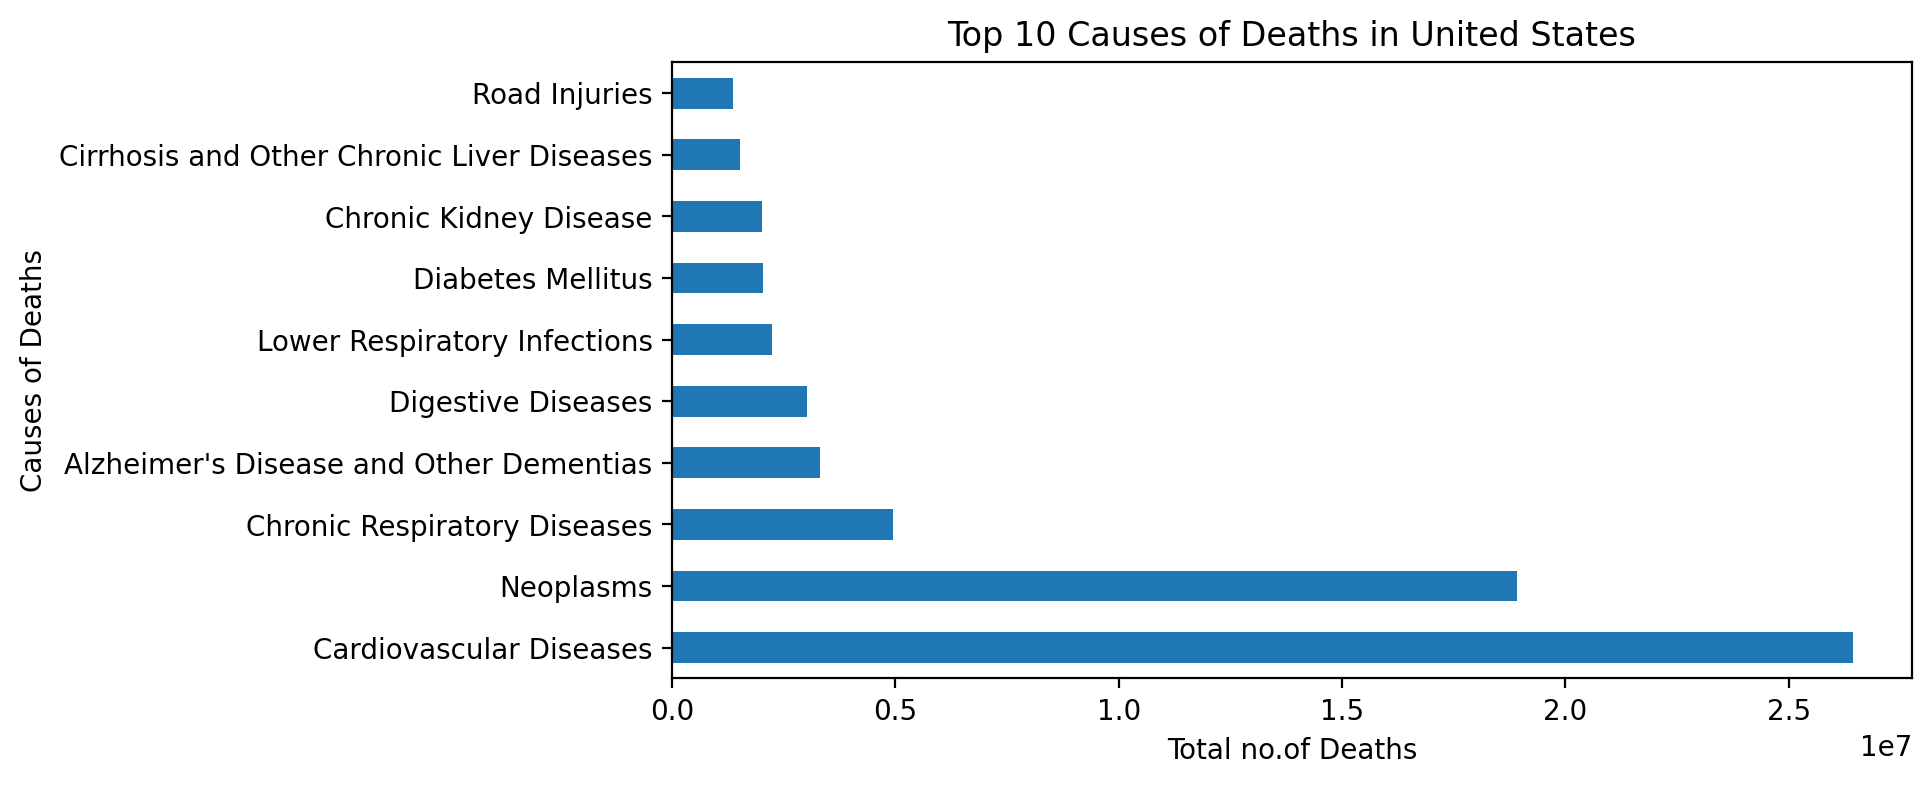

In [62]:
plt.figure(figsize=(8,4), dpi=200)
usa_10.iloc[0].sort_values(ascending=False)[1:11].plot(kind='barh')
plt.xlabel("Total no.of Deaths")
plt.ylabel("Causes of Deaths")
plt.title("Top 10 Causes of Deaths in United States")
plt.show()